In [1]:
import os

os.chdir("/home/mansour/ML3300-24a/omersela3/DL-precipitation-prediction")
os.getcwd()

'/home/mansour/ML3300-24a/omersela3/DL-precipitation-prediction'

## Imports

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from src.dataset.meterorological_dataset import MeteorologicalDataset
from src.dataset.nn_meteorological_dataset import NN_MeteorologicalCenterPointDataset
from src.dataset.cnn_meteorological_dataset import CNN_MeteorologicalDataset
from src.config.config import config
from src.service.service_data_analysis import ServiceDataAnalysis
from tqdm import tqdm

/home/mansour/ML3300-24a/omersela3/miniconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


cannot overwrite config file as it does not exist: src/config/resnet/config-1979-2024-reduced_params-lookback3h-forecast1h-circular-norm-resnet-no_norm_layer.ini... from path /home/mansour/ML3300-24a/omersela3/DL-precipitation-prediction
no OVERWRITE_CONFIG_PATH found. continuing with main config.


## Define parameters to explore

In [3]:
years = [str(y) for y in range(1945, 2025)]
# PARAMETERS = "intensity,date"
PARAMETERS = "date#sin,date#cos,lat,lon#sin,lon#cos,sp,t2m,intensity,u10,v10,tcw,z,ta_250,ta_300,ta_500,ta_850,ua_250,ua_300,ua_500,ua_850,va_250,va_300,va_500,va_850,za_250,za_300,za_500,za_850,msl,skt,slhf,tp"
config['DATA']['APPLY_TFMS'] = 'correct_intensity,circular_unfold_date,circular_unfold_lon'
config['APP']['MODE'] = 'DATA_ANALYSIS'
config['APP']['BATCH_SIZE'] = '100'
config['DATA']['LOOKBACK_RANGE'] = '0'
config['DATA']['FORECAST_RANGE'] = '0'
config['DATA']['TARGET_PARAMETERS'] = 'intensity'
config['DATA']['INPUT_PARAMETERS'] = PARAMETERS
config['DATA']['PARAMETERS'] = PARAMETERS
config['DATA']['VAL_RATIO'] = '0.95'
config['DATA']['YEARS'] = ",".join([str(y) for y in range(1945, 2025)])
config['DATA']['PATH'] = '/home/mansour/ML3300-24a/omersela3/fixed_tensors-v2/fixed_tensors-v2'
config['APP']['ARCH'] = 'DATA_ANALYSIS_NOTEBOOK'
config['APP']['NETWORK_DEPTH'] = '1'
config['APP']['OVERWRITE_CONFIG_PATH'] = 'DATA_ANALYSIS_NOTEBOOK'

## Generate Stats for each year and plot

### Generate stats for each year

In [4]:
stats_dict = {}
year = '1994'
config['DATA']['YEARS'] = f'{year},'
service = ServiceDataAnalysis(config)
simple_script = service.scripts['SIMPLE_NN']
datamodule = simple_script.create_datamodule()
datamodule.prepare_data()
datamodule.setup(stage='fit')

train_dl = datamodule.train_dataloader()

# Generate statistics for the audio data in the dataloader
mean, std, grad_mean, grad_std = simple_script.generate_stats_dataloader(train_dl, exec_grad_stats=True)

stats_dict[year] = (mean, std, grad_mean, grad_std)

TypeError: DataAnalysisScript.generate_stats_dataloader() got an unexpected keyword argument 'exec_grad_stats'

In [5]:
stats_dict

{'1994': (tensor([-9.9331e-02, -8.2340e-02, -7.0826e+00, -6.6218e-02,  6.2319e-02,
           9.7536e+04,  2.8067e+02,  1.8152e+01,  2.7103e+00,  2.5430e+00,
           1.6632e+01,  1.3010e+03,  2.2423e+02,  2.2781e+02,  2.4977e+02,
           2.7490e+02,  2.0104e+01,  1.7164e+01,  1.0928e+01,  5.5813e+00,
           1.9718e-01,  9.0538e-02,  6.4887e-01,  1.9154e+00,  9.8996e+04,
           8.7177e+04,  5.2327e+04,  1.2241e+04,  9.9033e+04,  2.8086e+02,
          -2.3750e+05,  2.6976e-04]),
  tensor([6.7588e-01, 7.2563e-01, 4.9808e+01, 6.5947e-01, 7.4621e-01, 3.8707e+03,
          8.7142e+00, 1.1681e+01, 5.9422e+00, 4.6974e+00, 1.0265e+01, 3.6354e+03,
          6.0699e+00, 6.7587e+00, 8.7198e+00, 8.3343e+00, 1.6110e+01, 1.6342e+01,
          1.1671e+01, 8.3508e+00, 1.6233e+01, 1.6182e+01, 1.0115e+01, 5.9325e+00,
          4.1411e+03, 3.9313e+03, 2.8502e+03, 1.7638e+03, 1.8352e+03, 9.8095e+00,
          3.2674e+05, 5.6633e-04]))}

In [9]:
stats_dict = {}
for year in tqdm(years):
    try:
        config['DATA']['YEARS'] = f'{year},'
        service = ServiceDataAnalysis(config)
        simple_script = service.scripts['SIMPLE_NN']
        datamodule = simple_script.create_datamodule()
        datamodule.prepare_data()
        datamodule.setup(stage='fit')

        train_dl = datamodule.train_dataloader()

        # Generate statistics for the audio data in the dataloader
        mean, std = simple_script.generate_stats_dataloader(train_dl)

        stats_dict[year] = (mean, std)
    except:
        print(f'failed for year: {year}')
        pass

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 63670.65it/s]

failed for year: 1945
failed for year: 1946
failed for year: 1947
failed for year: 1948
failed for year: 1949
failed for year: 1950
failed for year: 1951
failed for year: 1952
failed for year: 1953
failed for year: 1954
failed for year: 1955
failed for year: 1956
failed for year: 1957
failed for year: 1958
failed for year: 1959
failed for year: 1960
failed for year: 1961
failed for year: 1962
failed for year: 1963
failed for year: 1964
failed for year: 1965
failed for year: 1966
failed for year: 1967
failed for year: 1968
failed for year: 1969
failed for year: 1970
failed for year: 1971
failed for year: 1972
failed for year: 1973
failed for year: 1974
failed for year: 1975
failed for year: 1976
failed for year: 1977
failed for year: 1978
failed for year: 1979
failed for year: 1980
failed for year: 1981
failed for year: 1982
failed for year: 1983
failed for year: 1984
failed for year: 1985
failed for year: 1986
failed for year: 1987
failed for year: 1988
failed for year: 1989
failed for

### Plot stats for each year

In [9]:
def plot_param_mean(years, mean, param):
    plt.plot(years, mean, label=f'{param} Mean')
    plt.title(f'{param} Mean for each year')
    plt.ylabel(f'{param} Mean')
    plt.xticks(list(stats_dict.keys())[::10])
    plt.xlabel('Year')
    plt.show()

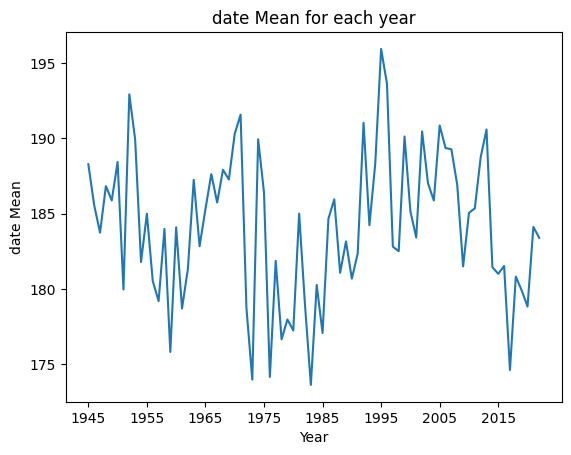

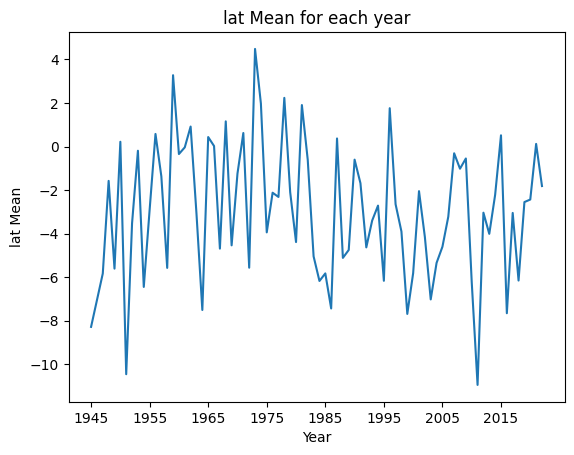

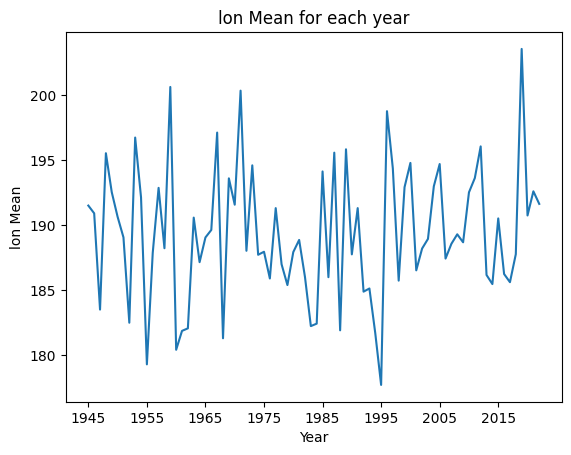

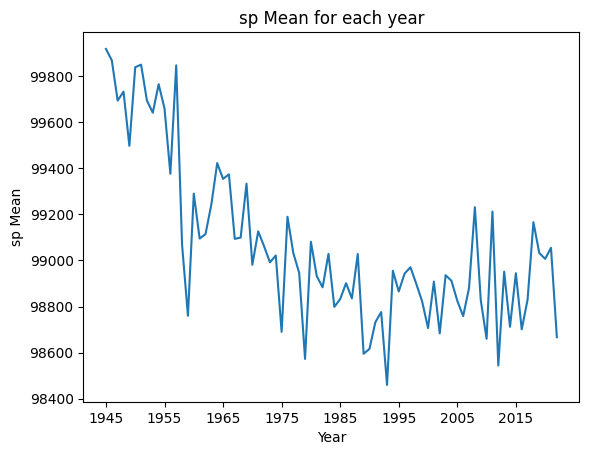

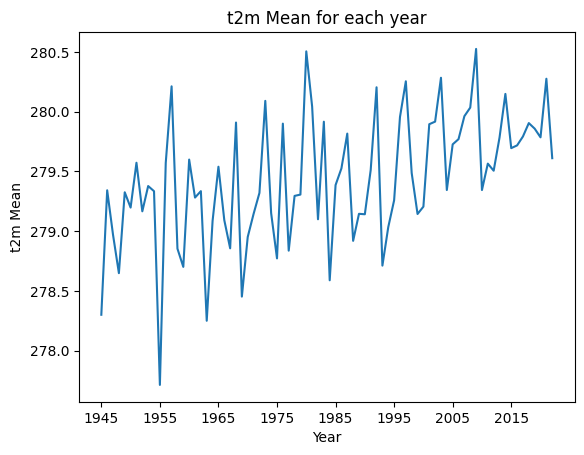

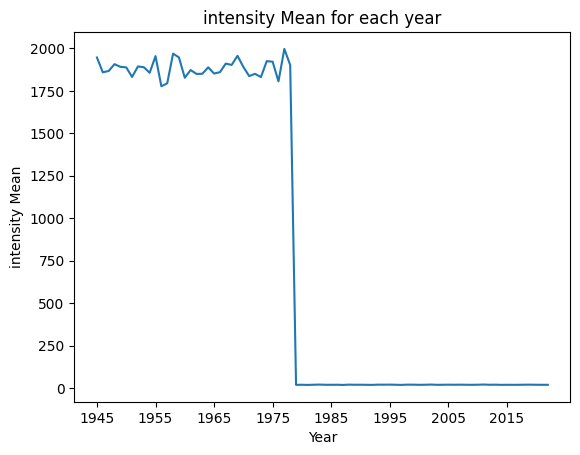

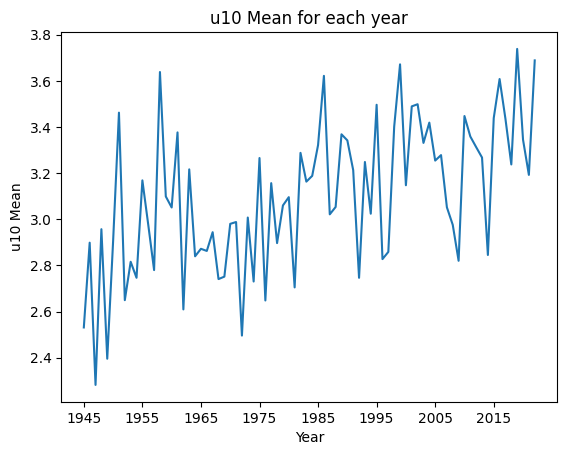

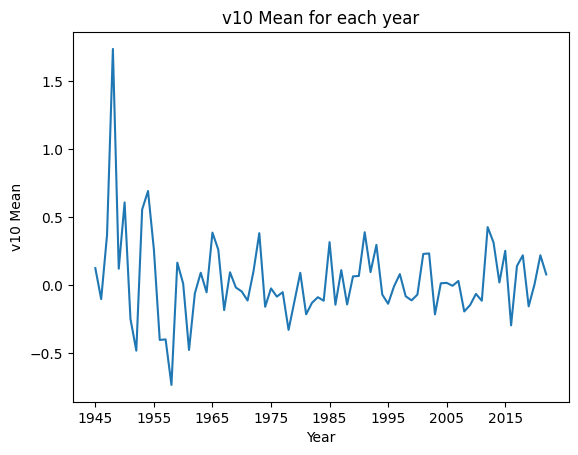

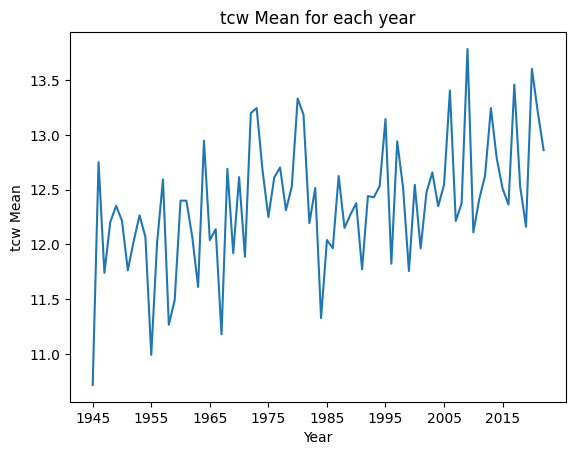

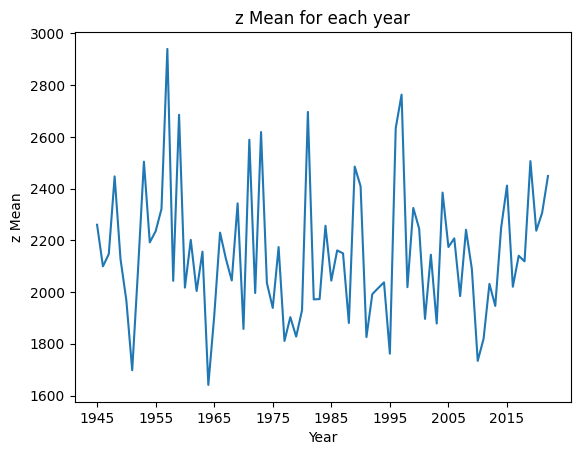

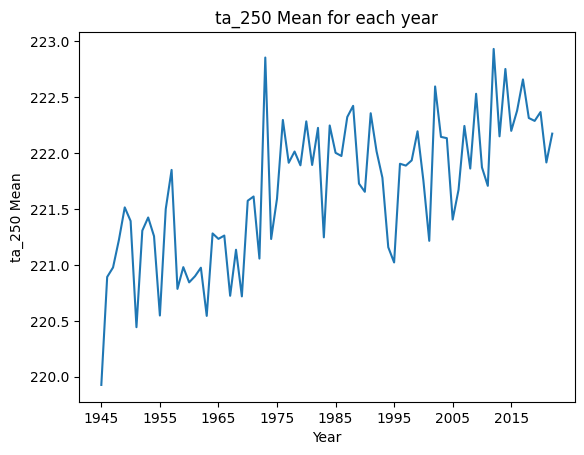

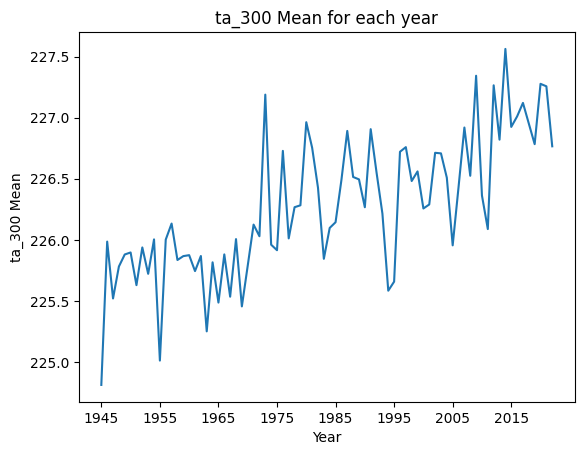

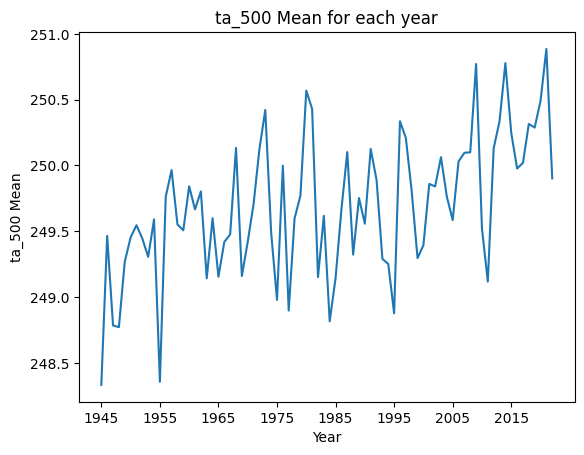

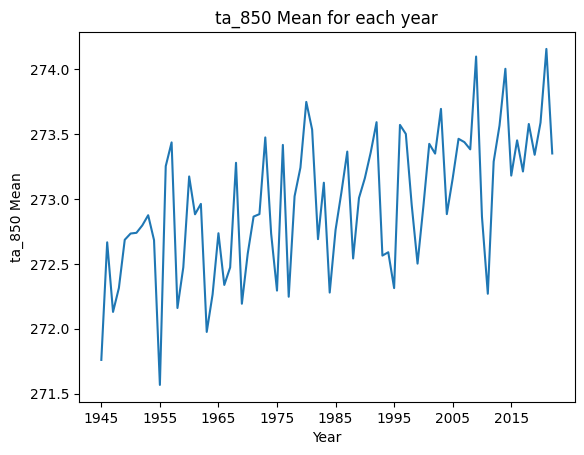

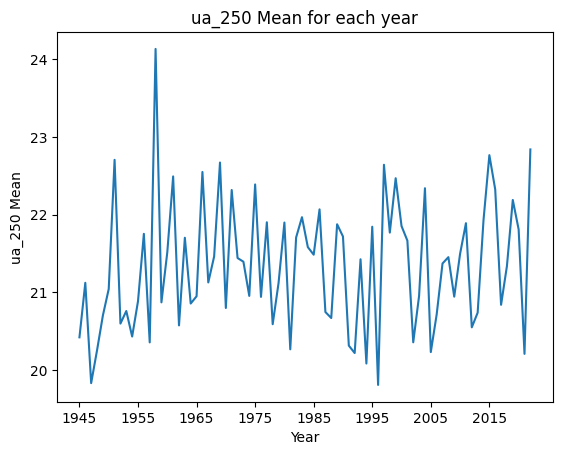

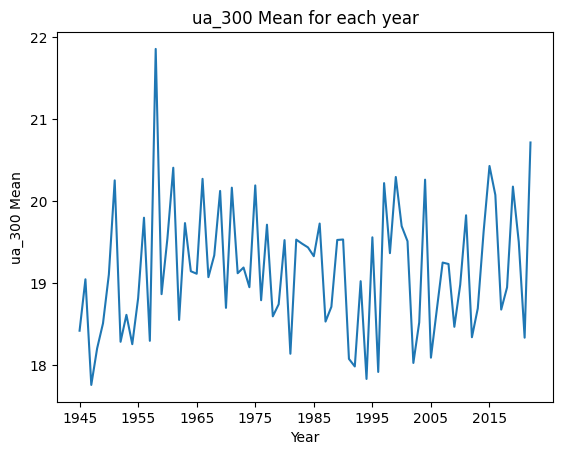

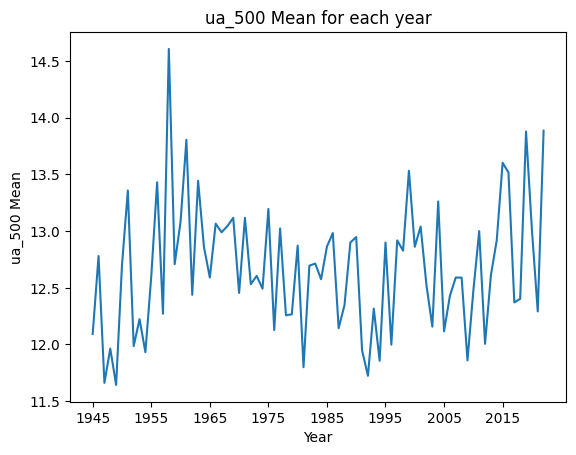

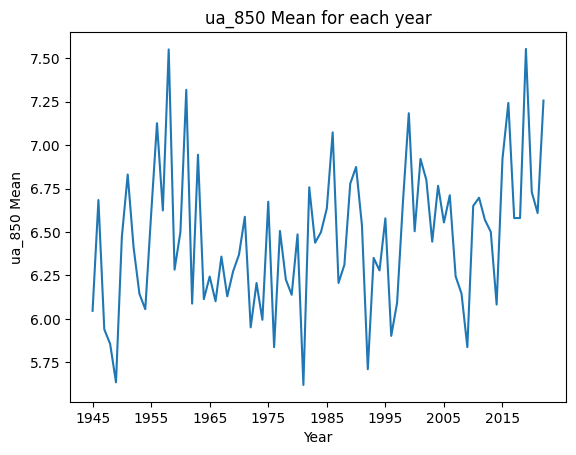

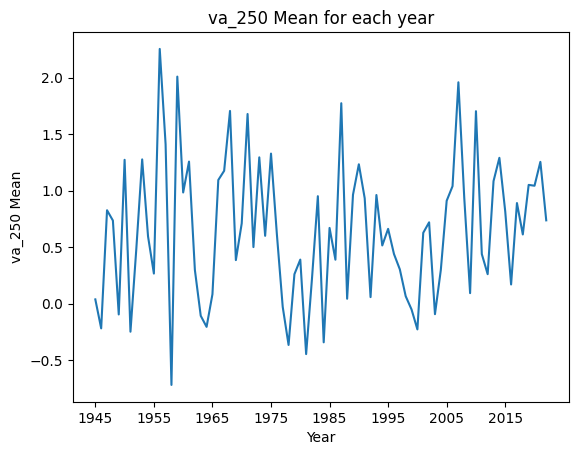

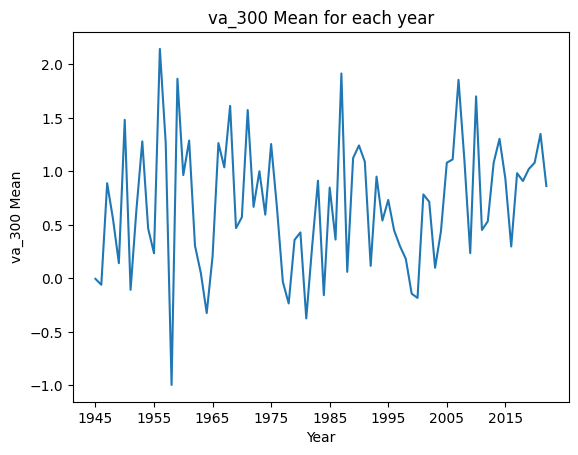

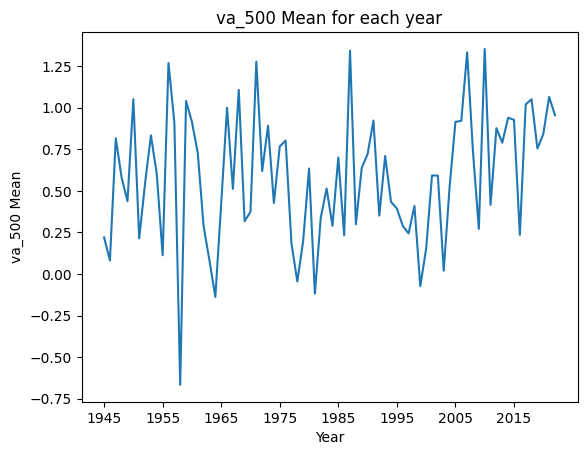

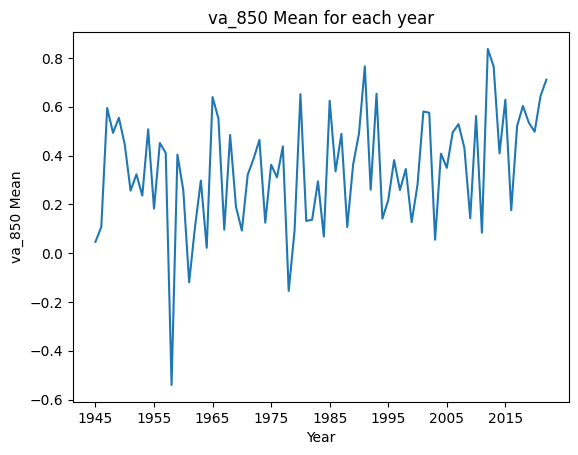

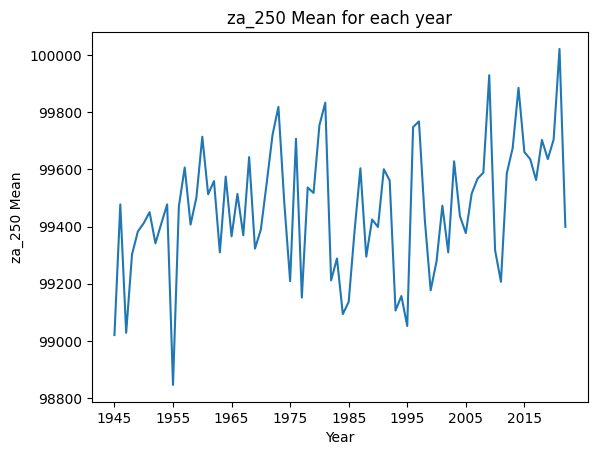

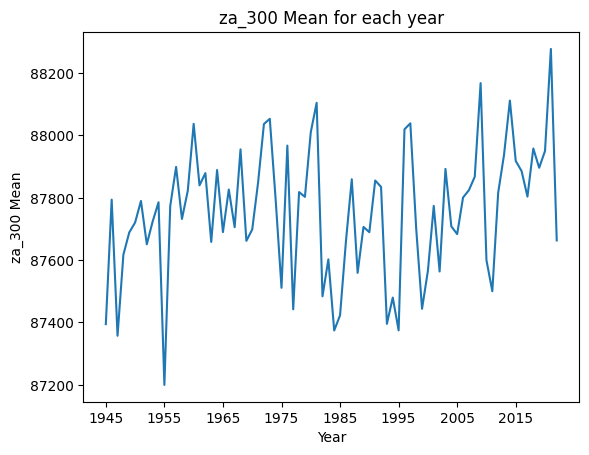

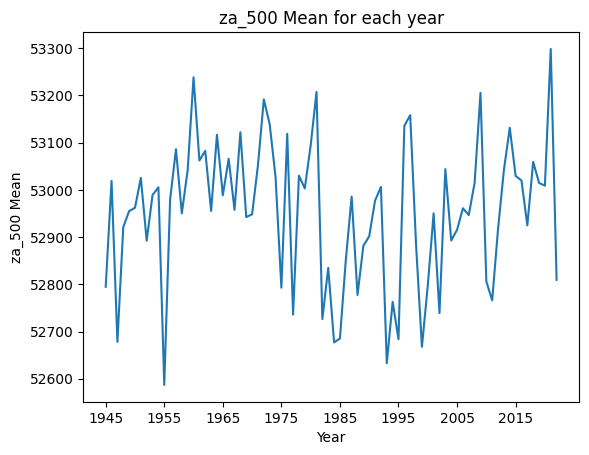

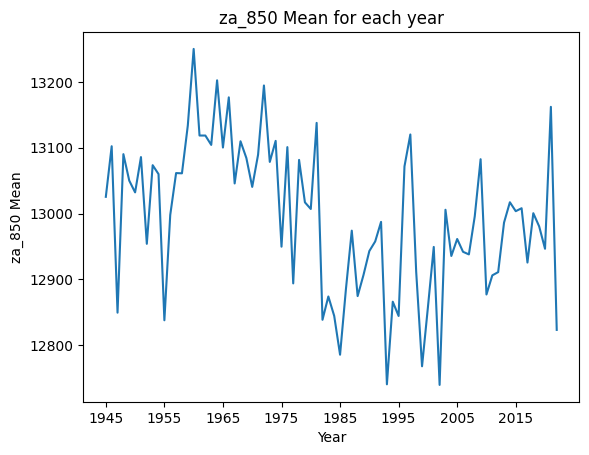

In [10]:
for i, param in enumerate(PARAMETERS.split(',')):
    mean = [stats_dict[year][0][i] for year in stats_dict]
    plot_param_mean(list(stats_dict.keys()), mean, param)

### Investigate Intensity

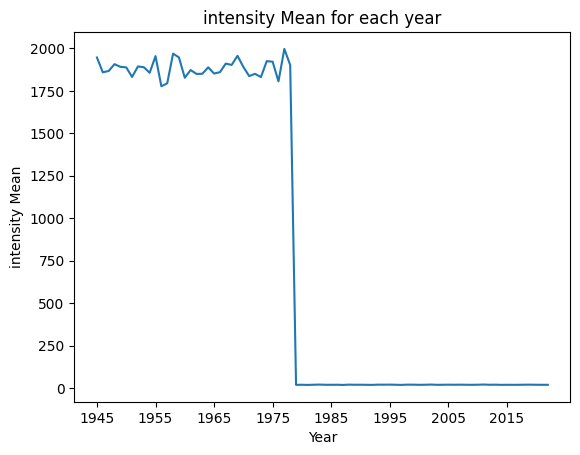

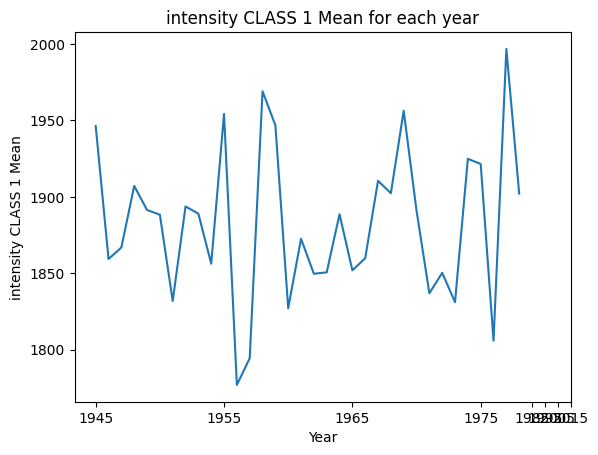

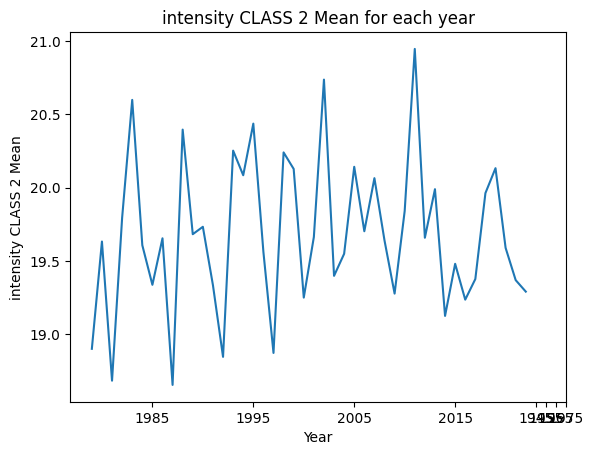

class 1 mean: 1882.386474609375
class 2 mean: 19.679466247558594


In [15]:
intensity_index = PARAMETERS.split(',').index('intensity')
mean_arr = np.array([stats_dict[year][0][intensity_index] for year in stats_dict])
year_arr = np.array(list(stats_dict.keys()))

plot_param_mean(year_arr, mean_arr, 'intensity')
mean_low_quantile = np.quantile(mean_arr, 0.25)
mean_high_quantile = np.quantile(mean_arr, 0.75)
mean_iq_mean = (mean_low_quantile + mean_high_quantile) / 2

mean_clf = mean_arr>mean_iq_mean
plot_param_mean(year_arr[mean_clf==1], mean_arr[mean_clf==1], 'intensity CLASS 1')
plot_param_mean(year_arr[mean_clf==0], mean_arr[mean_clf==0], 'intensity CLASS 2')
print(f"class 1 mean: {np.mean(mean_arr[mean_clf==1])}")
print(f"class 2 mean: {np.mean(mean_arr[mean_clf==0])}")

## Visualize data from each year

Year: 1945


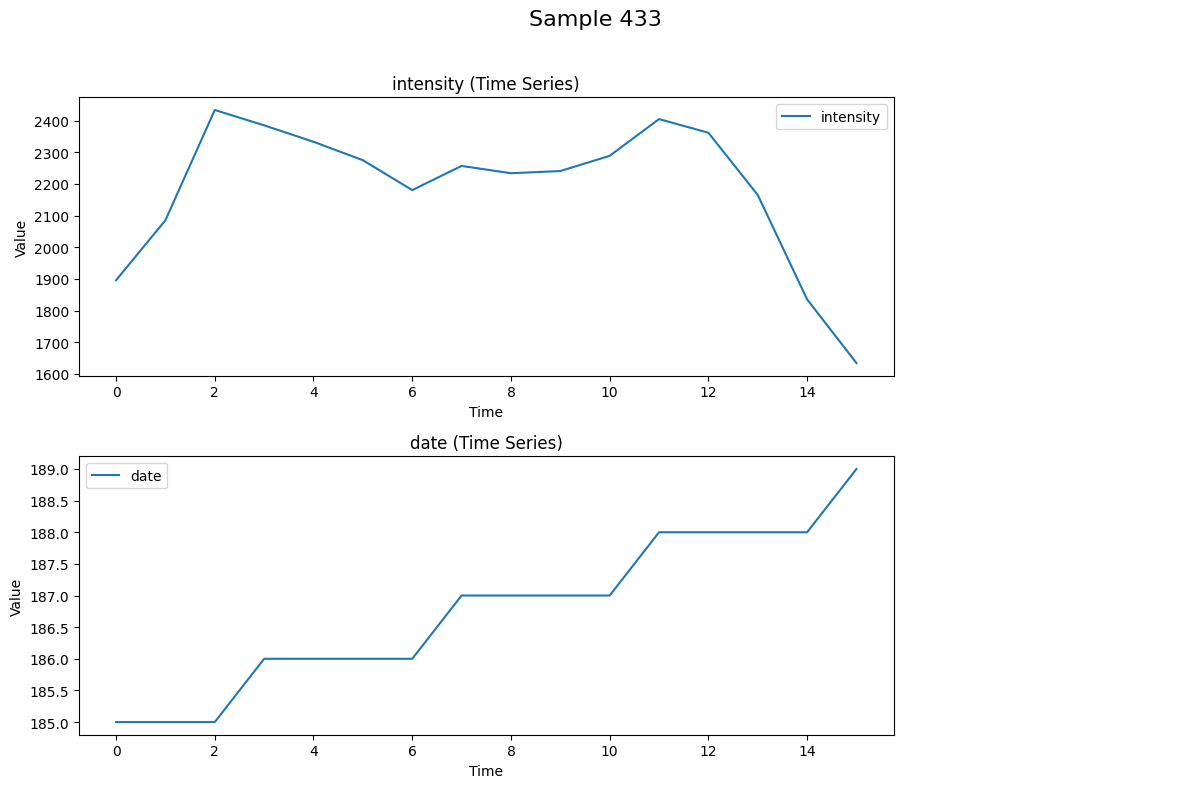


Year: 1946


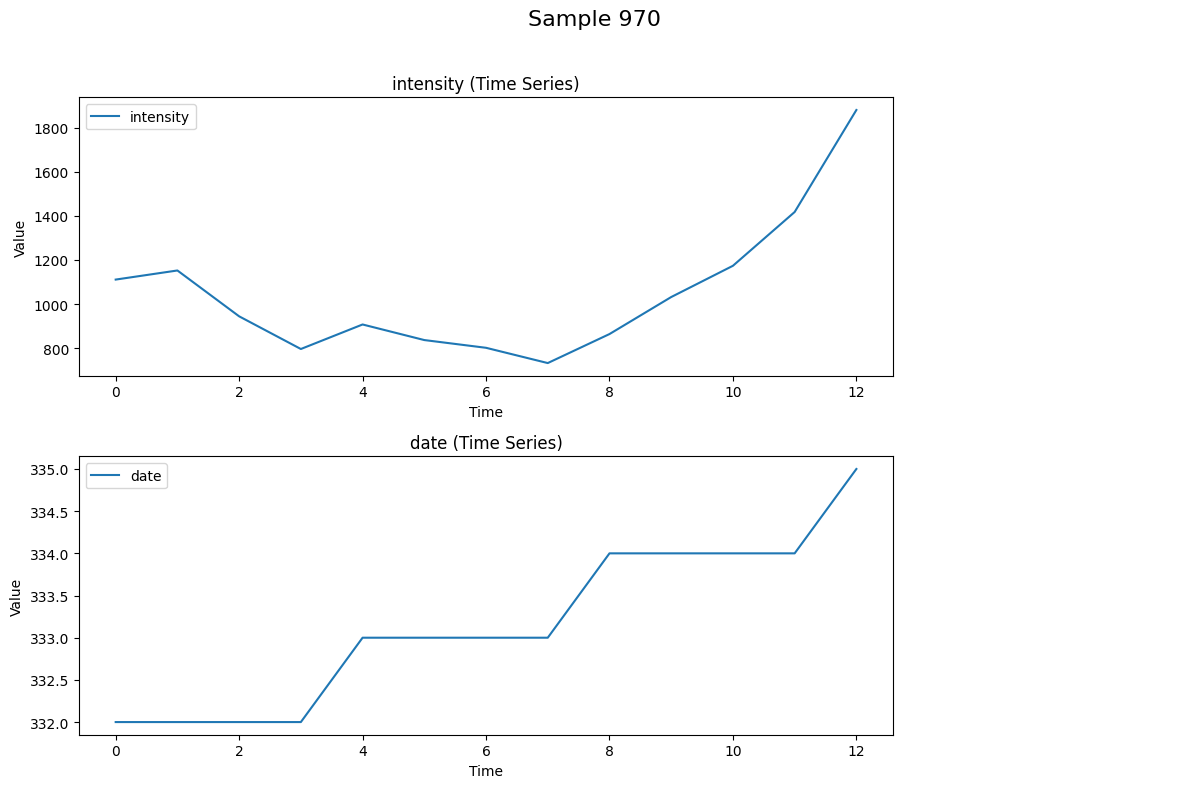


Year: 1947


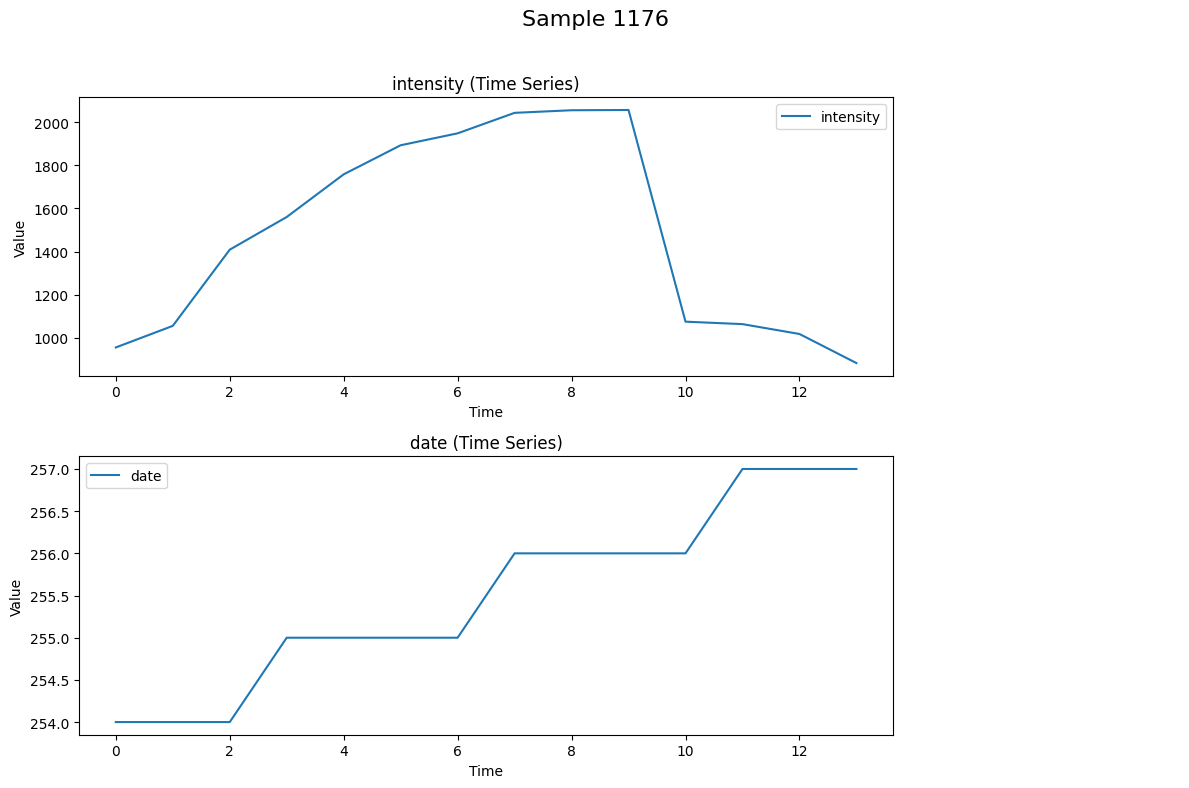


Year: 1948


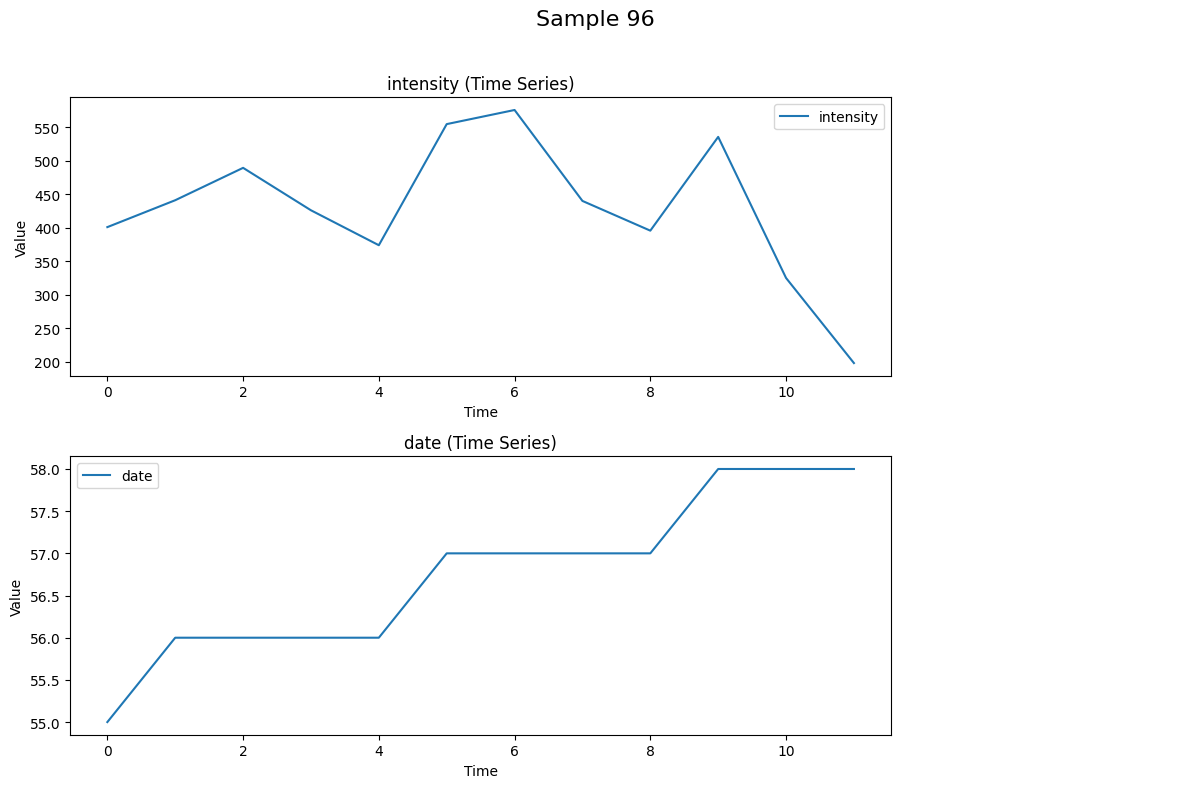


Year: 1949


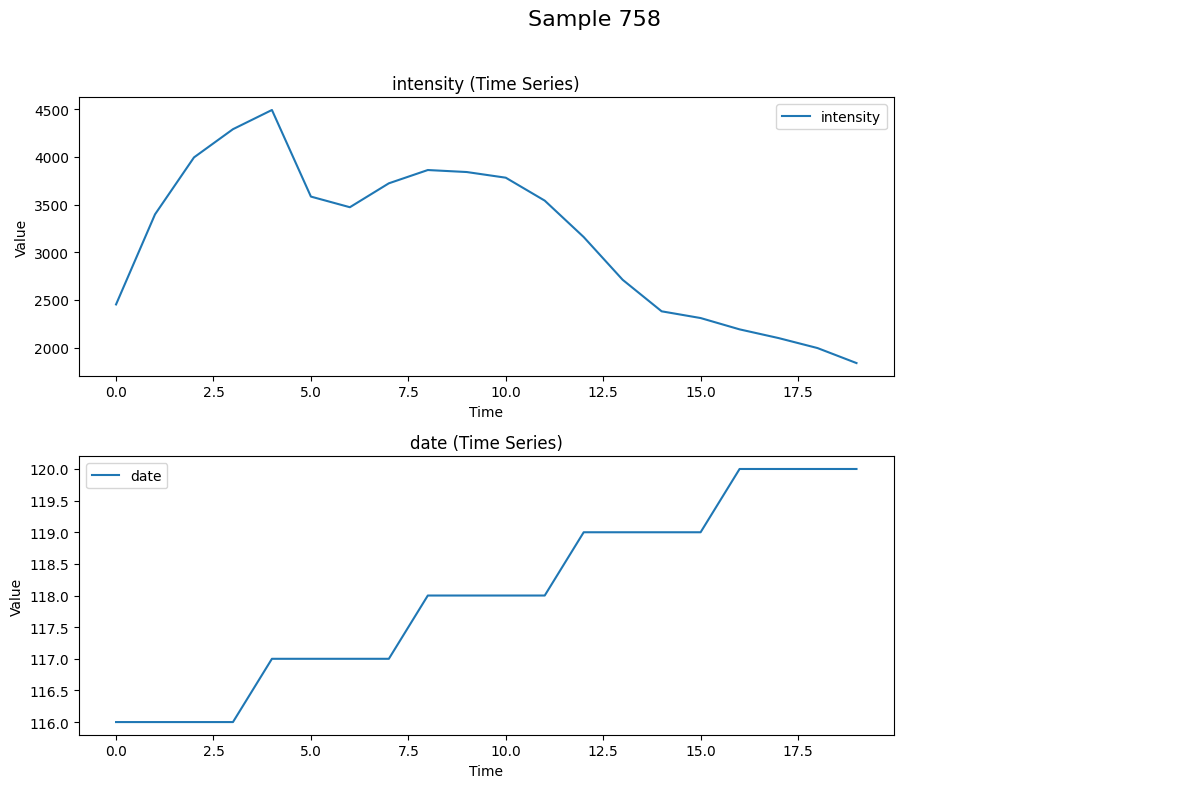


Dropped files statistics:
intensity: 0
date: 0
Year: 1950


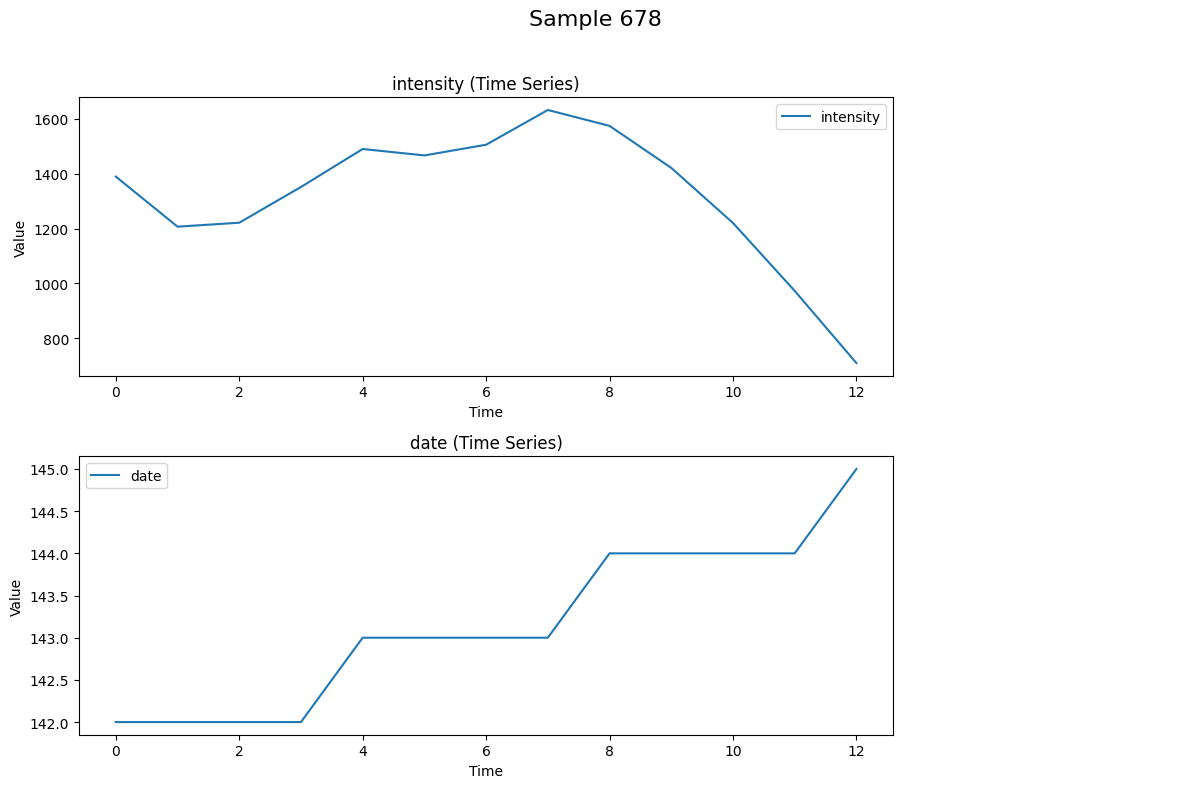


Dropped files statistics:
intensity: 0
date: 0
Year: 1951


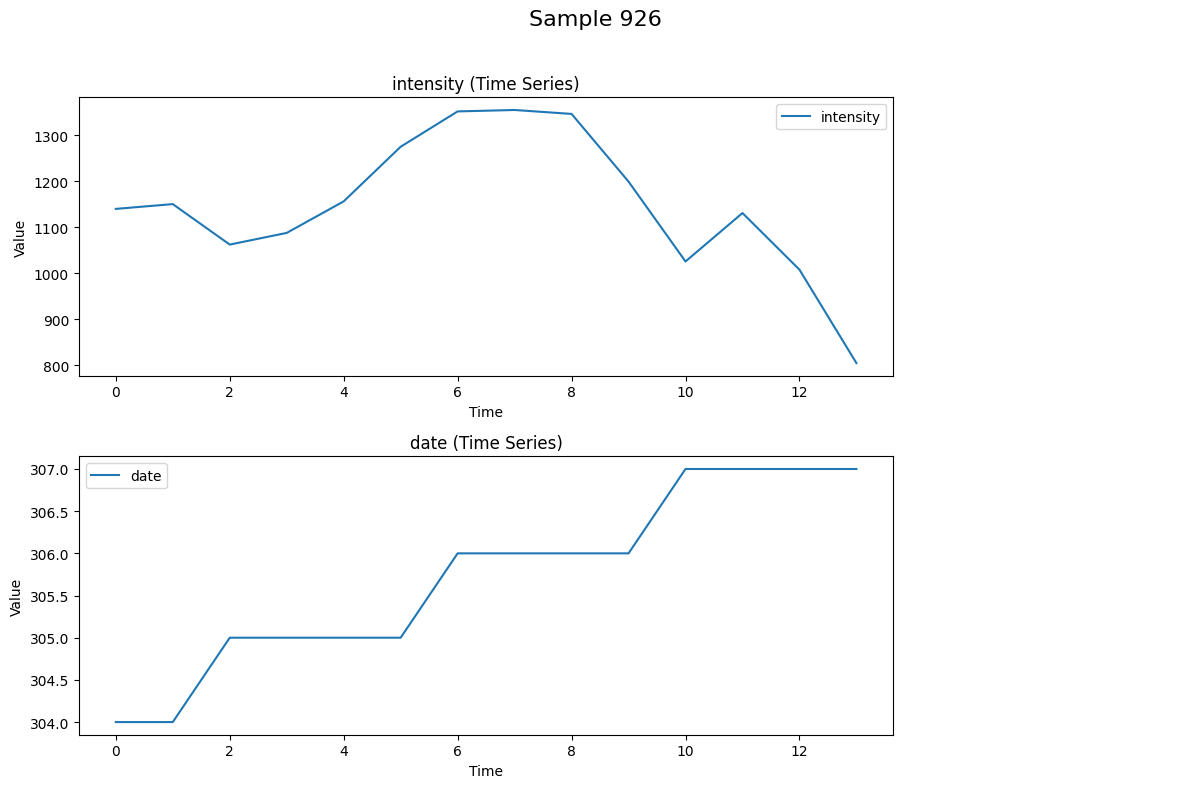


Dropped files statistics:
intensity: 0
date: 0
Year: 1952


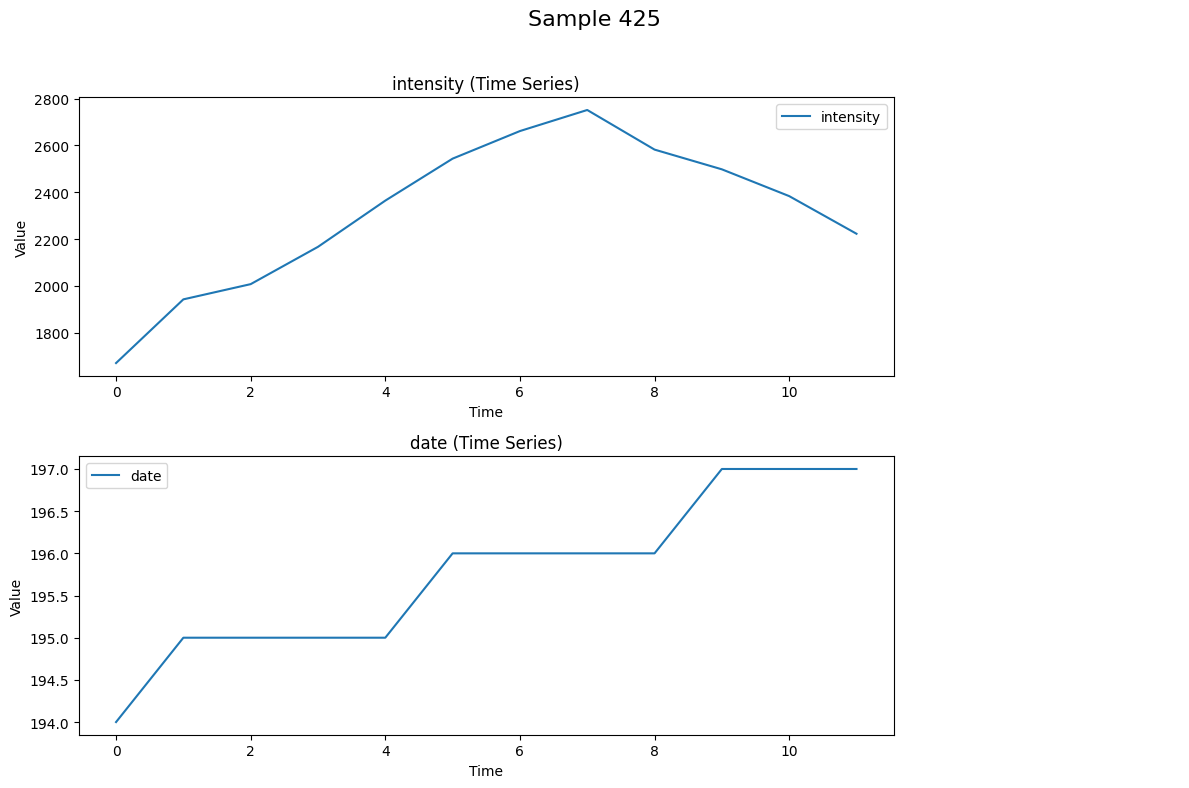


Dropped files statistics:
intensity: 0
date: 0
Year: 1953


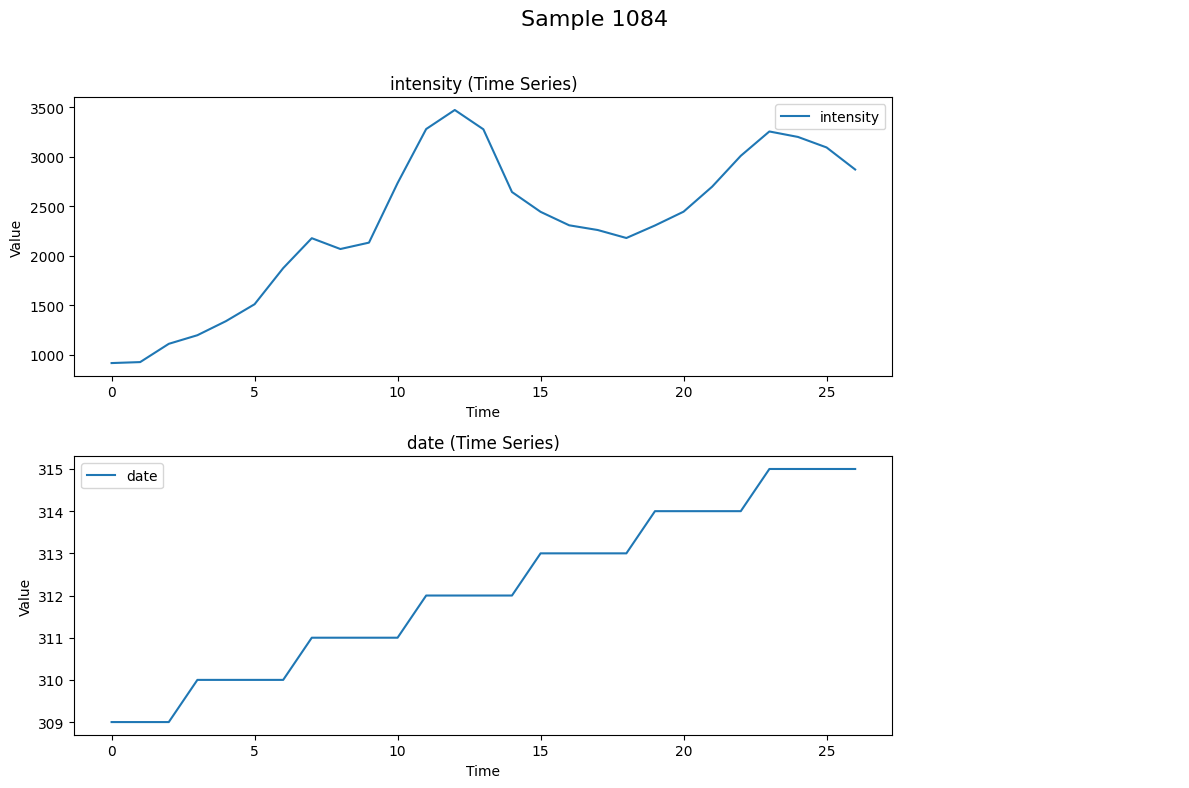


Dropped files statistics:
intensity: 0
date: 0
Year: 1954


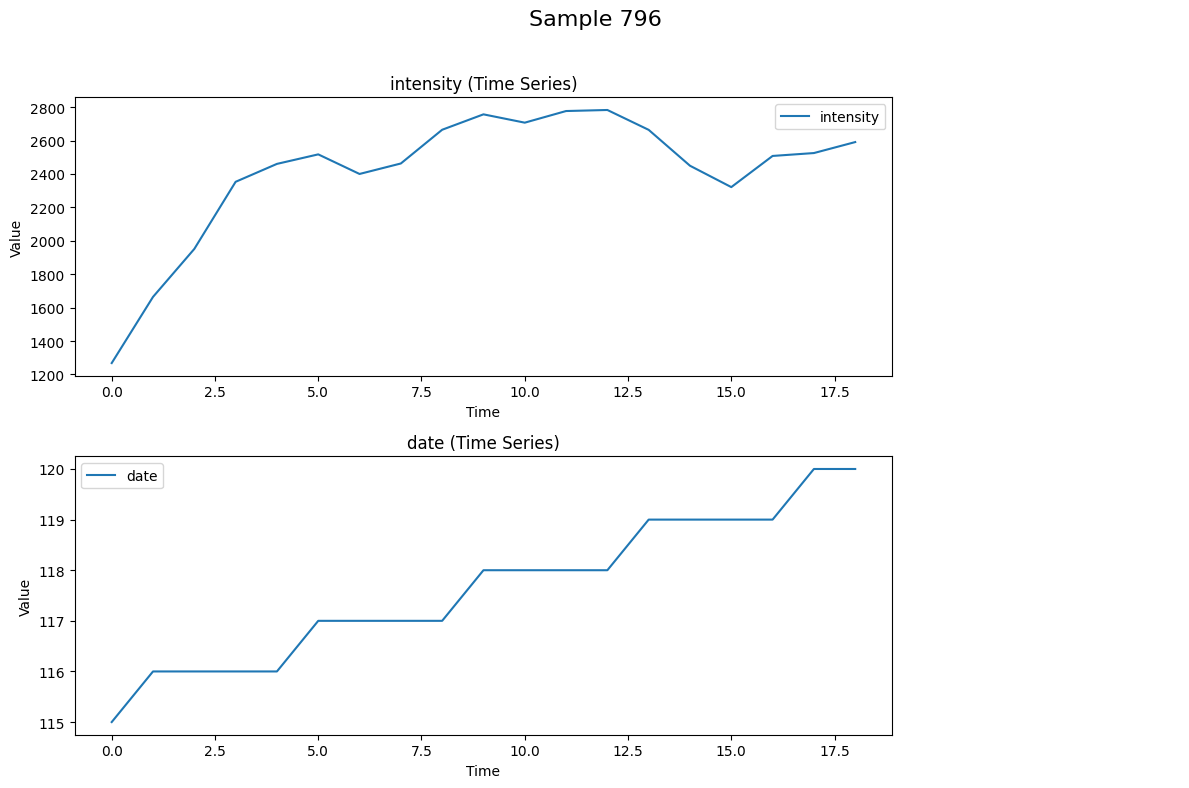


Dropped files statistics:
intensity: 0
date: 0
Year: 1955


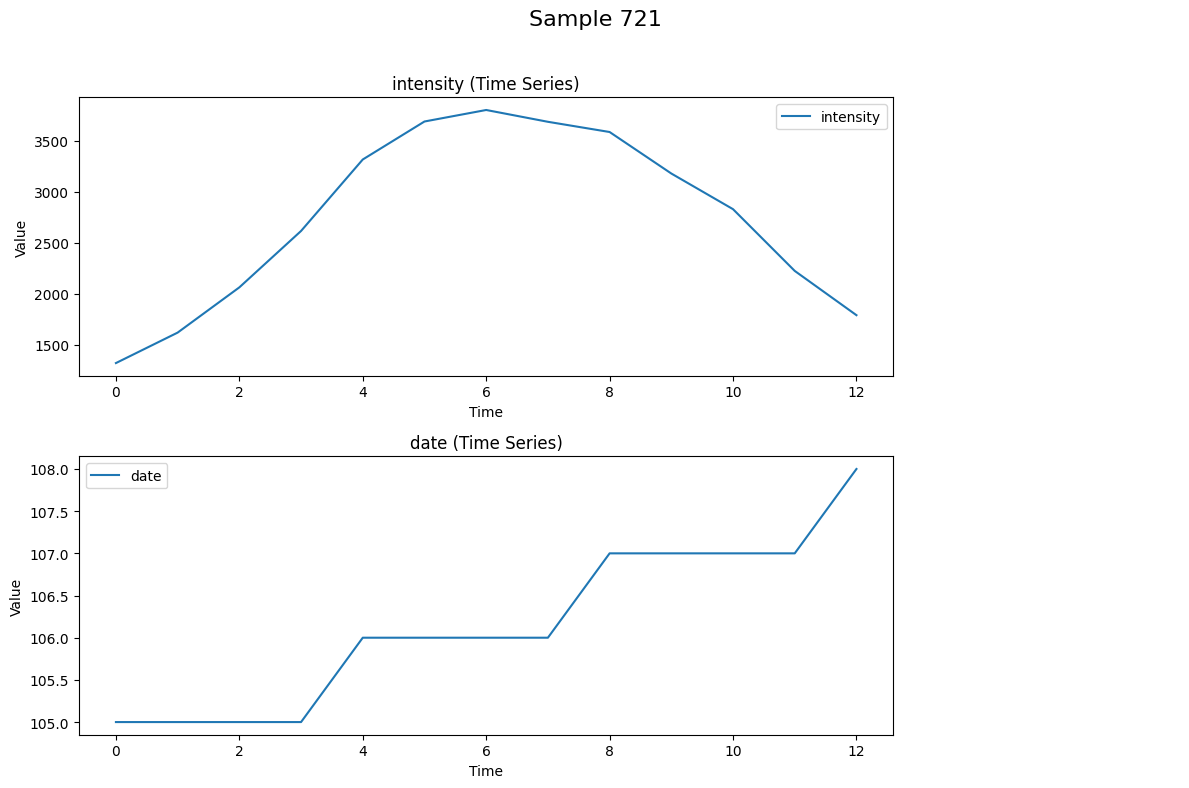


Dropped files statistics:
intensity: 0
date: 0
Year: 1956


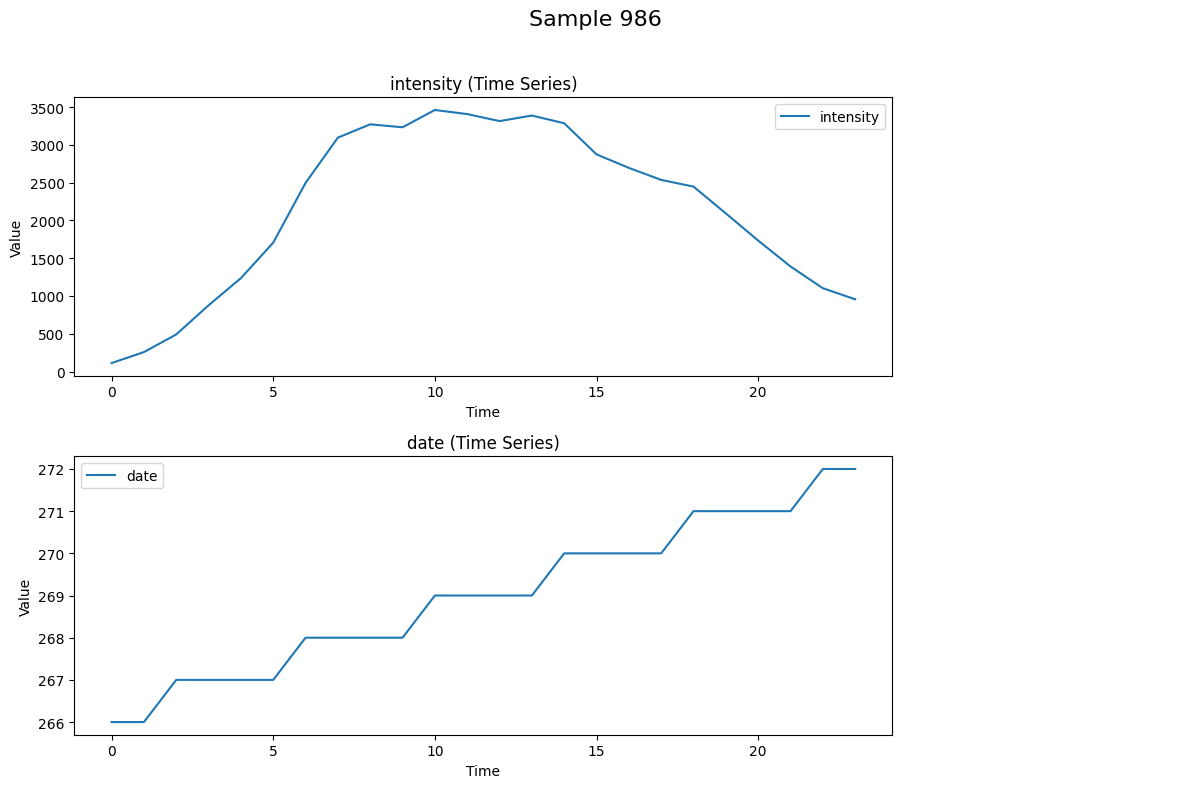


Dropped files statistics:
intensity: 0
date: 0
Year: 1957


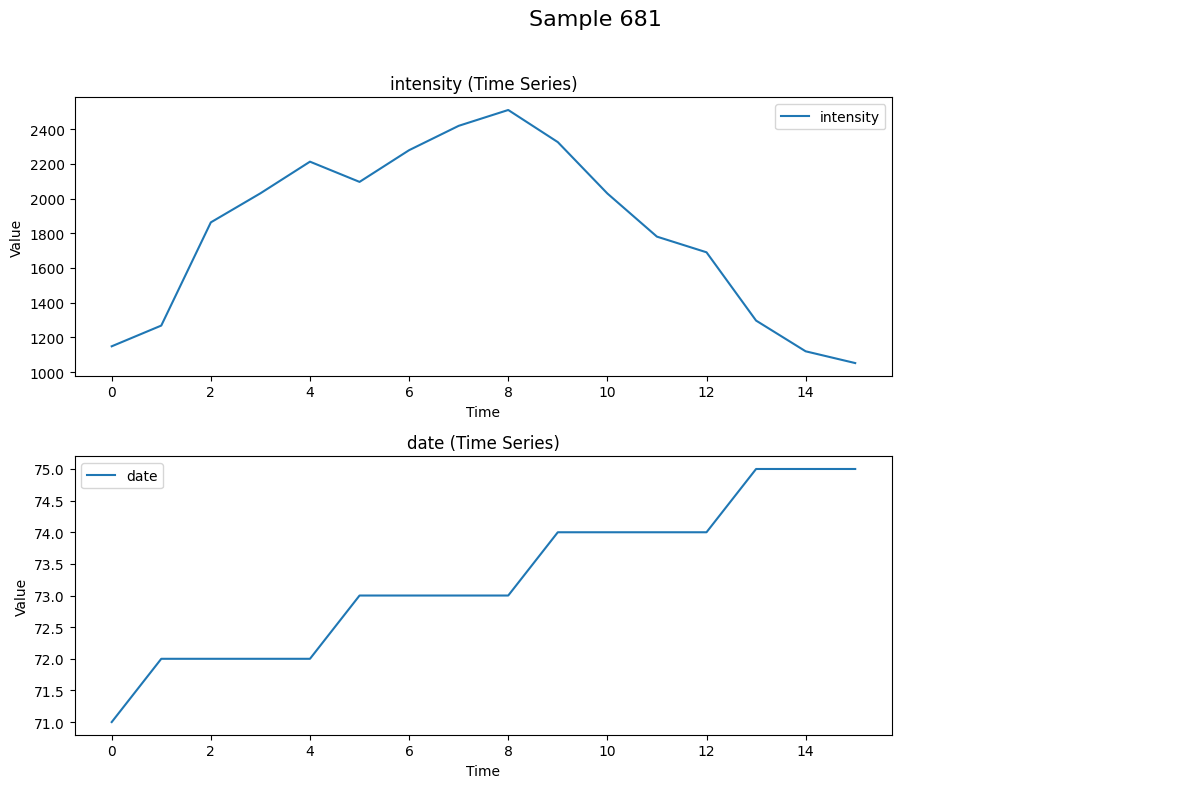


Dropped files statistics:
intensity: 0
date: 0
Year: 1958


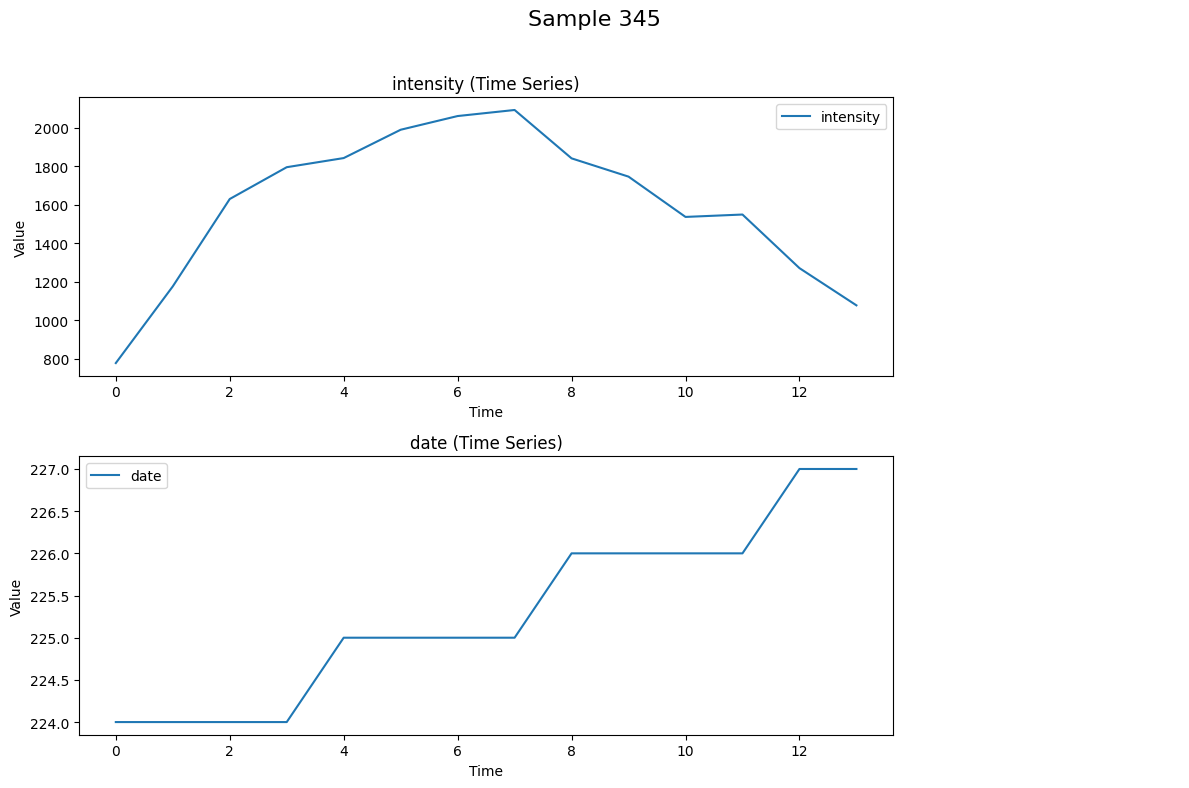


Dropped files statistics:
intensity: 0
date: 0
Year: 1959


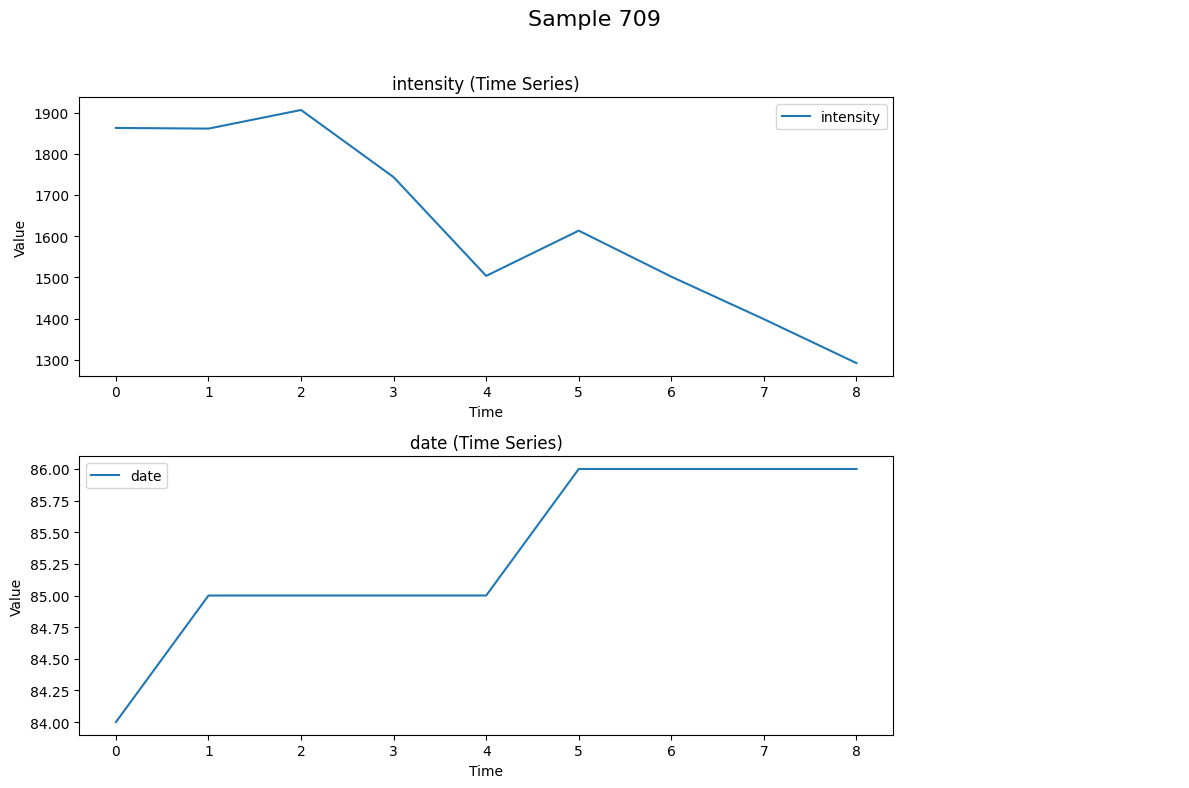


Dropped files statistics:
intensity: 0
date: 0
Year: 1960


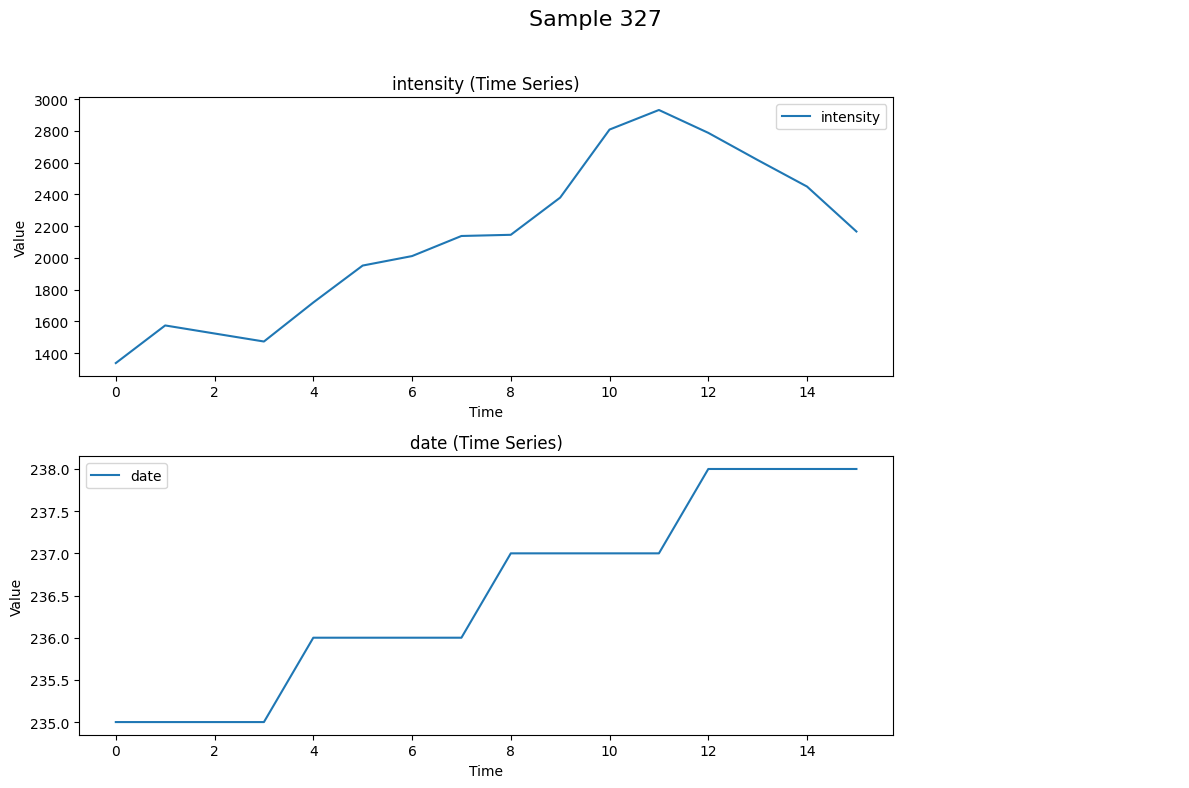


Dropped files statistics:
intensity: 0
date: 0
Year: 1961


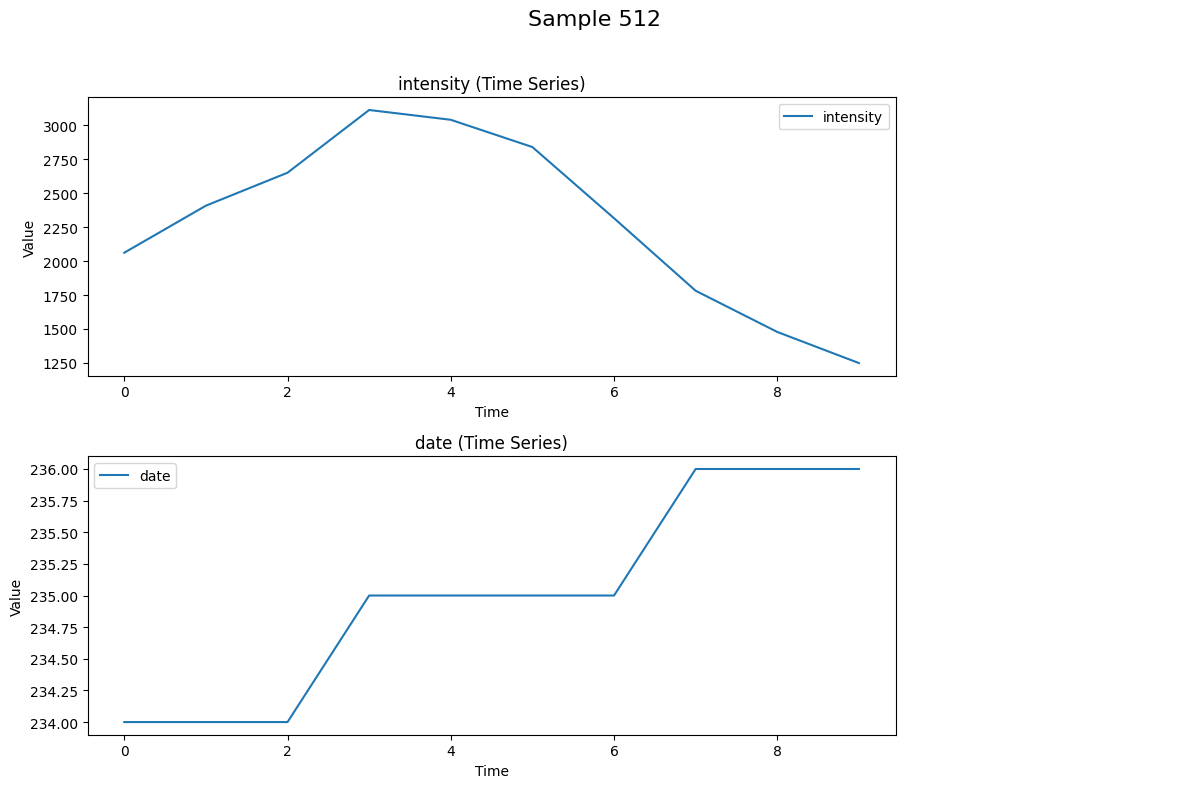


Dropped files statistics:
intensity: 0
date: 0
Year: 1962


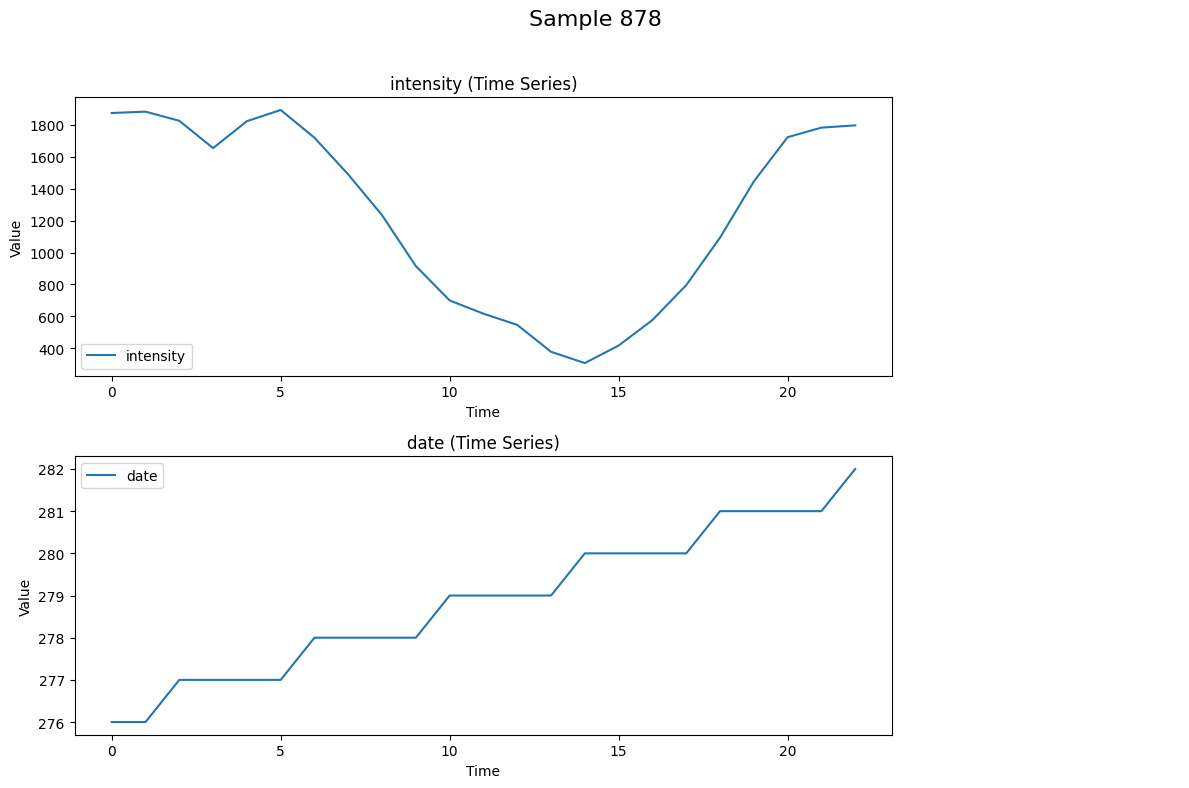


Dropped files statistics:
intensity: 0
date: 0
Year: 1963


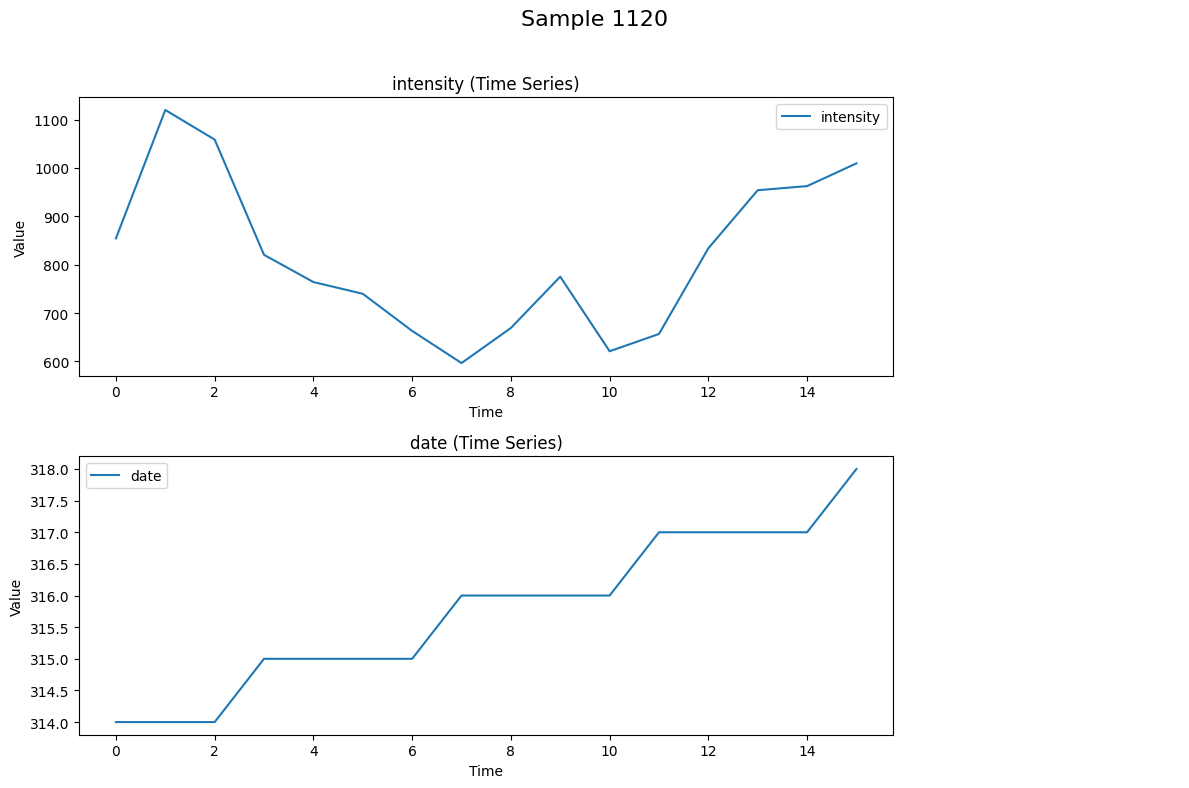


Dropped files statistics:
intensity: 0
date: 0
Year: 1964


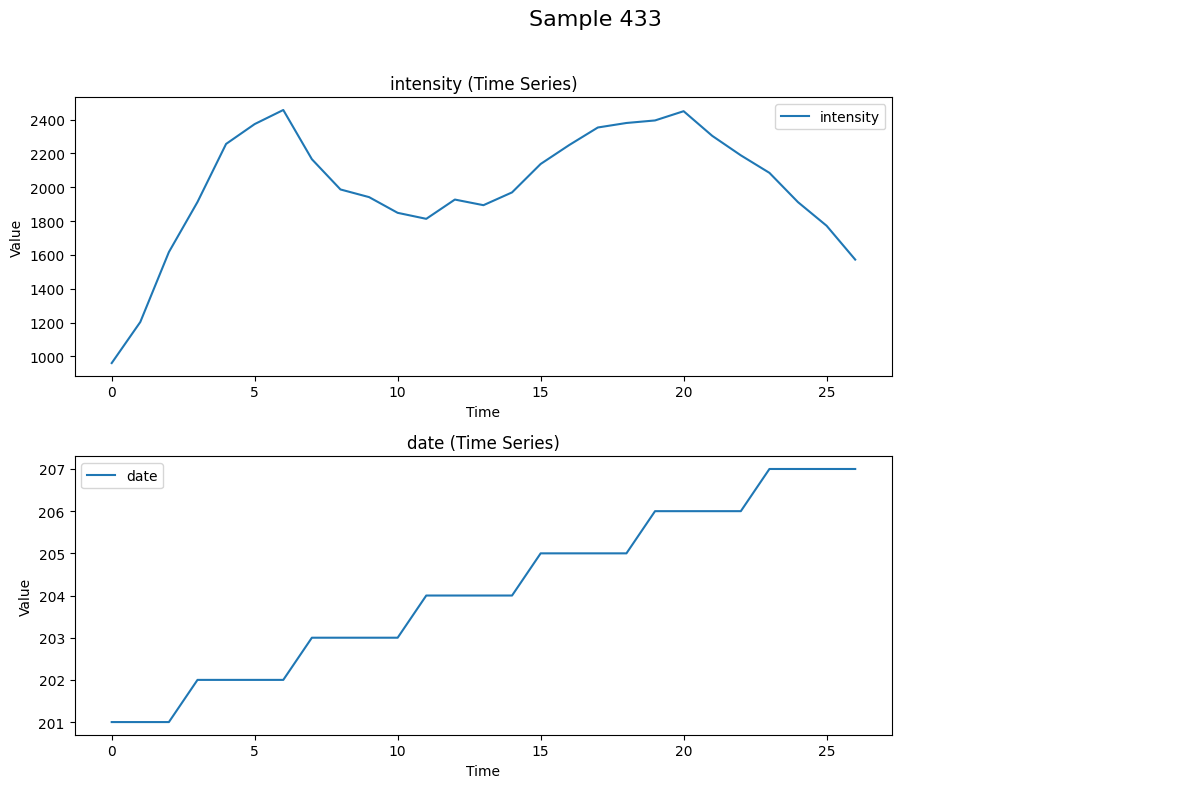


Dropped files statistics:
intensity: 0
date: 0
Year: 1965


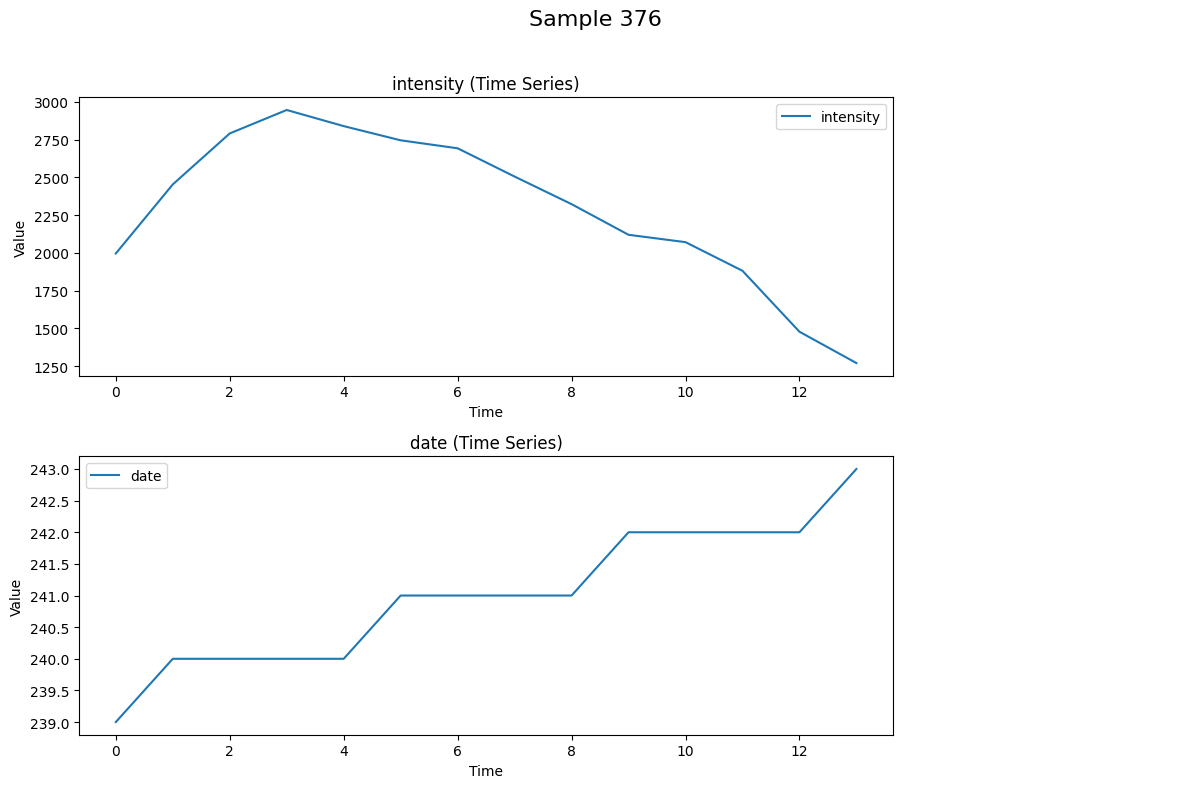


Dropped files statistics:
intensity: 0
date: 0
Year: 1966


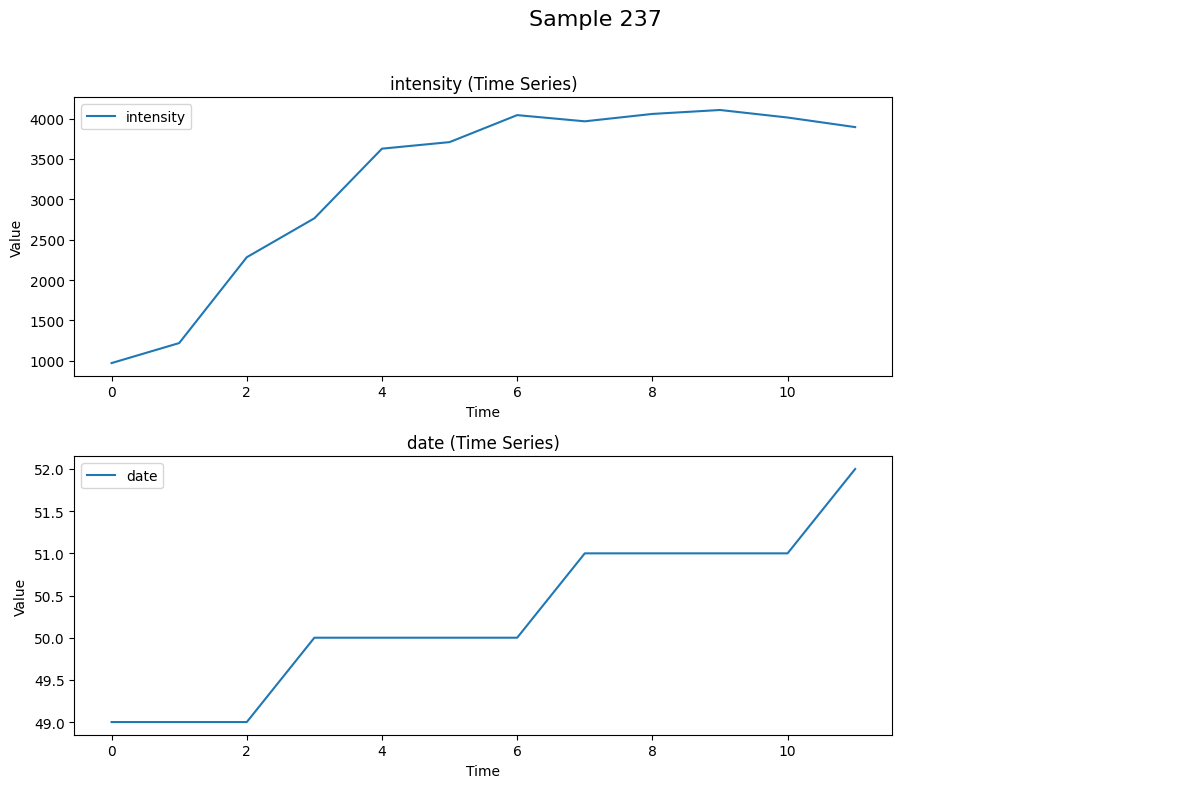


Dropped files statistics:
intensity: 0
date: 0
Year: 1967


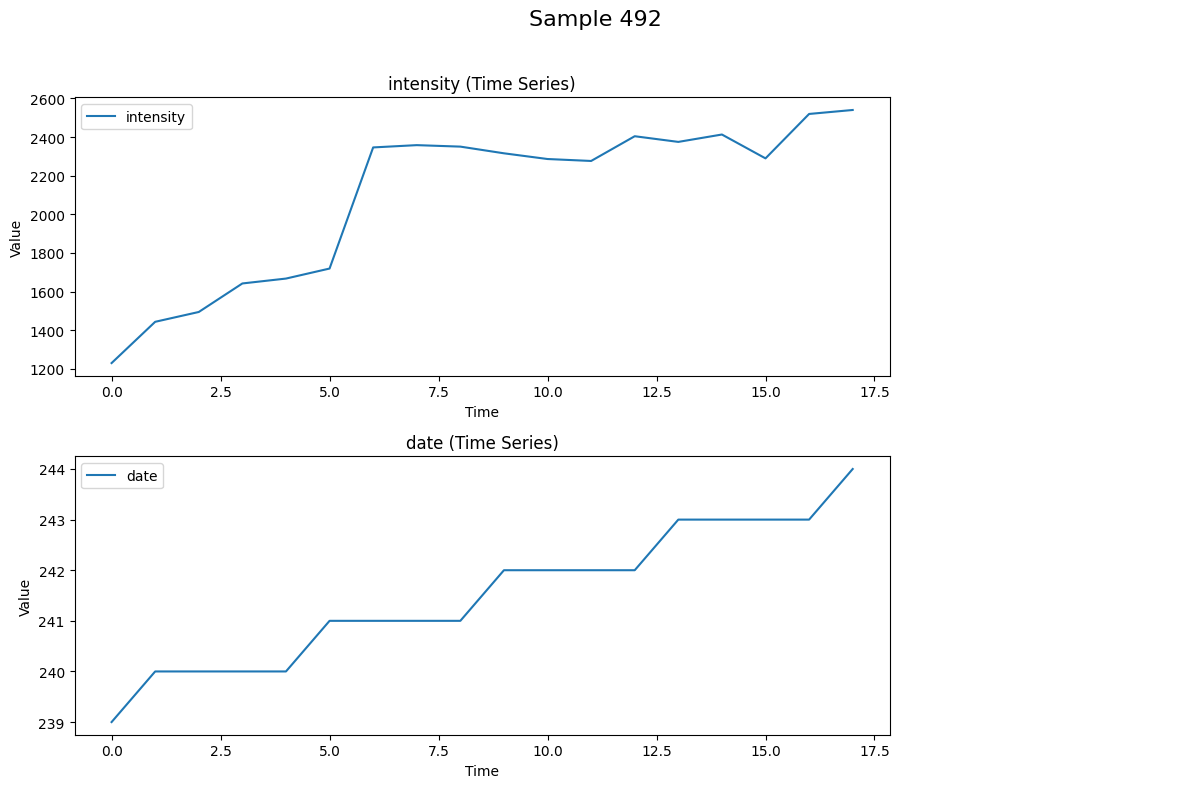


Dropped files statistics:
intensity: 0
date: 0
Year: 1968


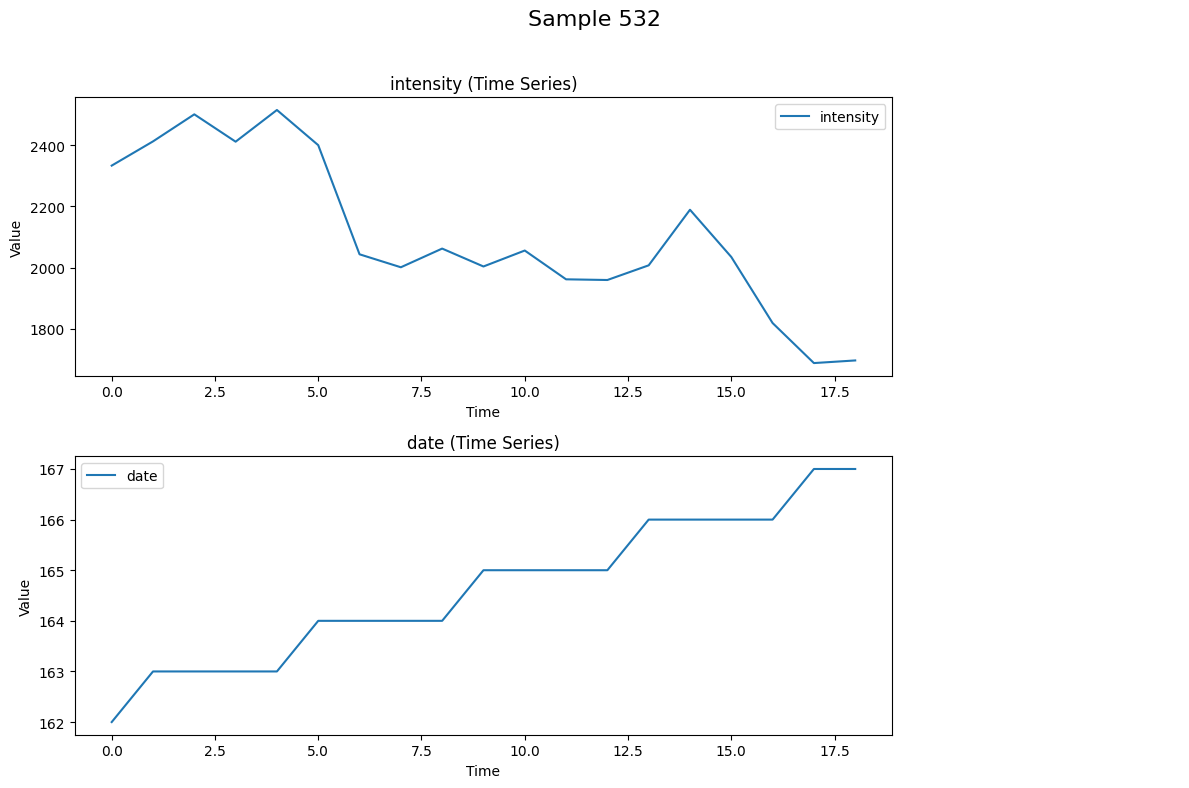


Dropped files statistics:
intensity: 0
date: 0
Year: 1969


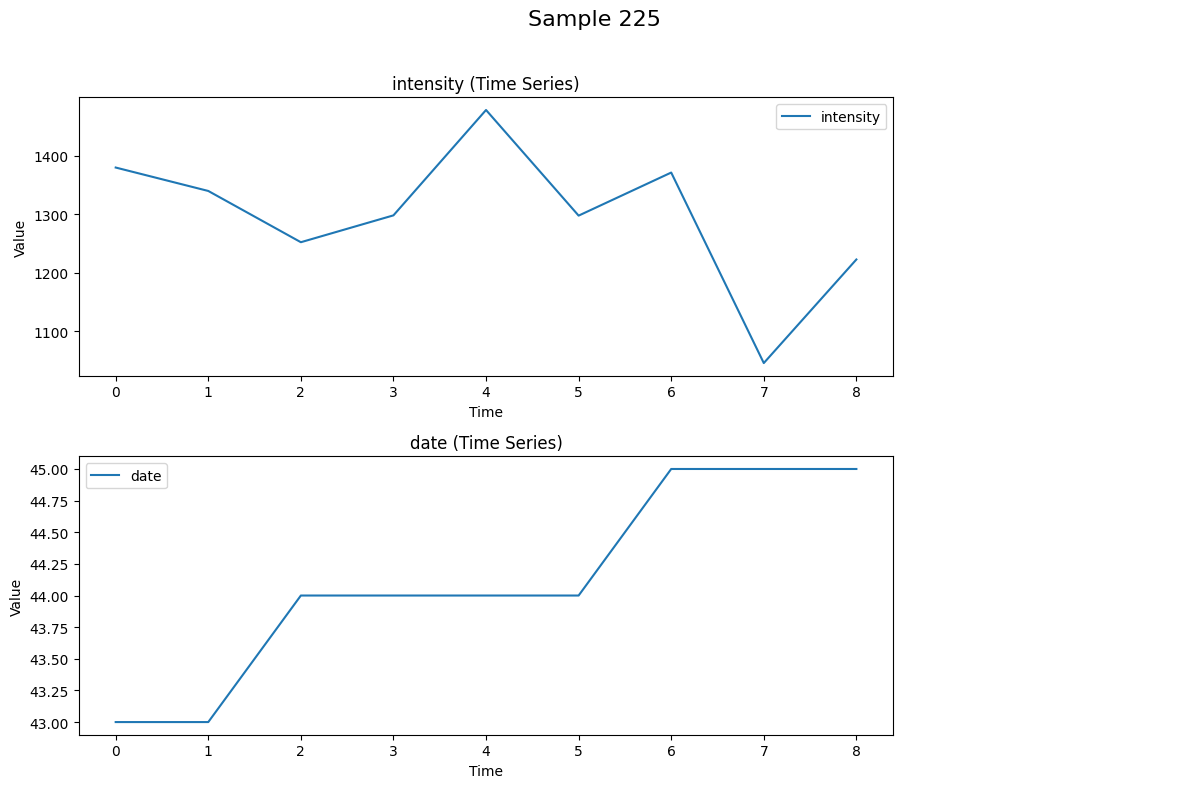


Dropped files statistics:
intensity: 0
date: 0
Year: 1970


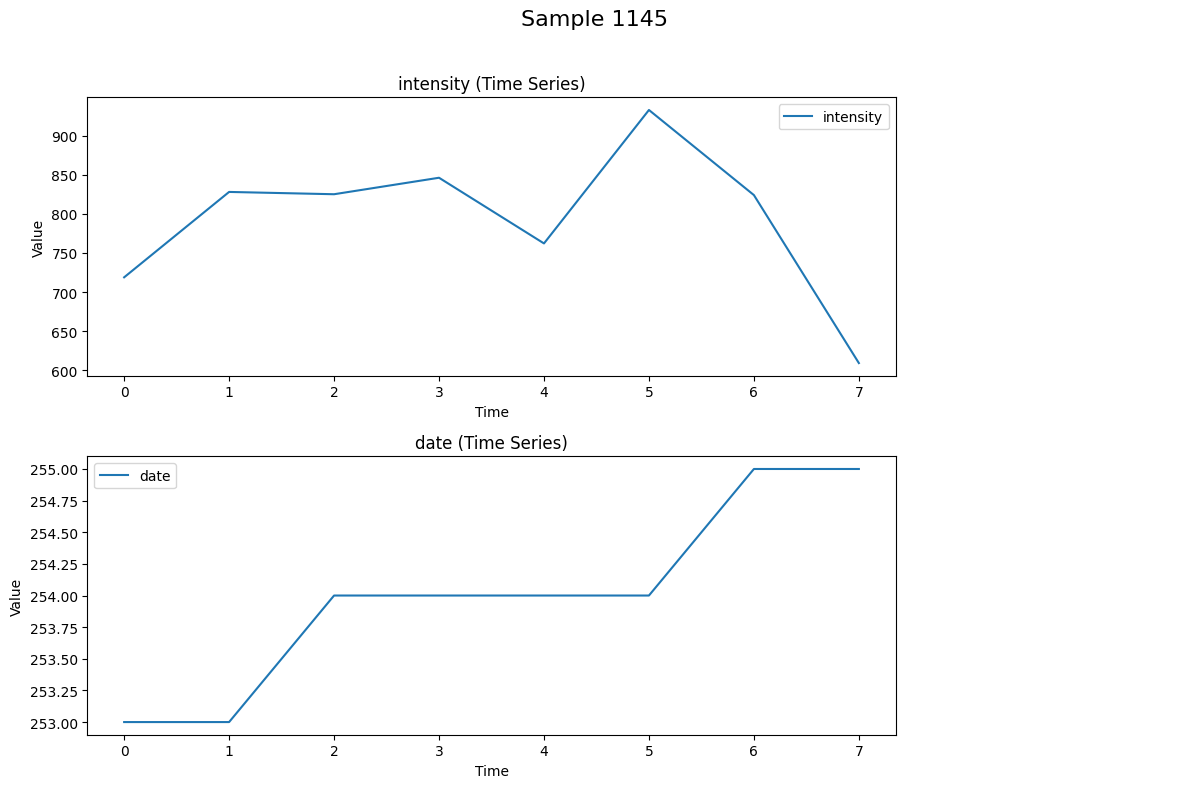


Dropped files statistics:
intensity: 0
date: 0
Year: 1971


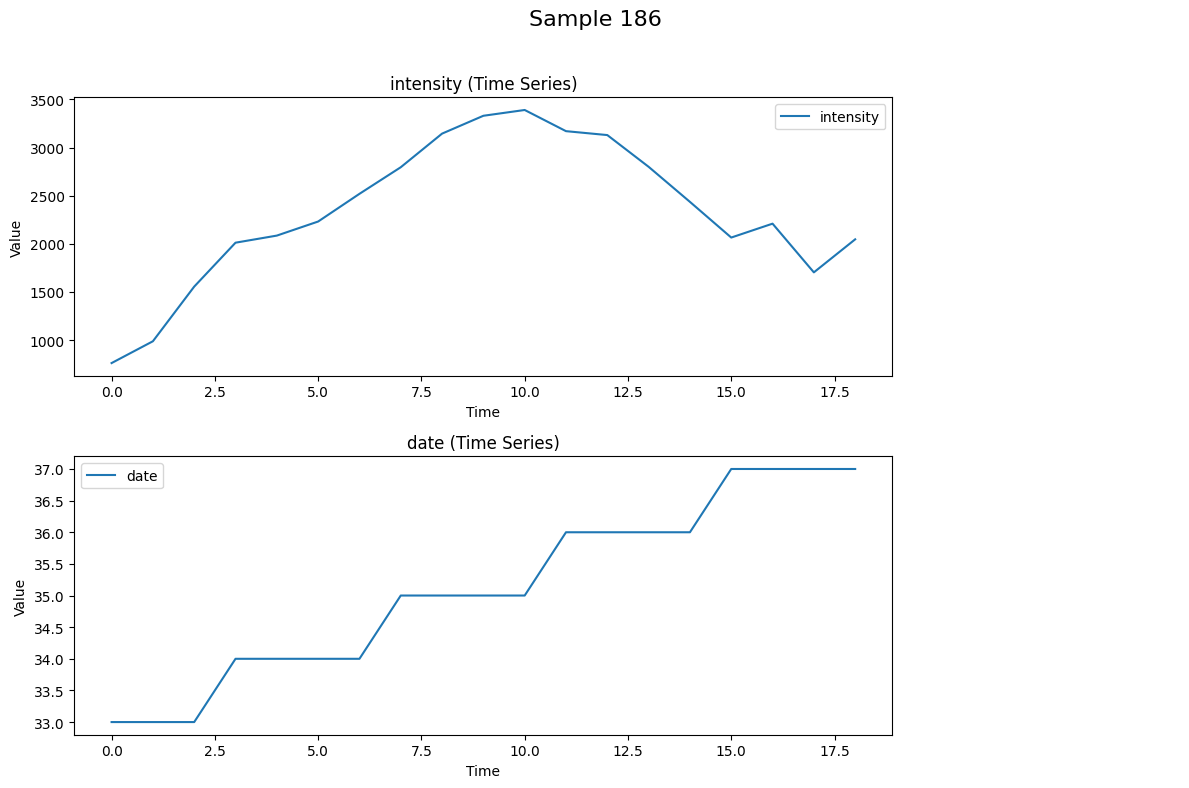


Dropped files statistics:
intensity: 0
date: 0
Year: 1972


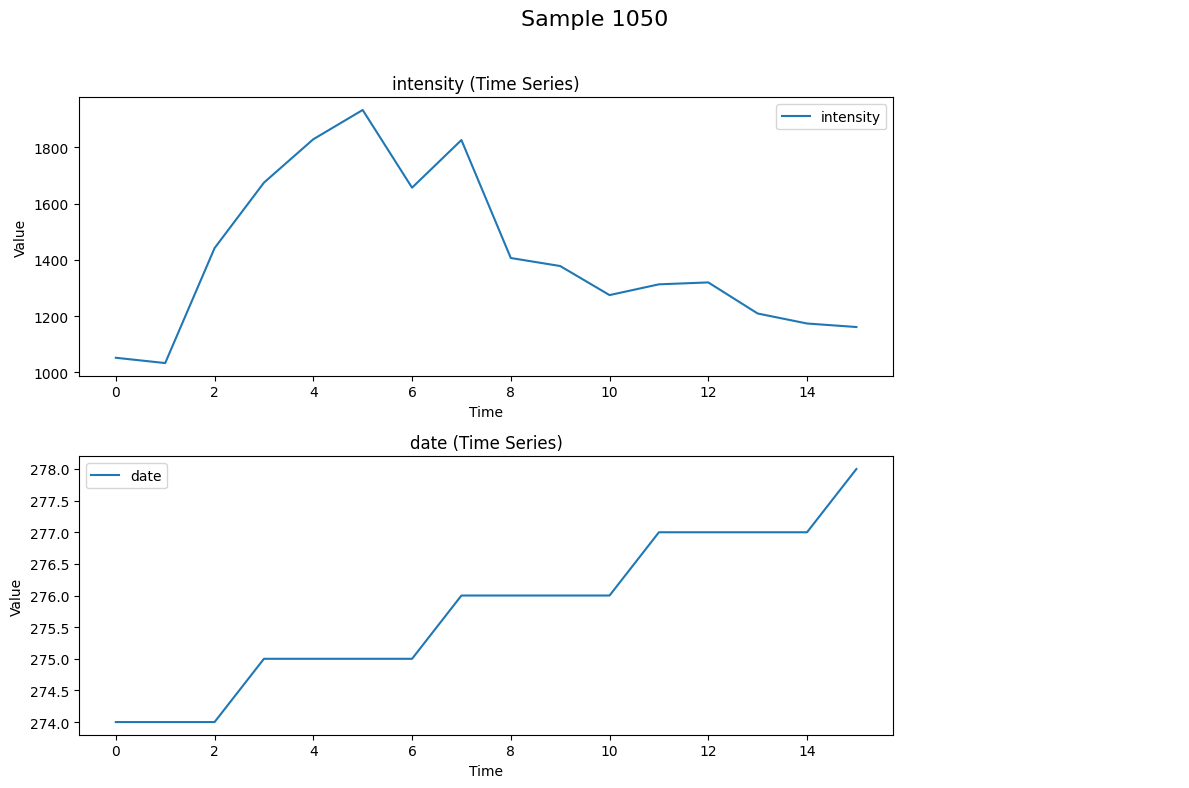


Dropped files statistics:
intensity: 0
date: 0
Year: 1973


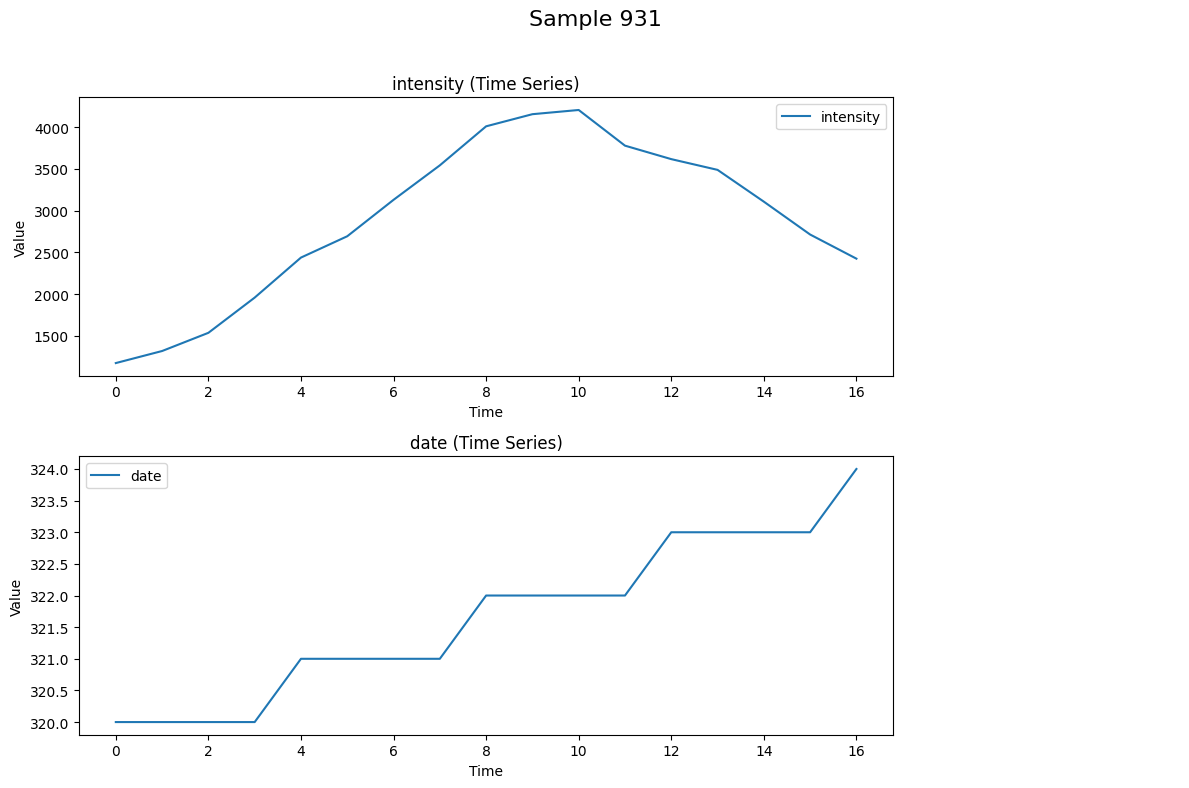


Dropped files statistics:
intensity: 0
date: 0
Year: 1974


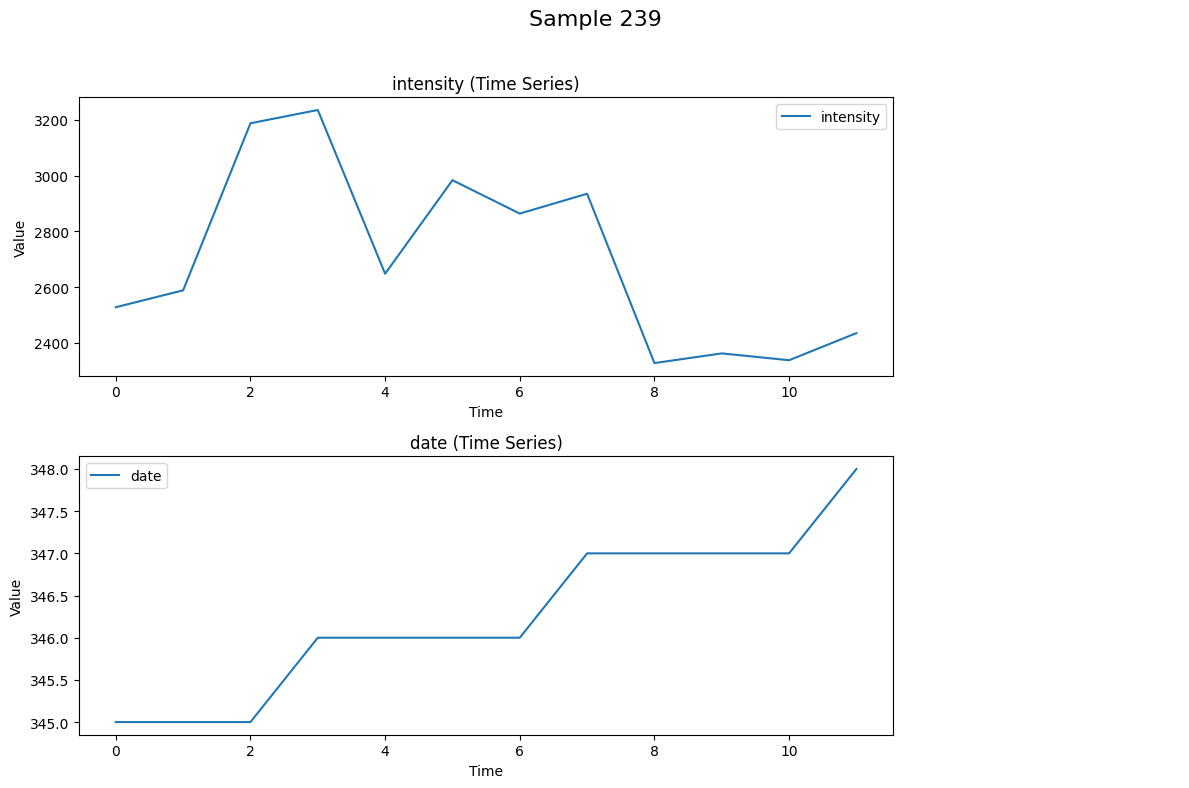


Dropped files statistics:
intensity: 0
date: 0
Year: 1975


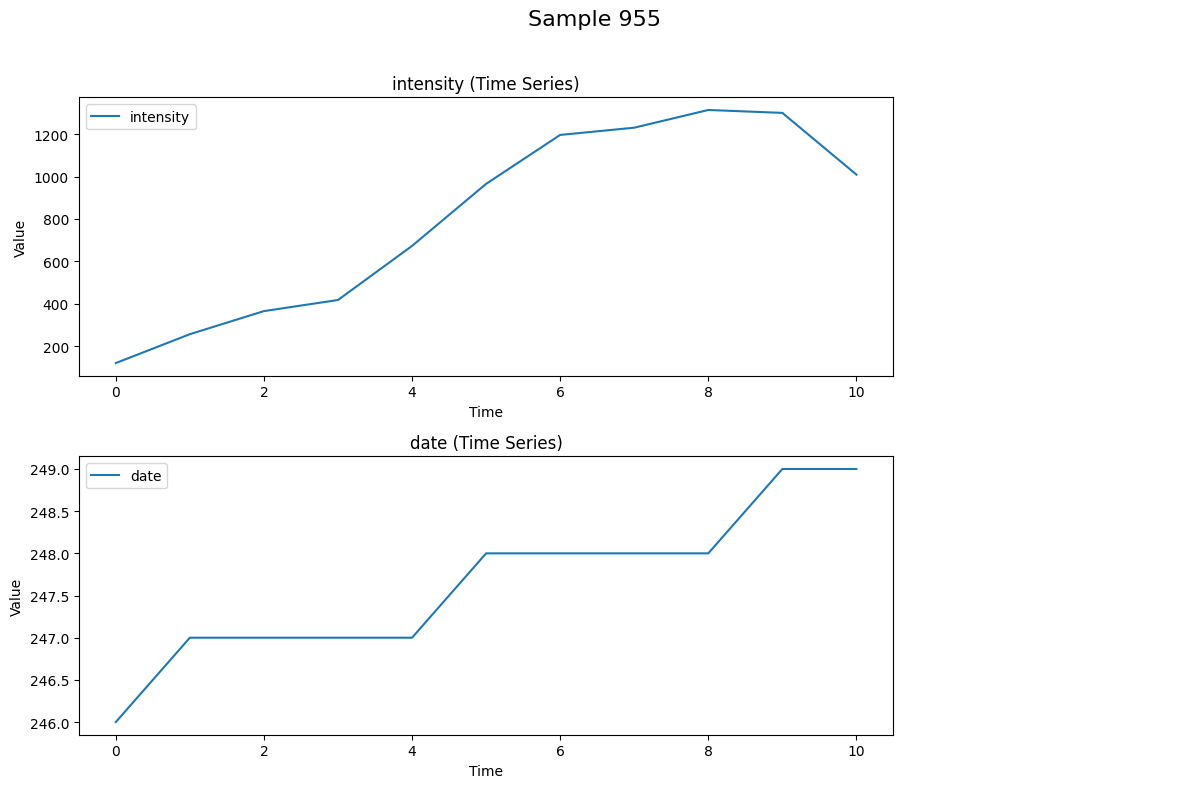


Dropped files statistics:
intensity: 0
date: 0
Year: 1976


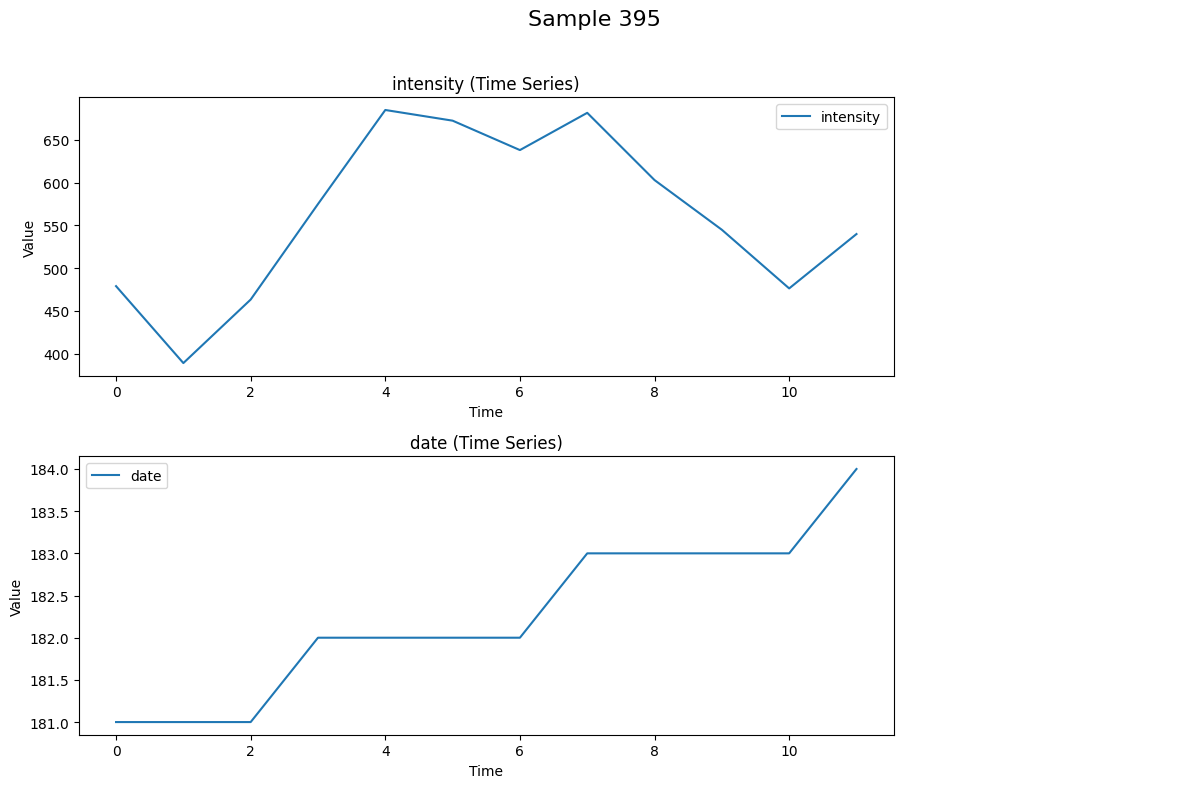


Dropped files statistics:
intensity: 0
date: 0
Year: 1977


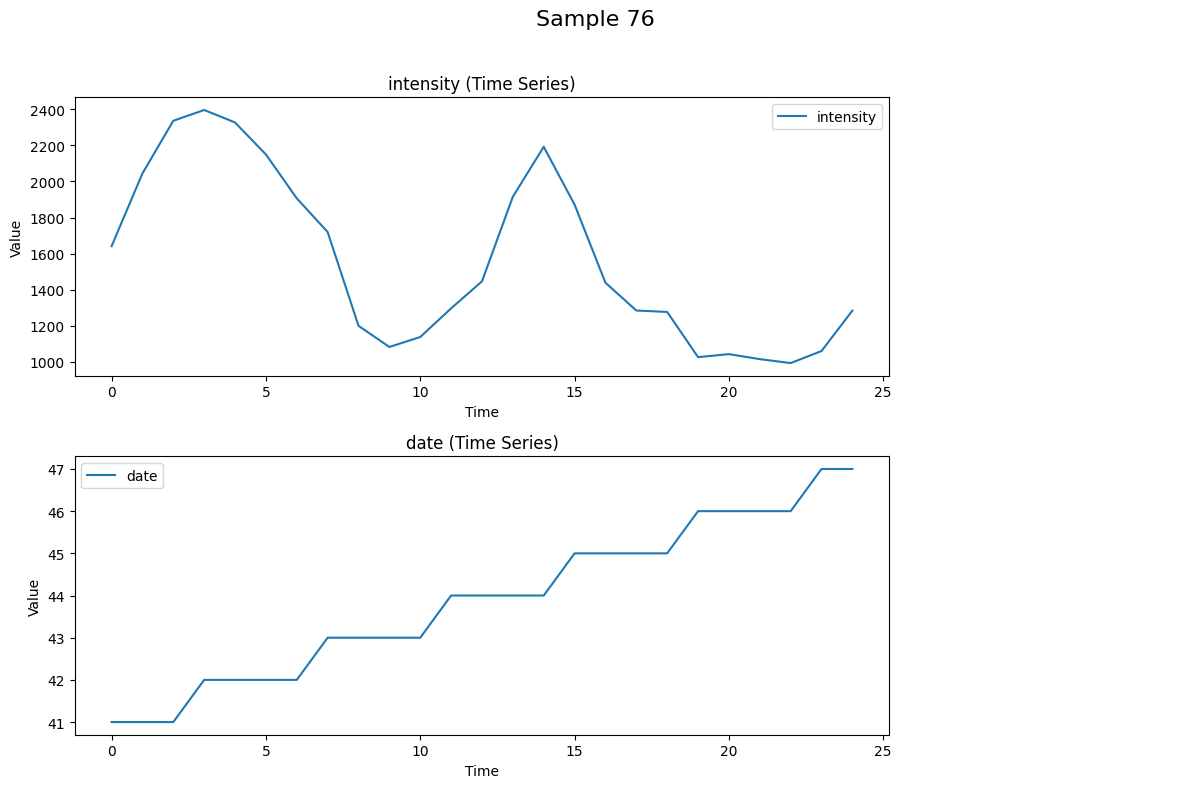


Dropped files statistics:
intensity: 0
date: 0
Year: 1978


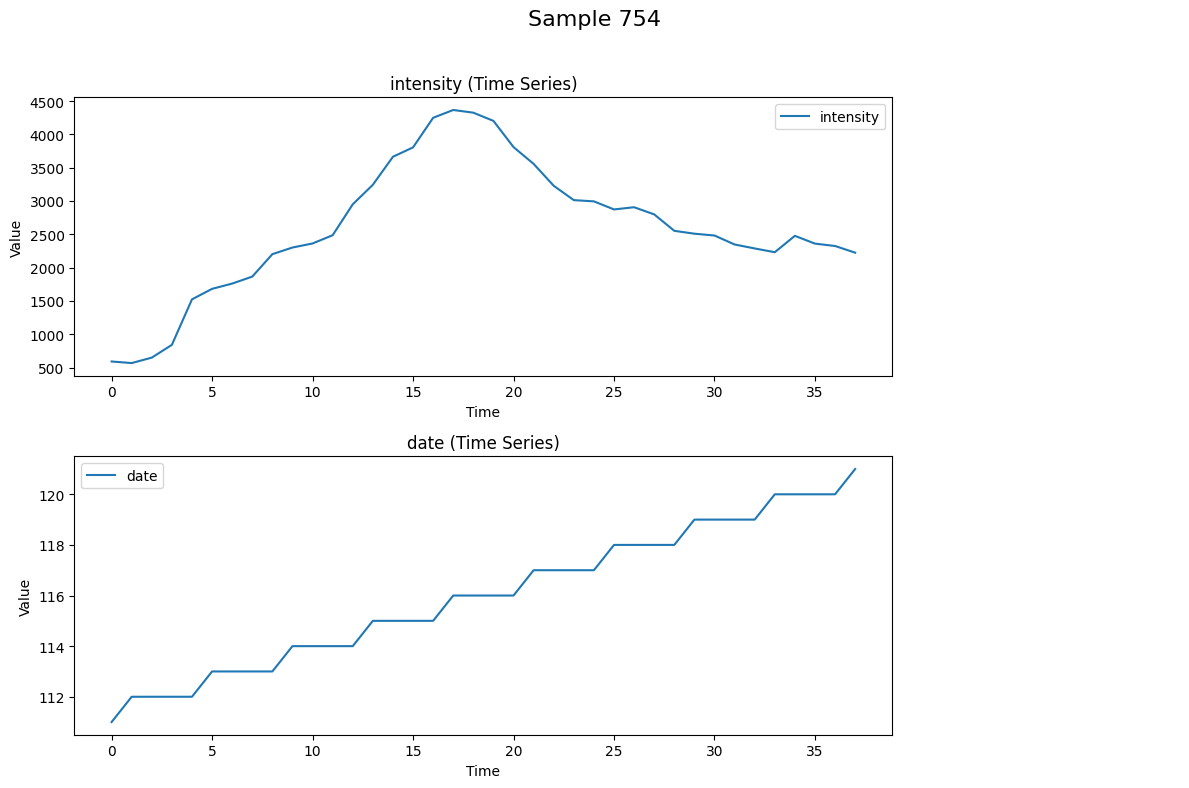


Dropped files statistics:
intensity: 0
date: 0
Year: 1979


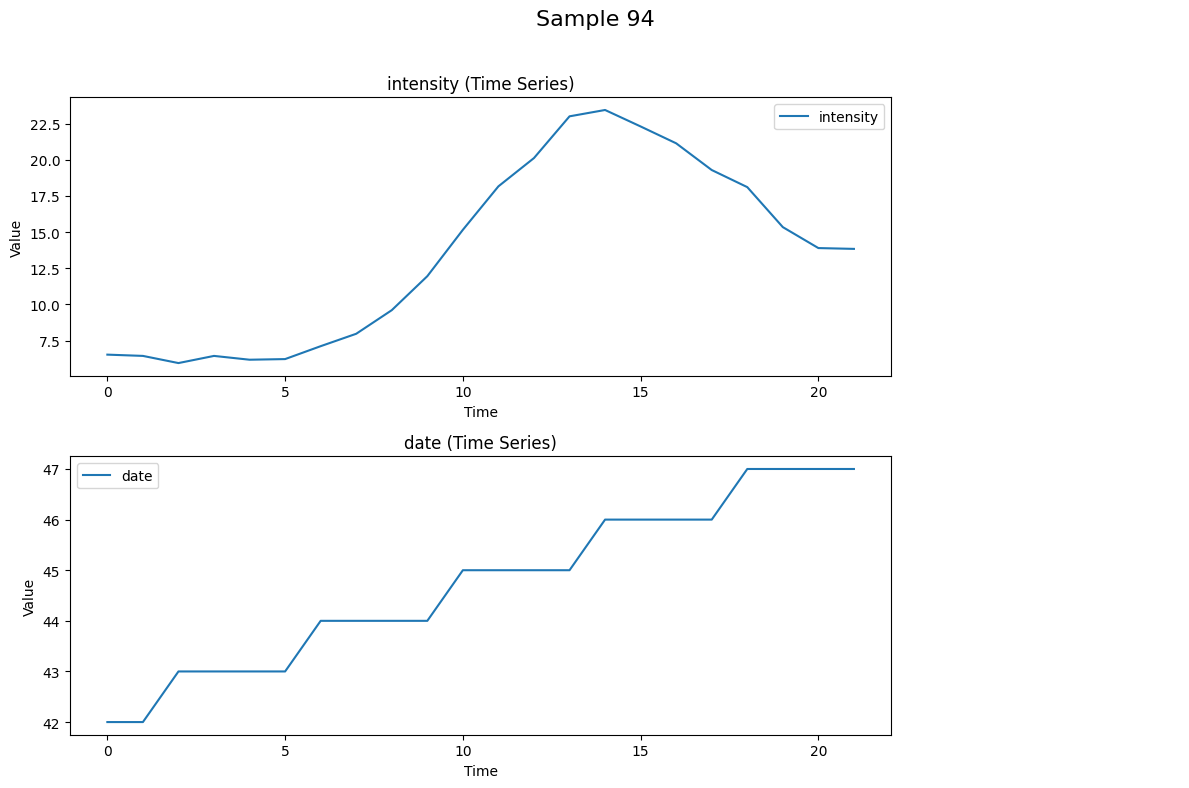


Dropped files statistics:
intensity: 0
date: 0
Year: 1980


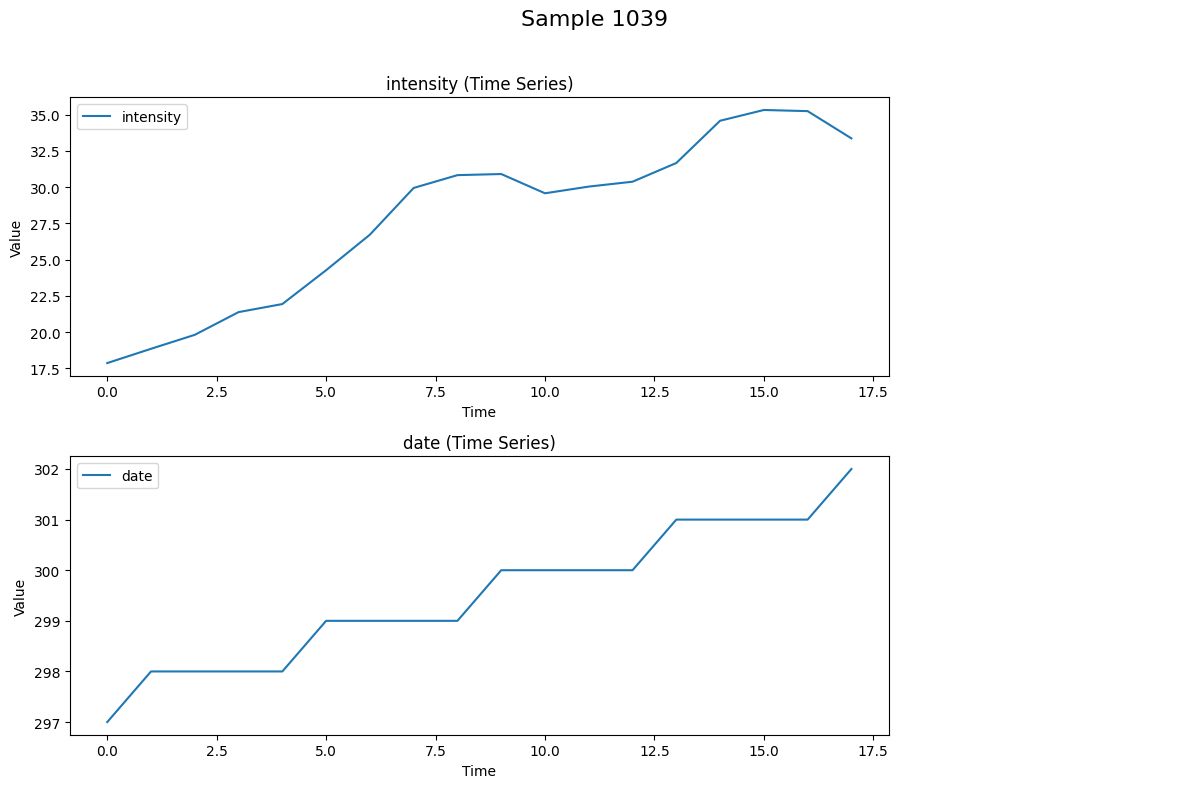


Dropped files statistics:
intensity: 0
date: 0
Year: 1981


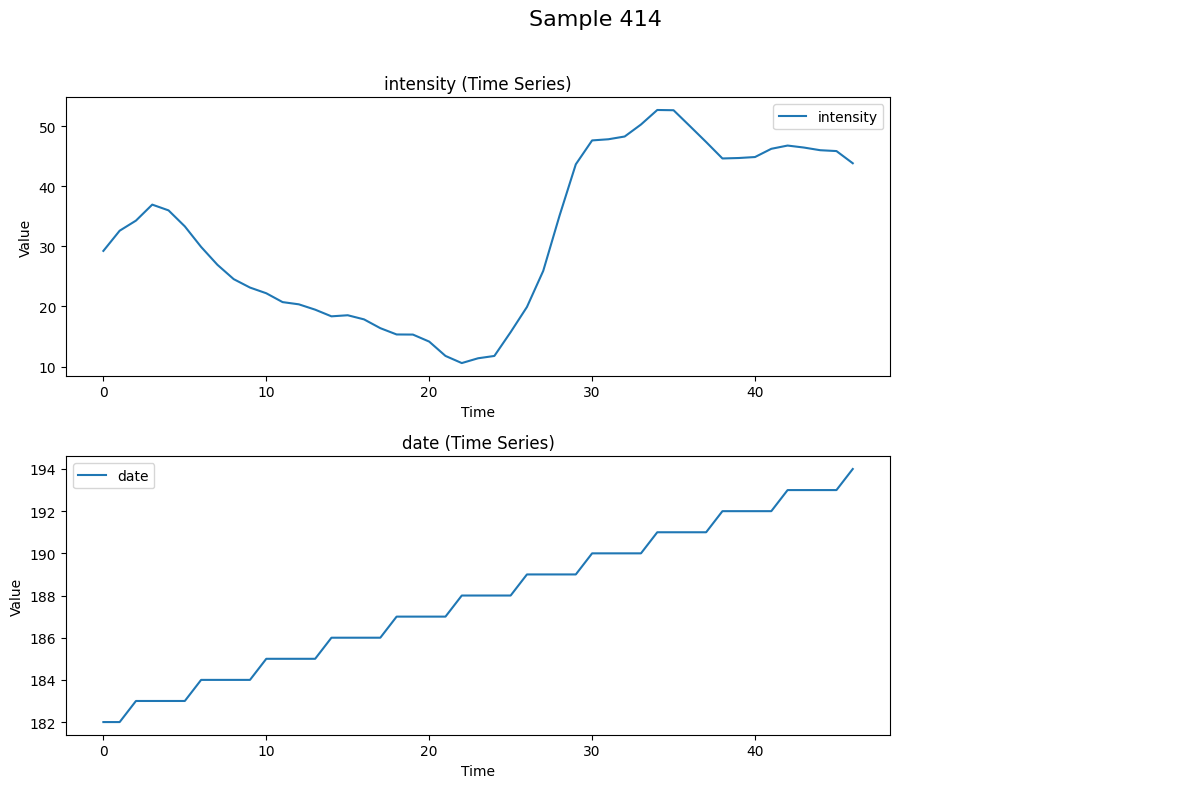


Dropped files statistics:
intensity: 0
date: 0
Year: 1982


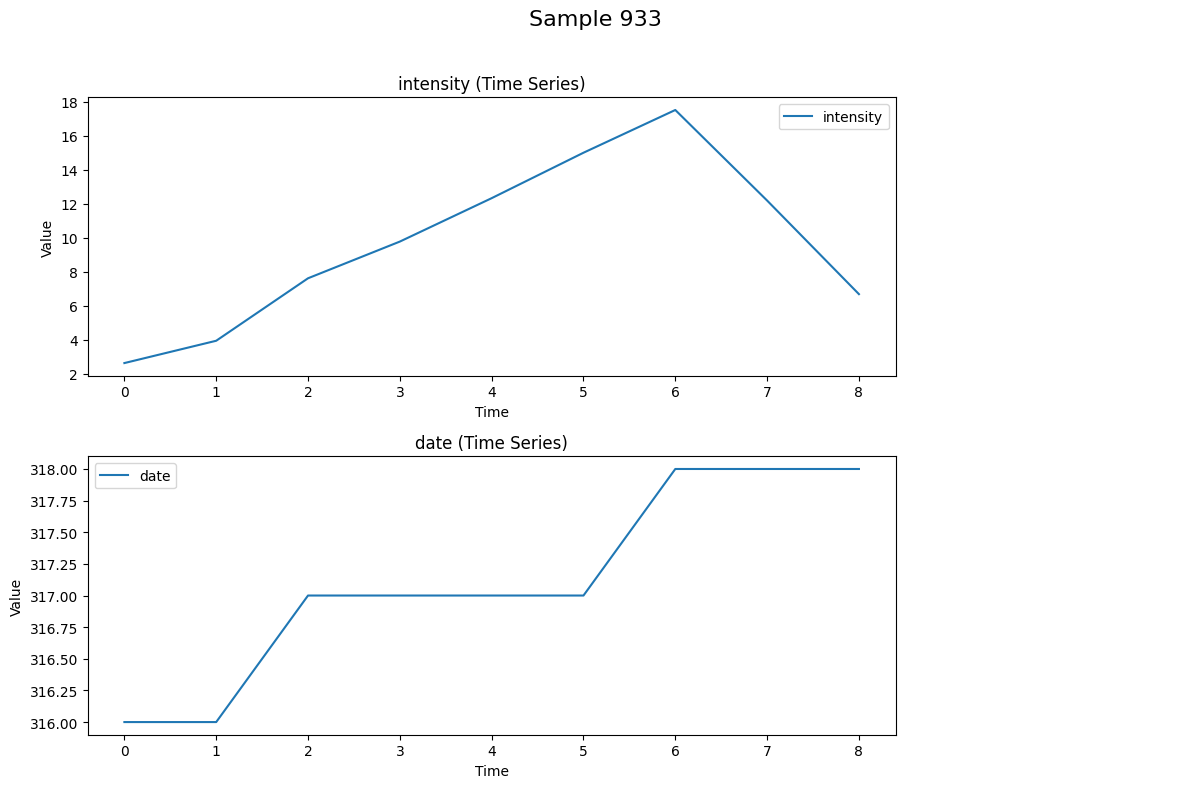


Dropped files statistics:
intensity: 0
date: 0
Year: 1983


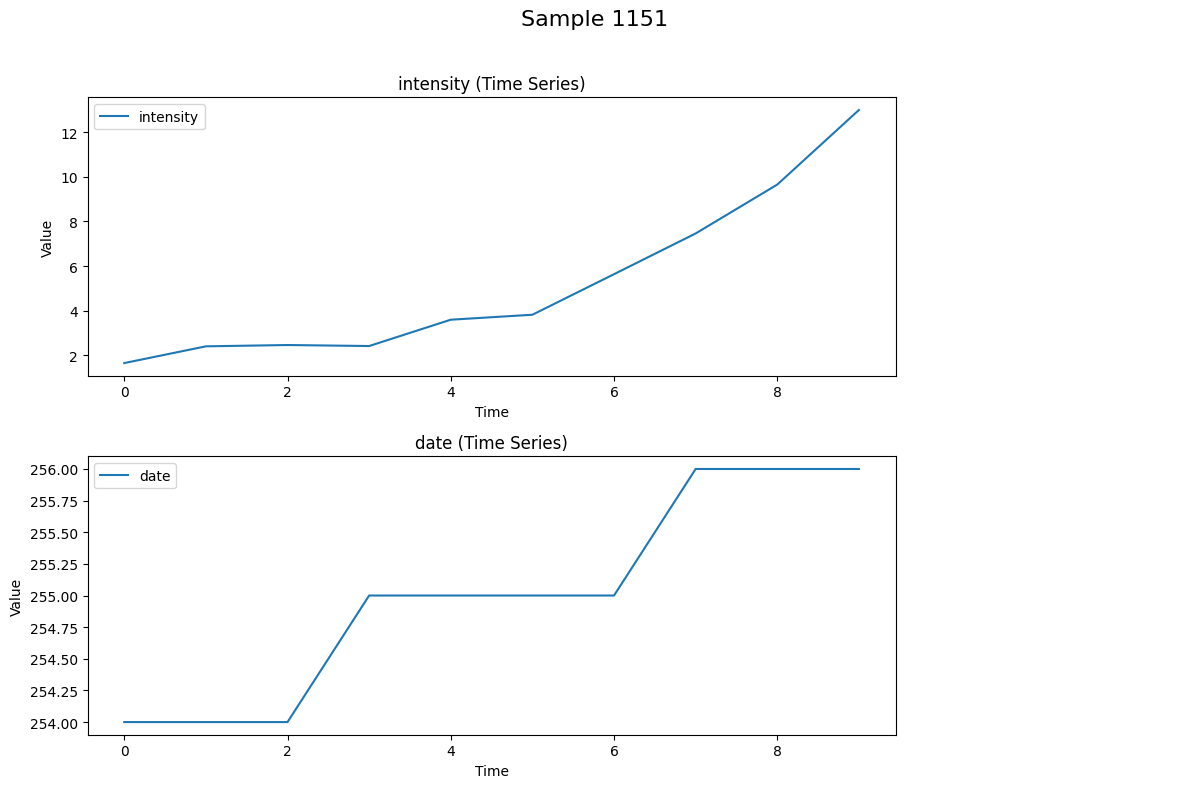


Dropped files statistics:
intensity: 0
date: 0
Year: 1984


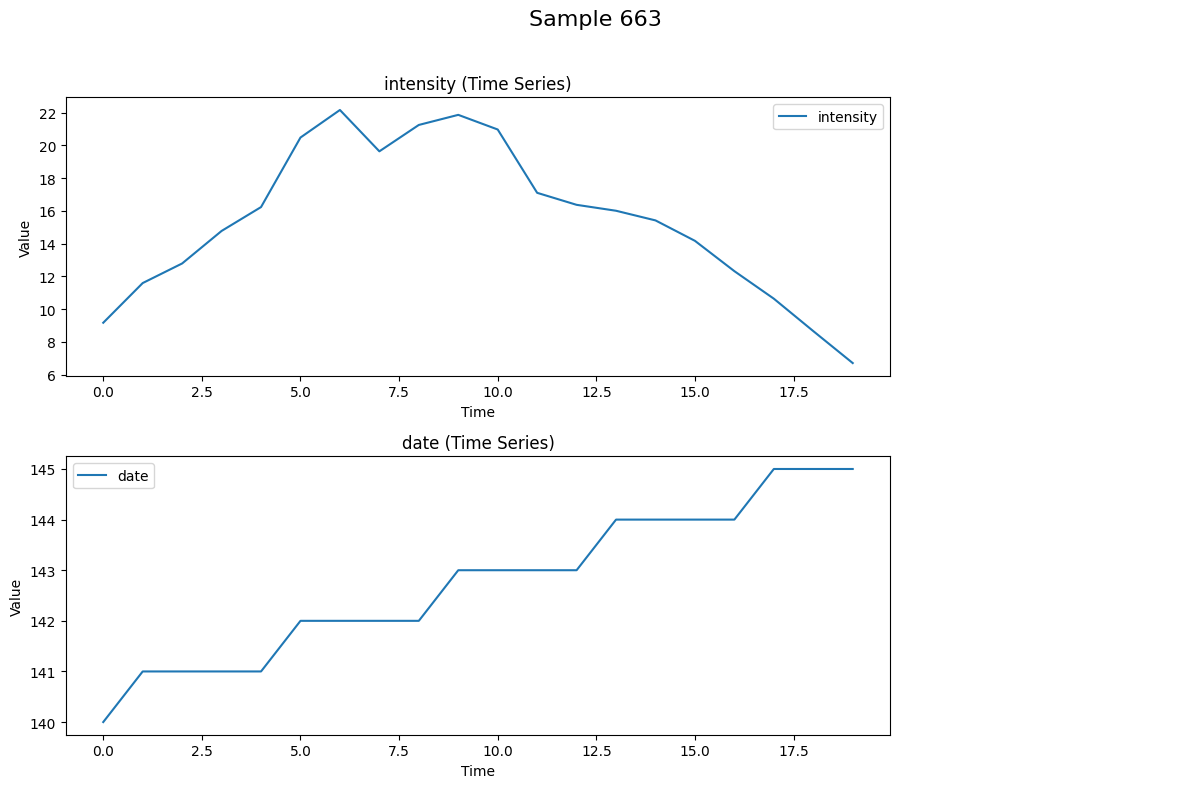


Dropped files statistics:
intensity: 0
date: 0
Year: 1985


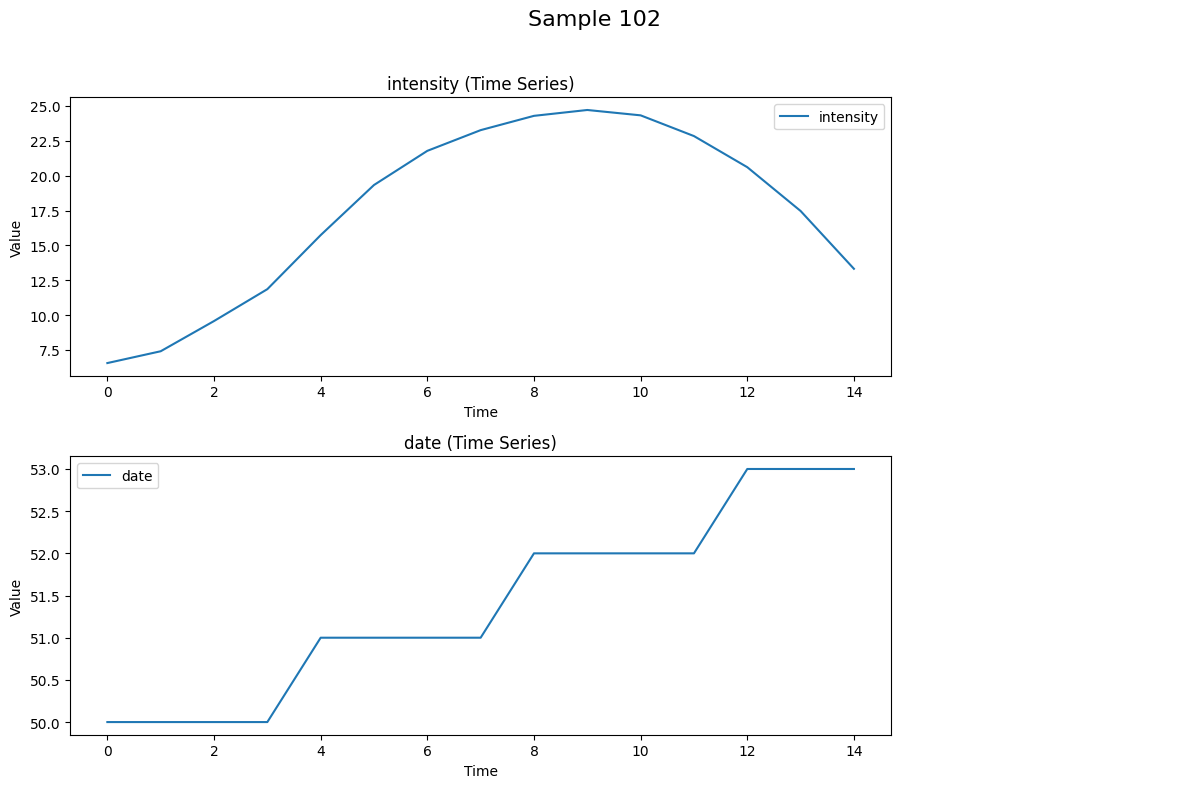


Dropped files statistics:
intensity: 0
date: 0
Year: 1986


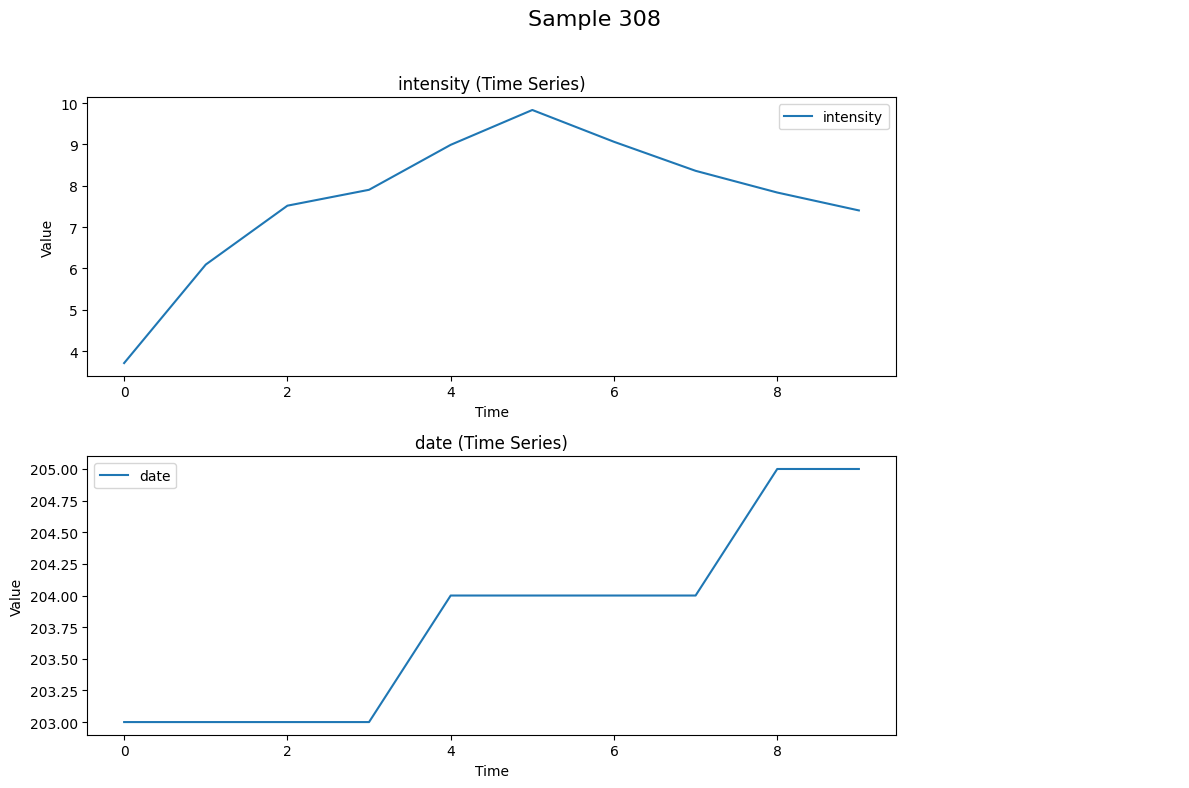


Dropped files statistics:
intensity: 0
date: 0
Year: 1987


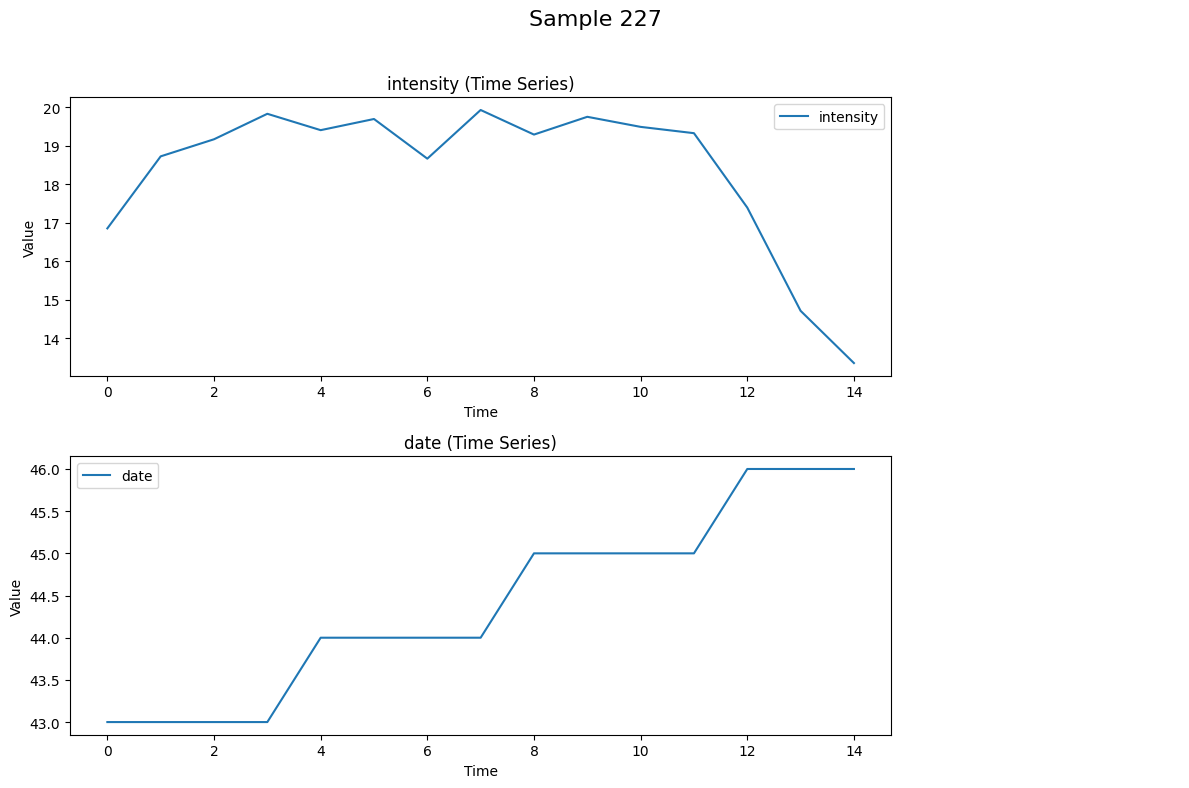


Dropped files statistics:
intensity: 0
date: 0
Year: 1988


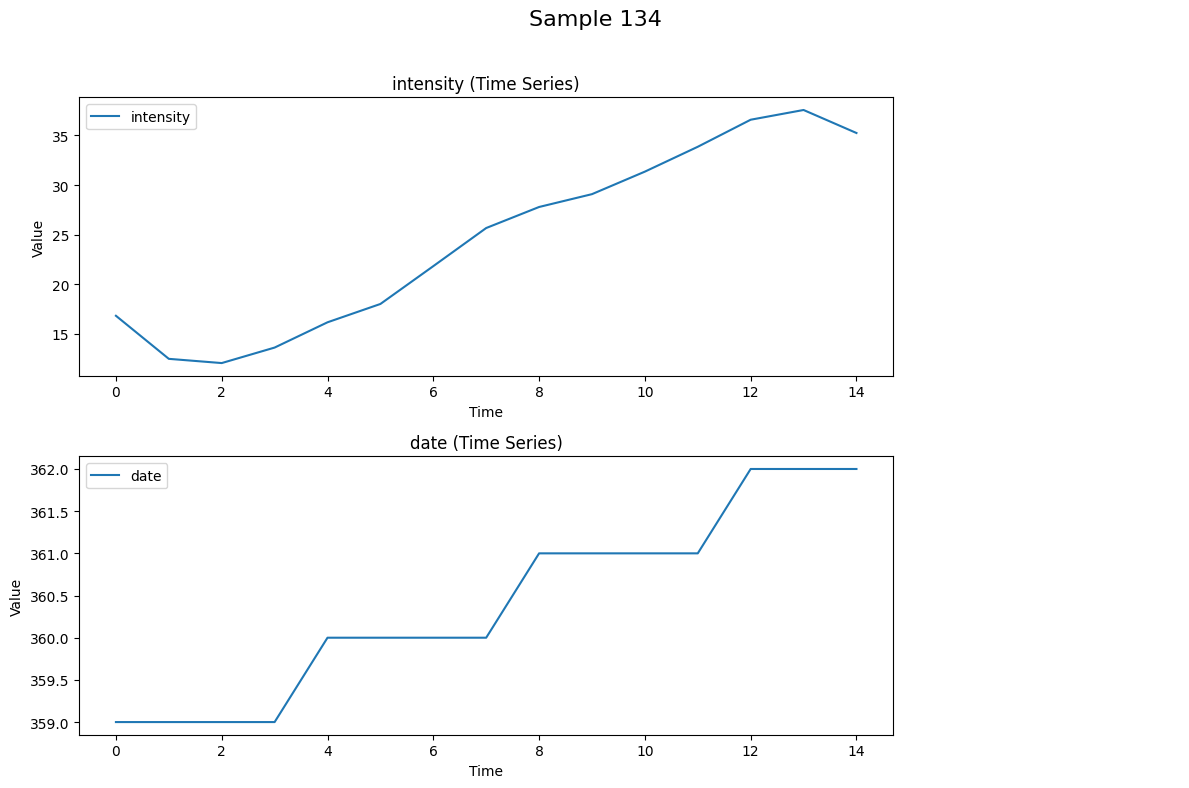


Dropped files statistics:
intensity: 0
date: 0
Year: 1989


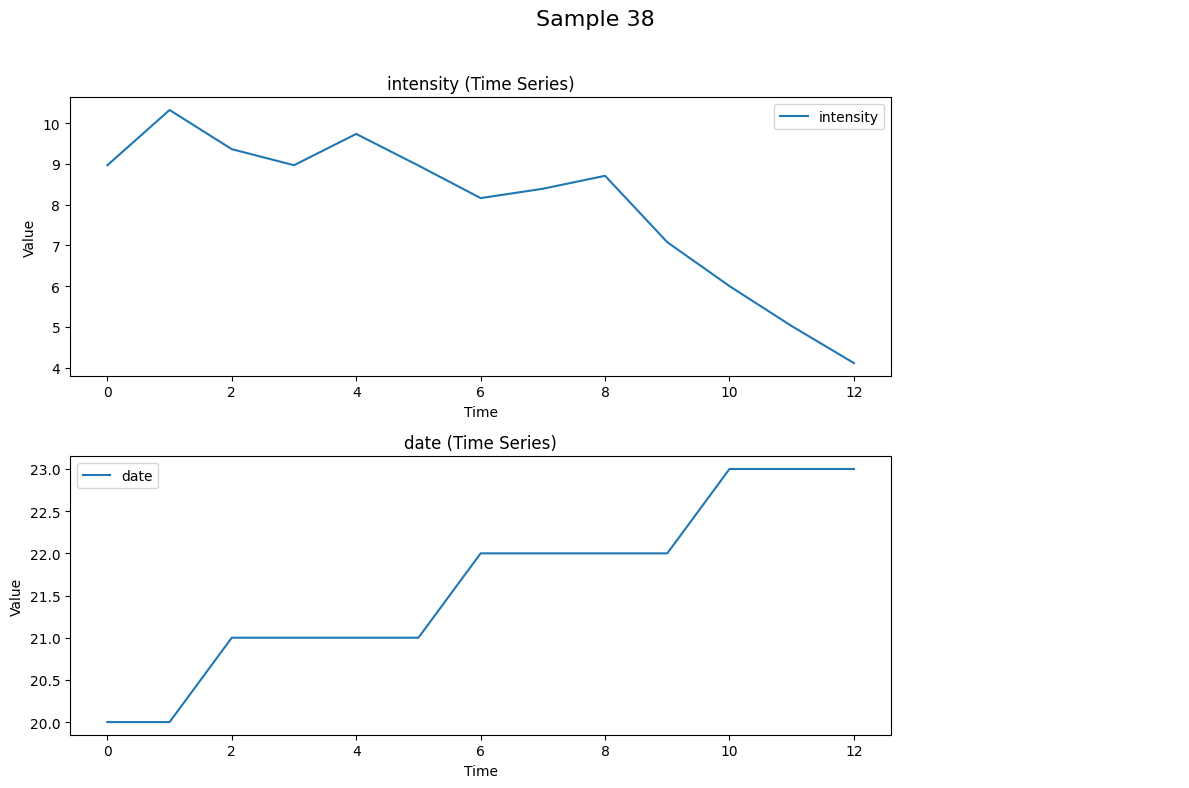


Dropped files statistics:
intensity: 0
date: 0
Year: 1990


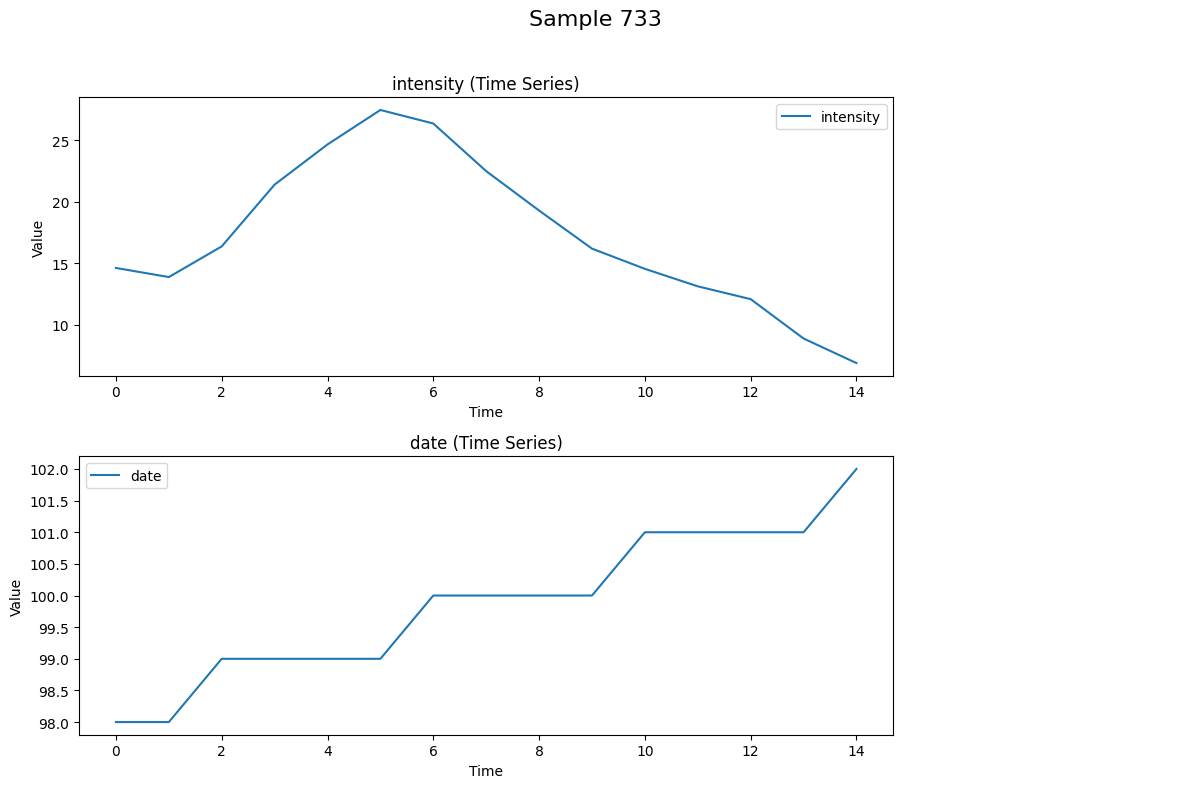


Dropped files statistics:
intensity: 0
date: 0
Year: 1991


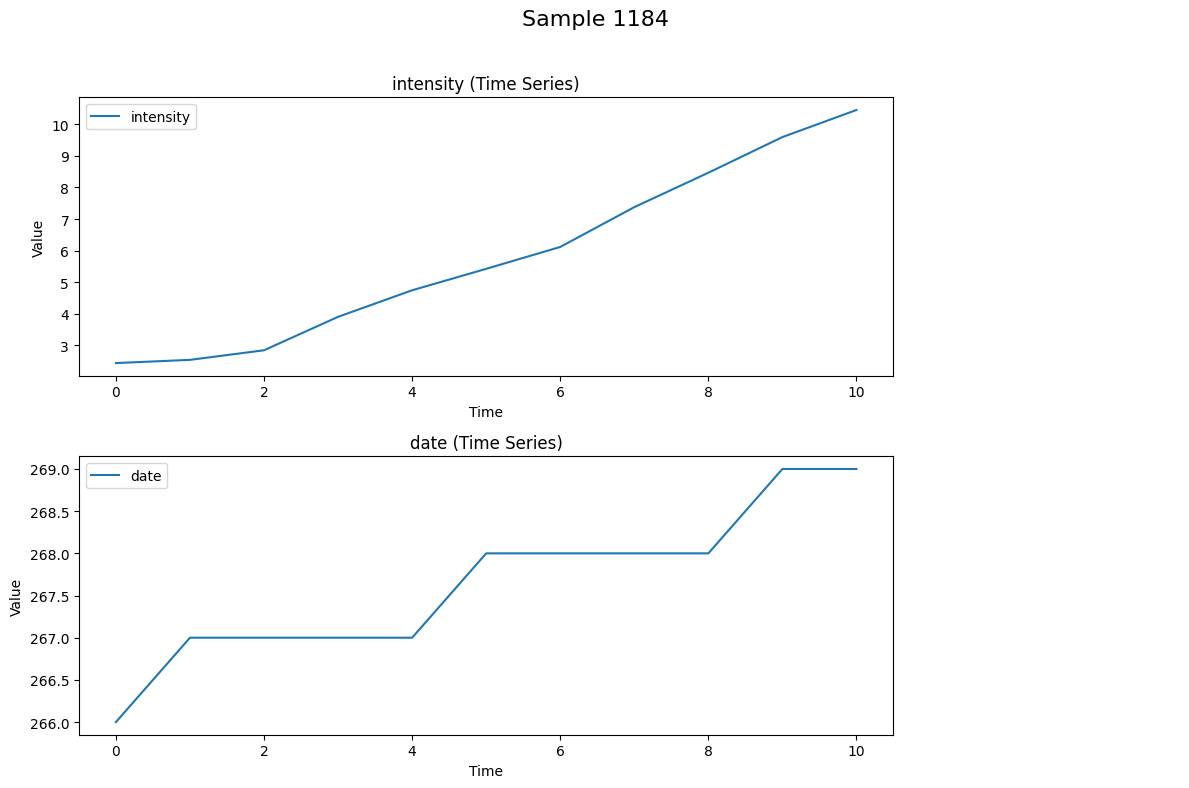


Dropped files statistics:
intensity: 0
date: 0
Year: 1992


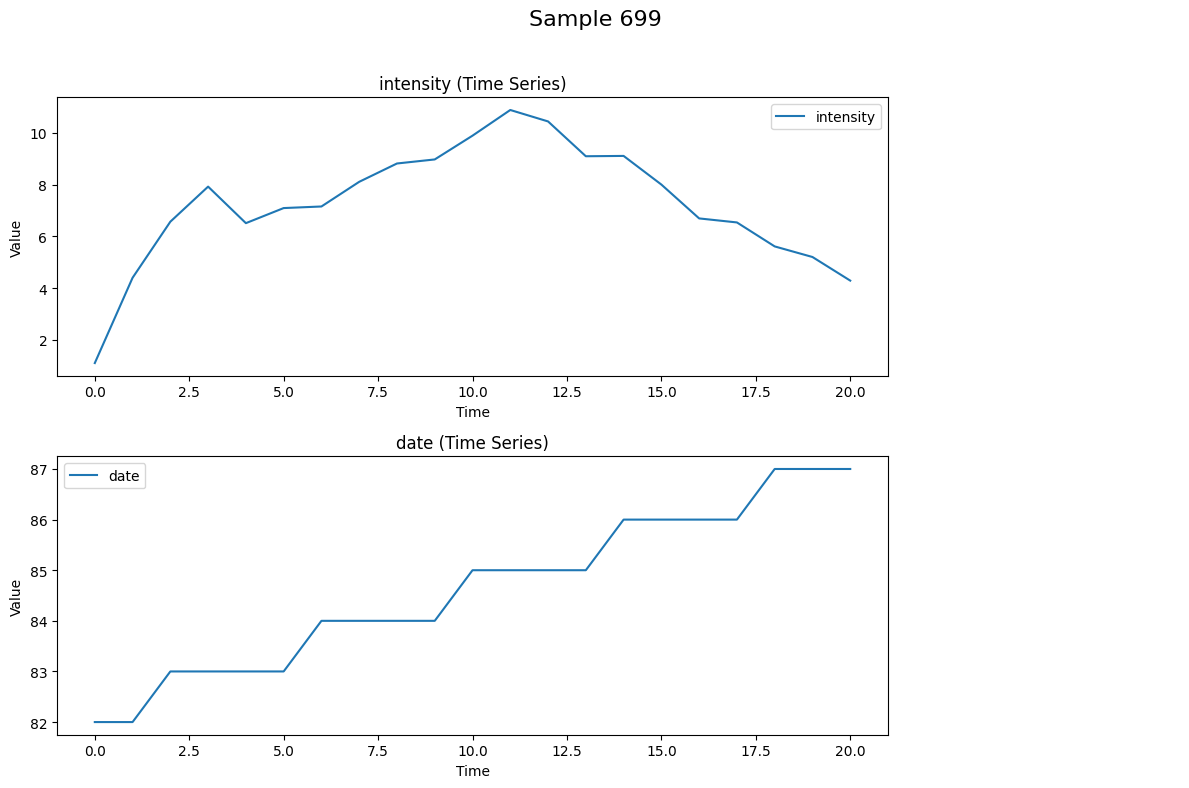


Dropped files statistics:
intensity: 0
date: 0
Year: 1993


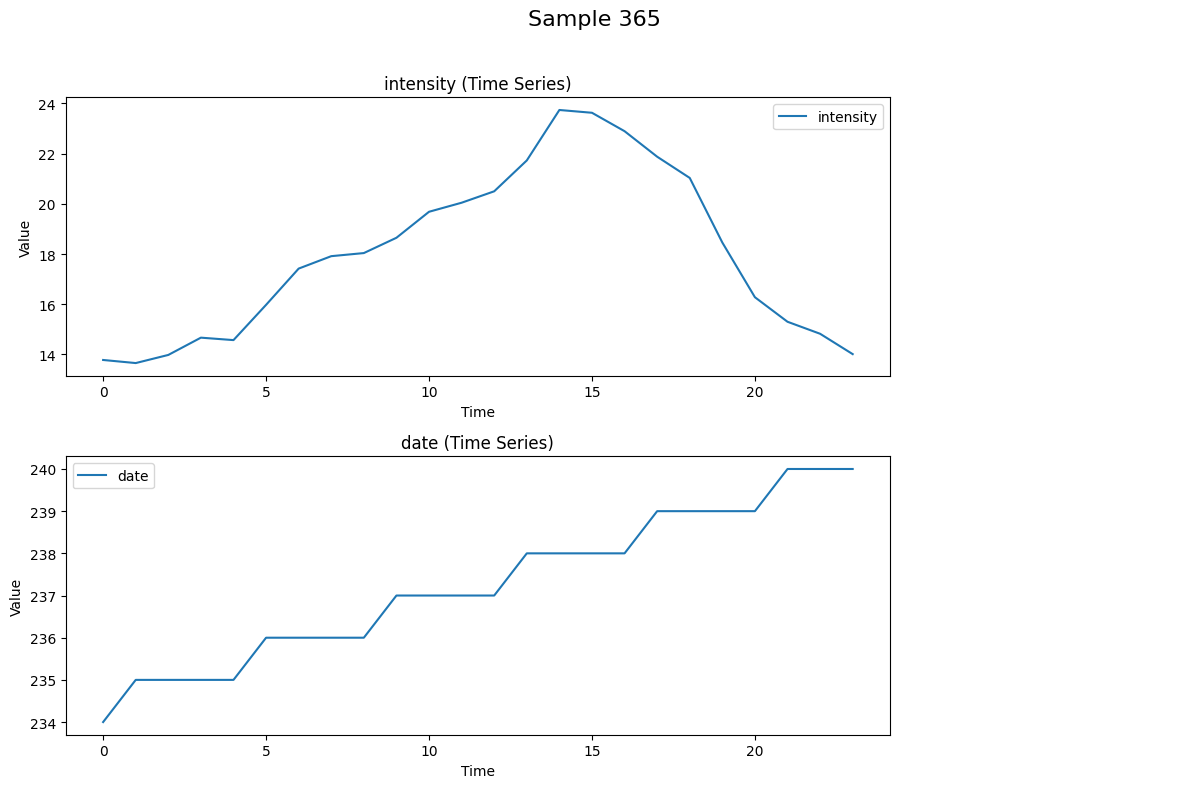


Dropped files statistics:
intensity: 0
date: 0
Year: 1994


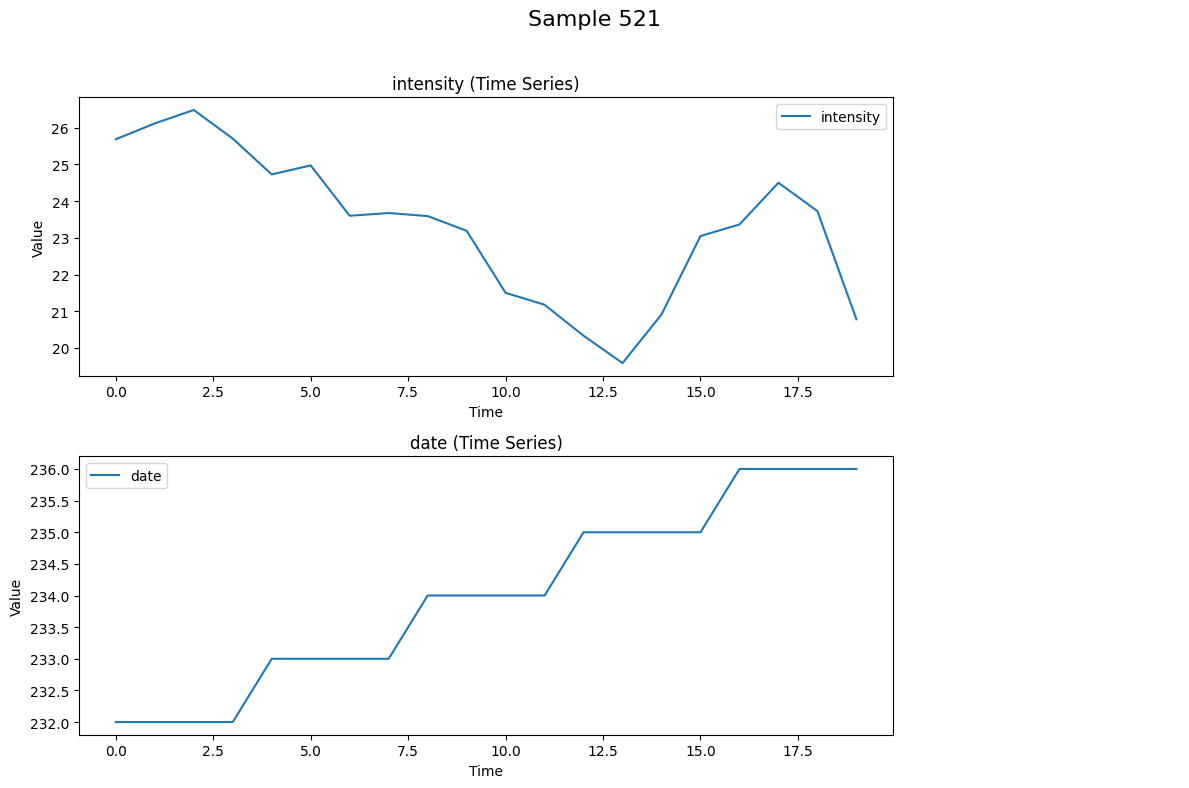


Dropped files statistics:
intensity: 0
date: 0
Year: 1995


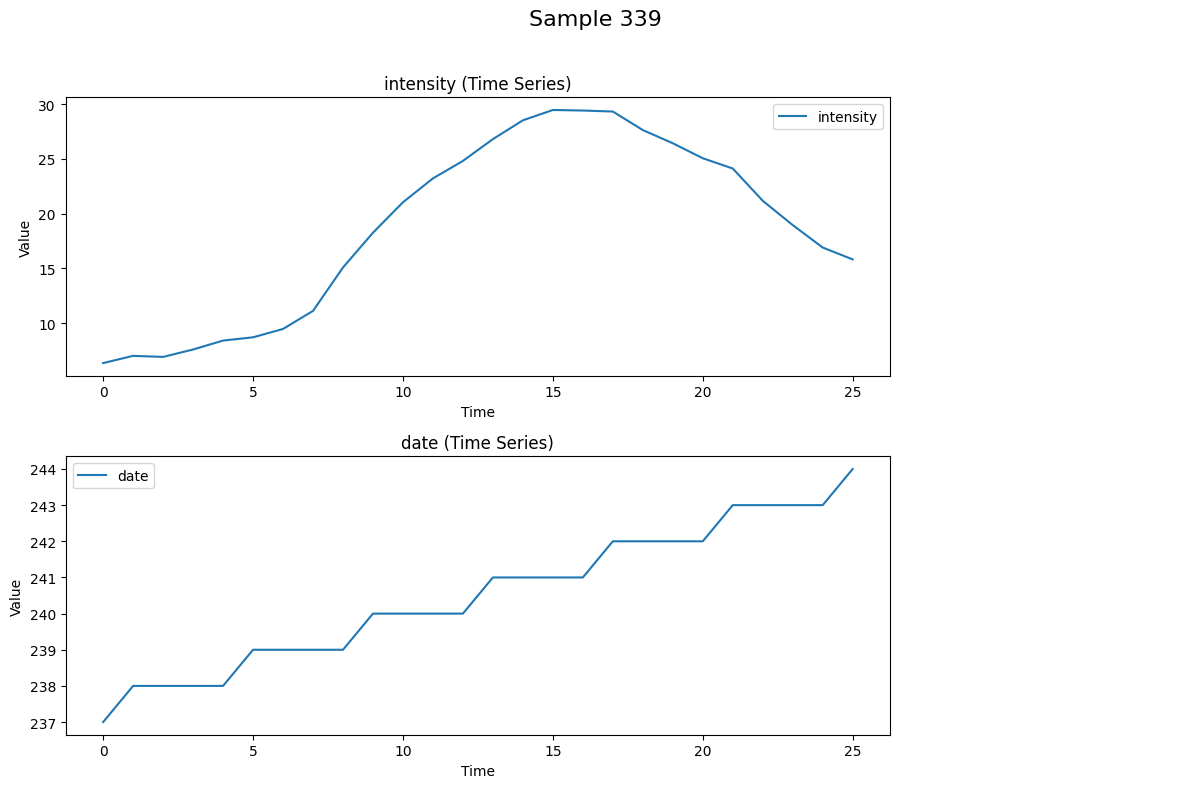


Dropped files statistics:
intensity: 0
date: 0
Year: 1996


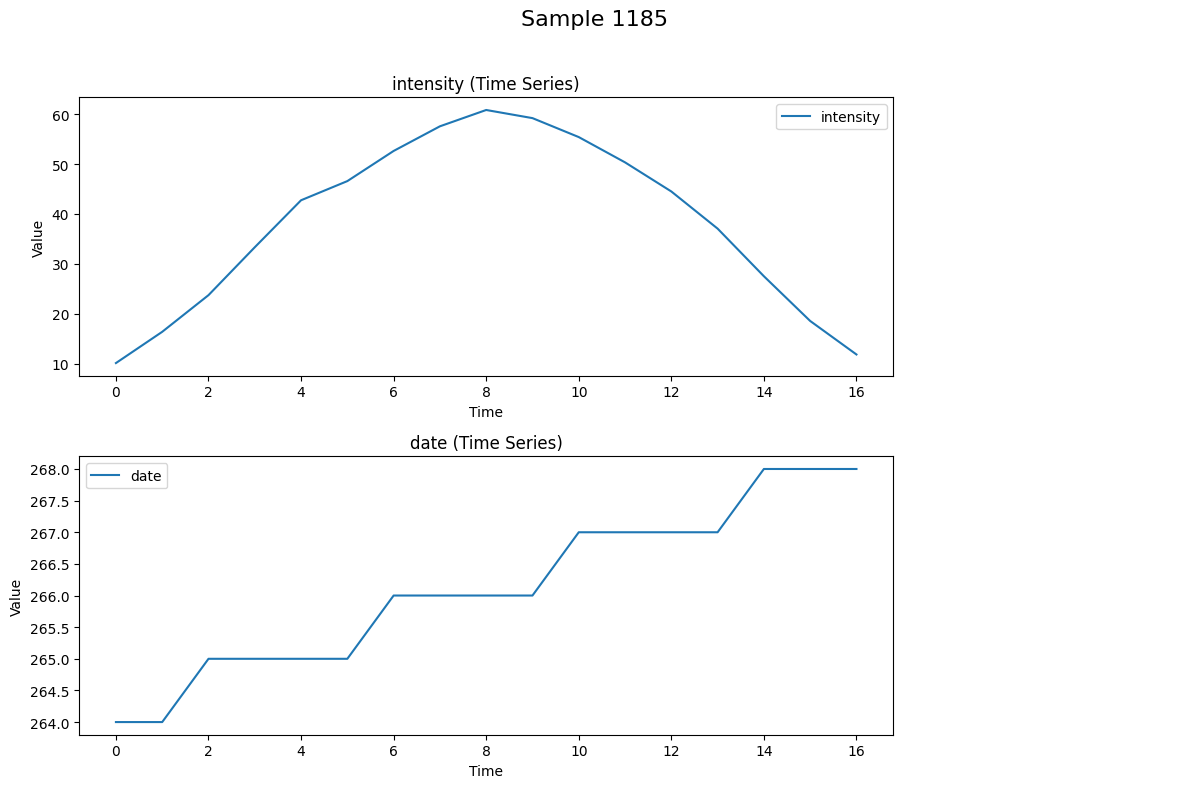


Dropped files statistics:
intensity: 0
date: 0
Year: 1997


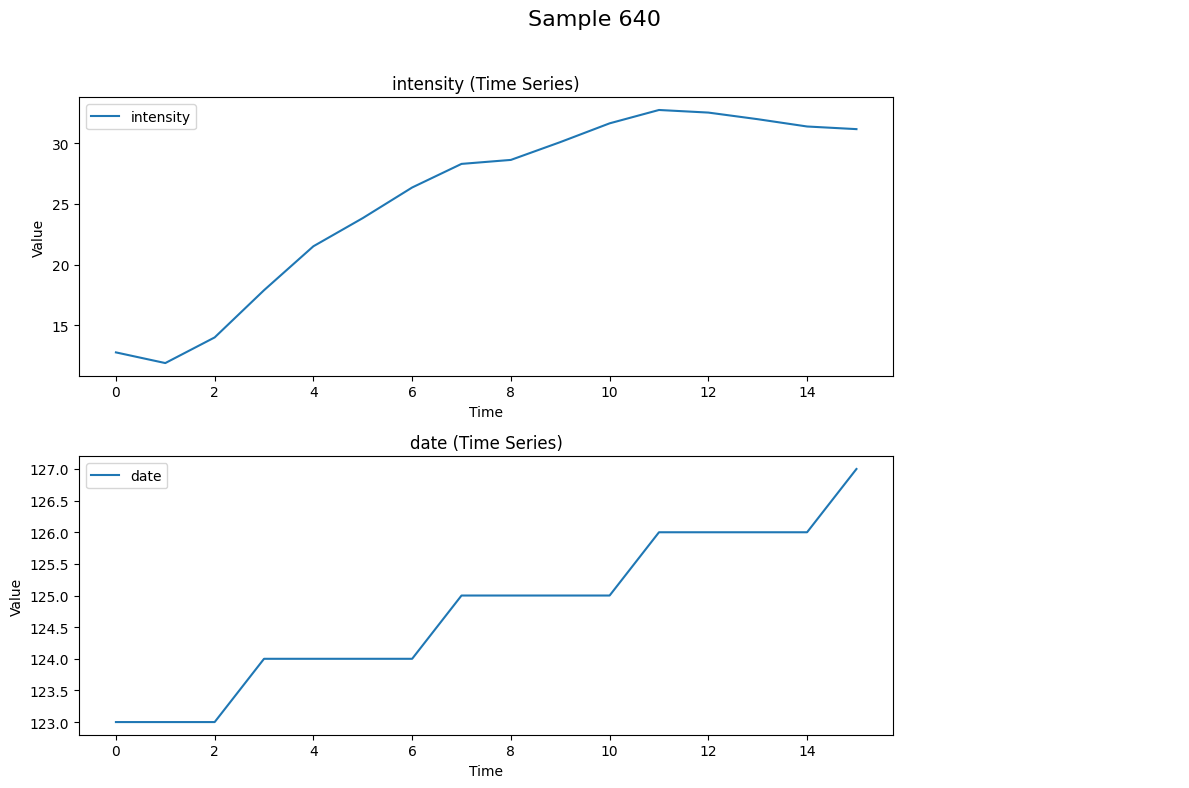


Dropped files statistics:
intensity: 0
date: 0
Year: 1998


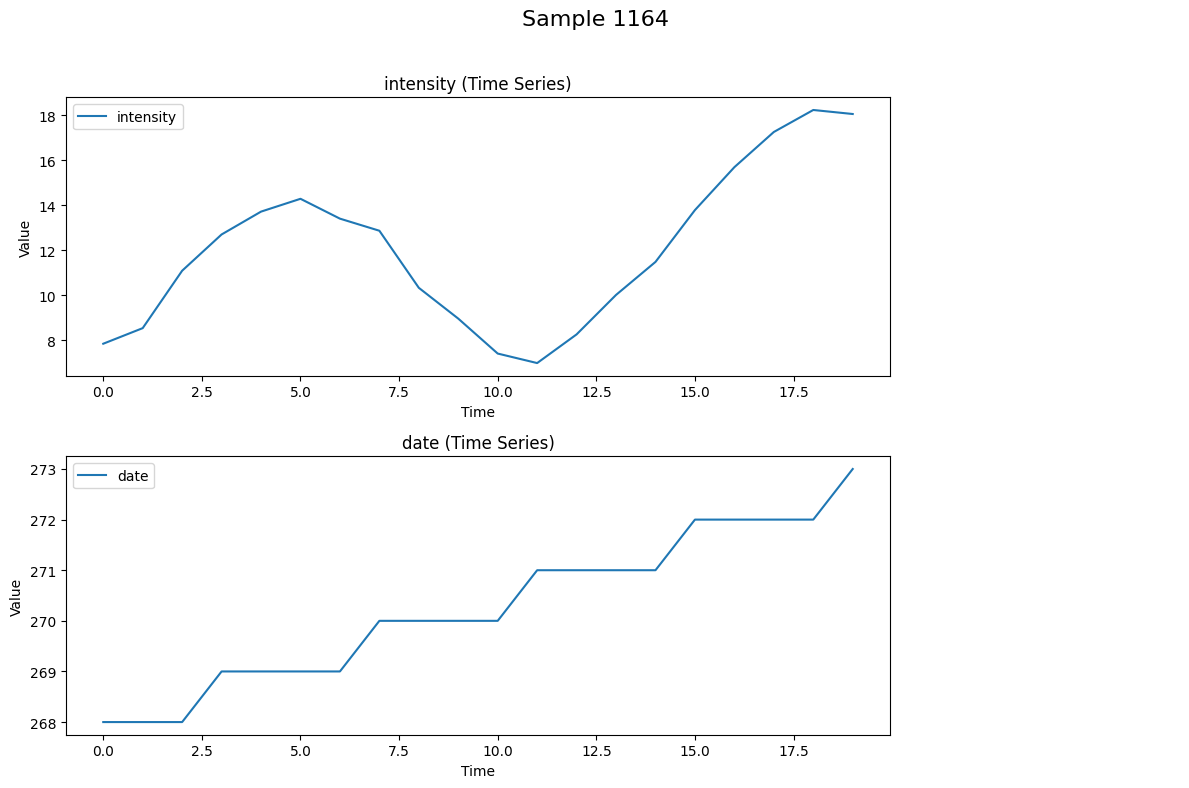


Dropped files statistics:
intensity: 0
date: 0
Year: 1999


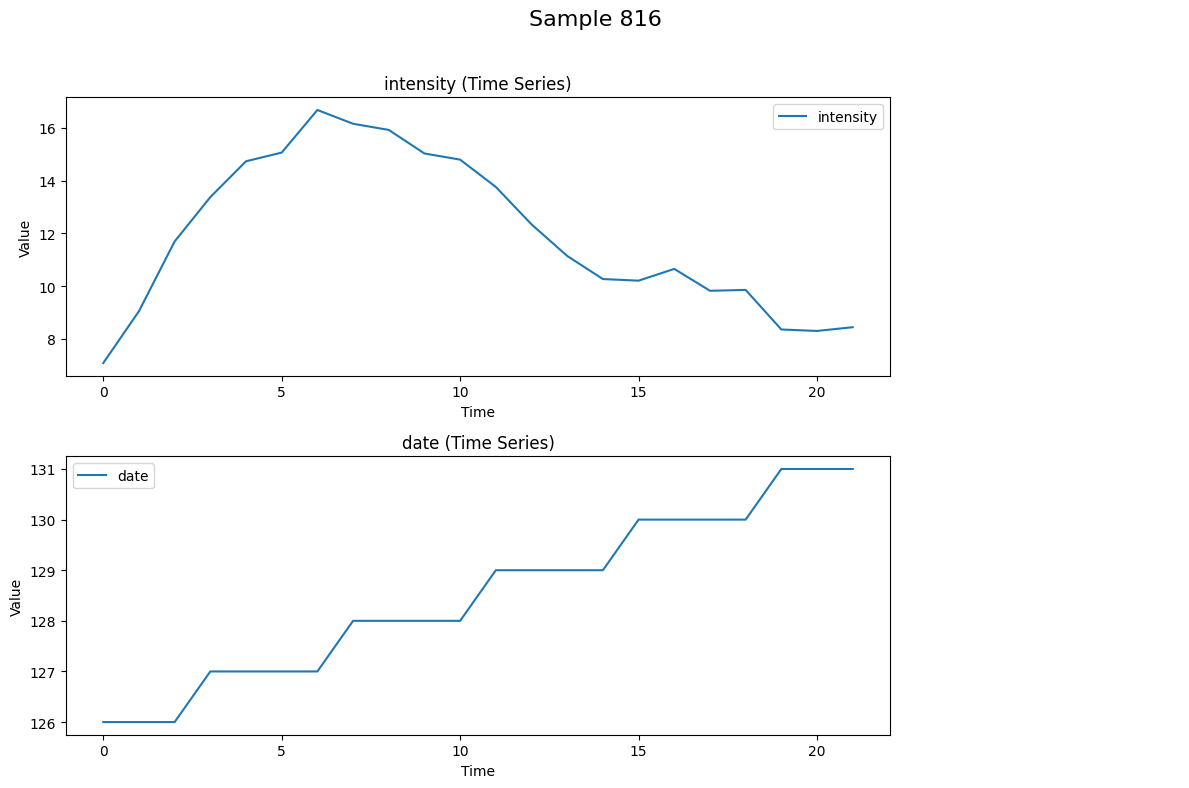


Dropped files statistics:
intensity: 0
date: 0
Year: 2000


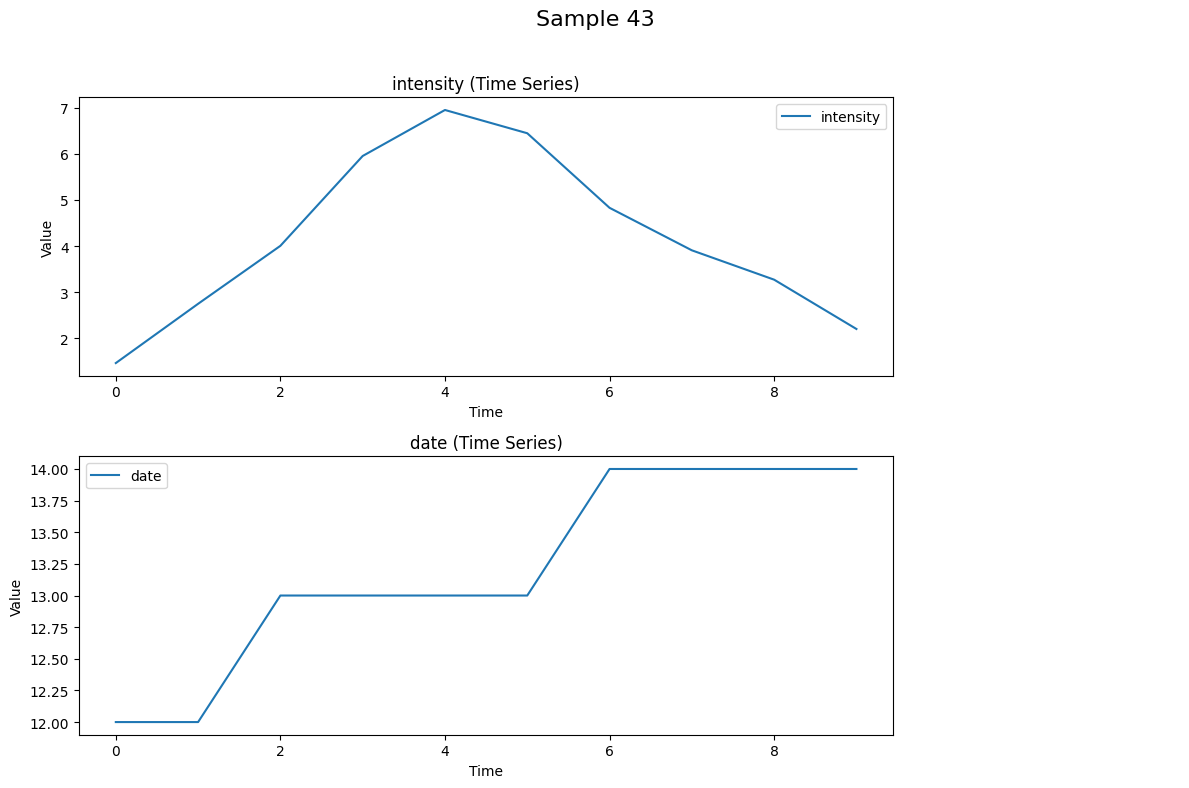


Dropped files statistics:
intensity: 0
date: 0
Year: 2001


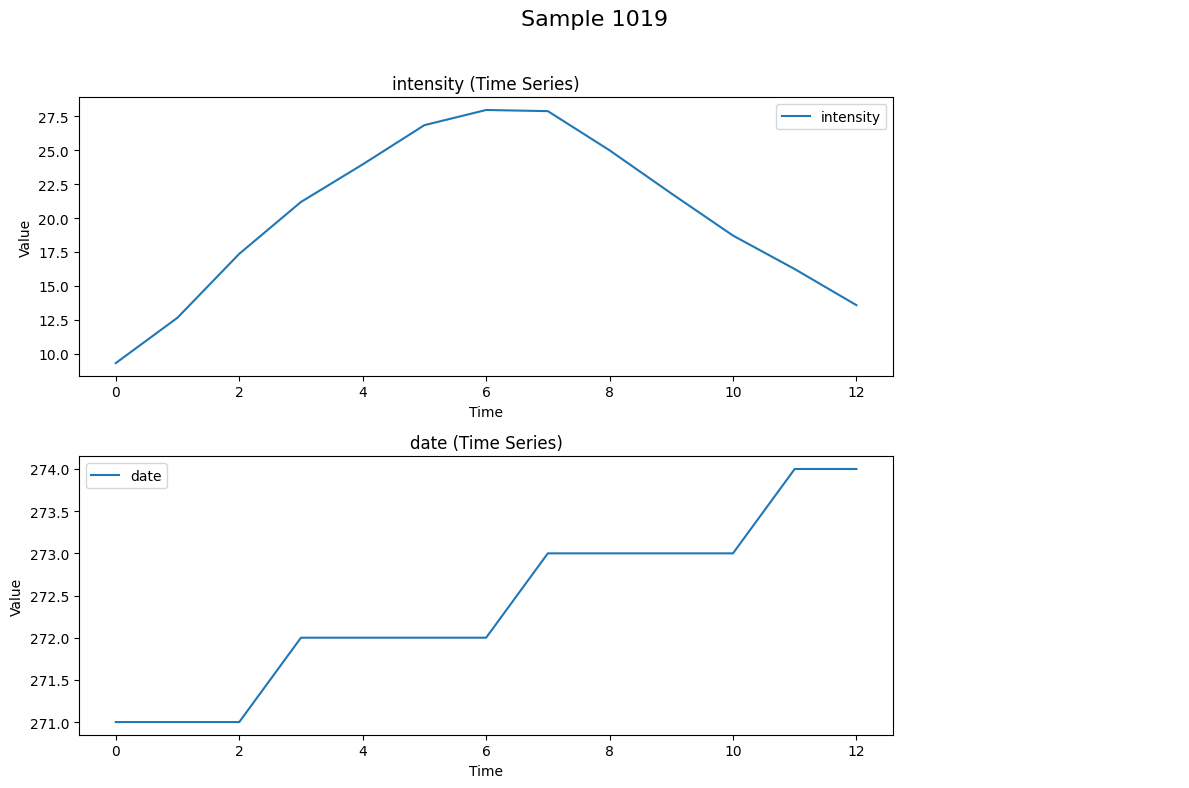


Dropped files statistics:
intensity: 0
date: 0
Year: 2002


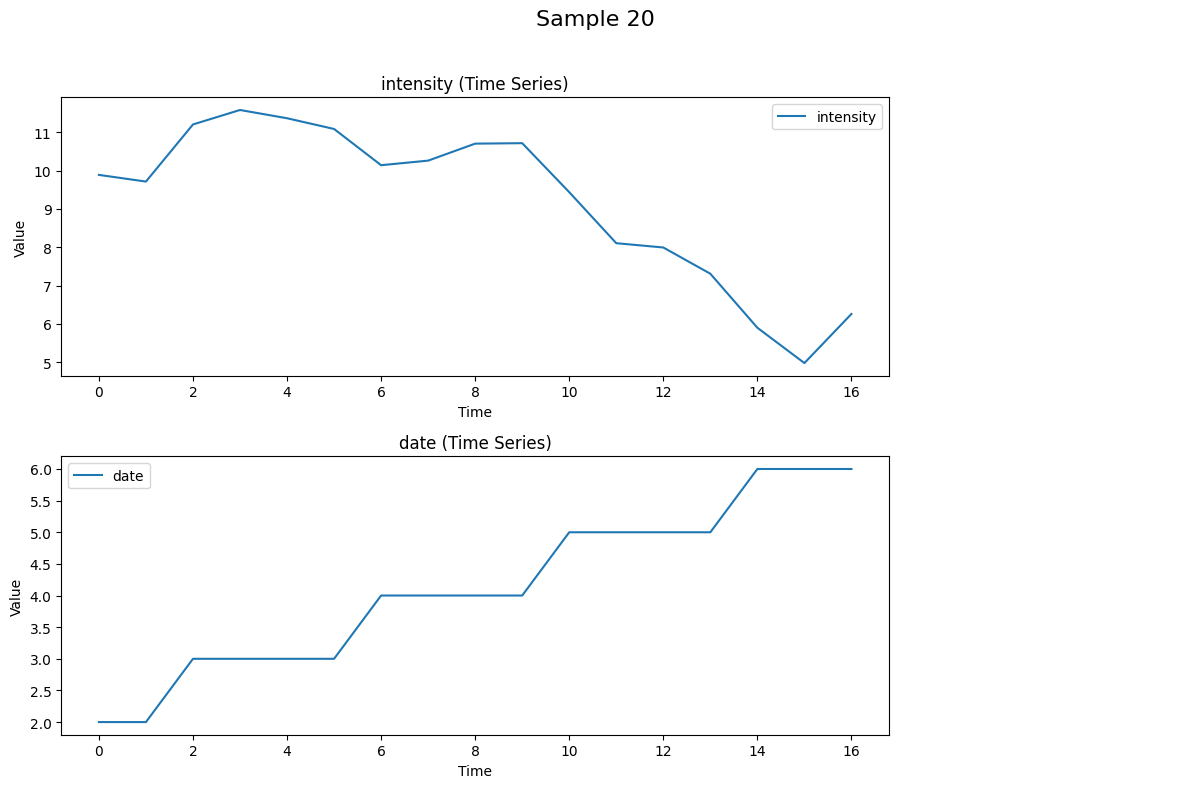


Dropped files statistics:
intensity: 0
date: 0
Year: 2003


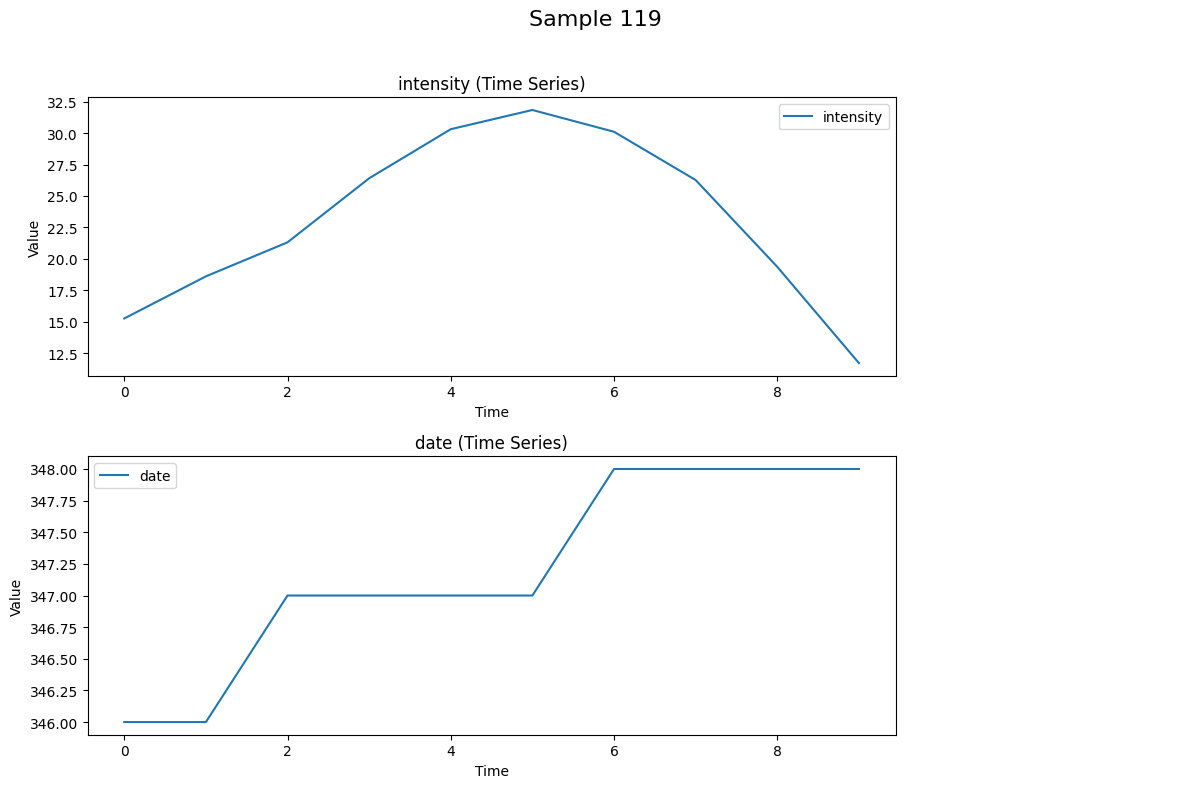


Dropped files statistics:
intensity: 0
date: 0
Year: 2004


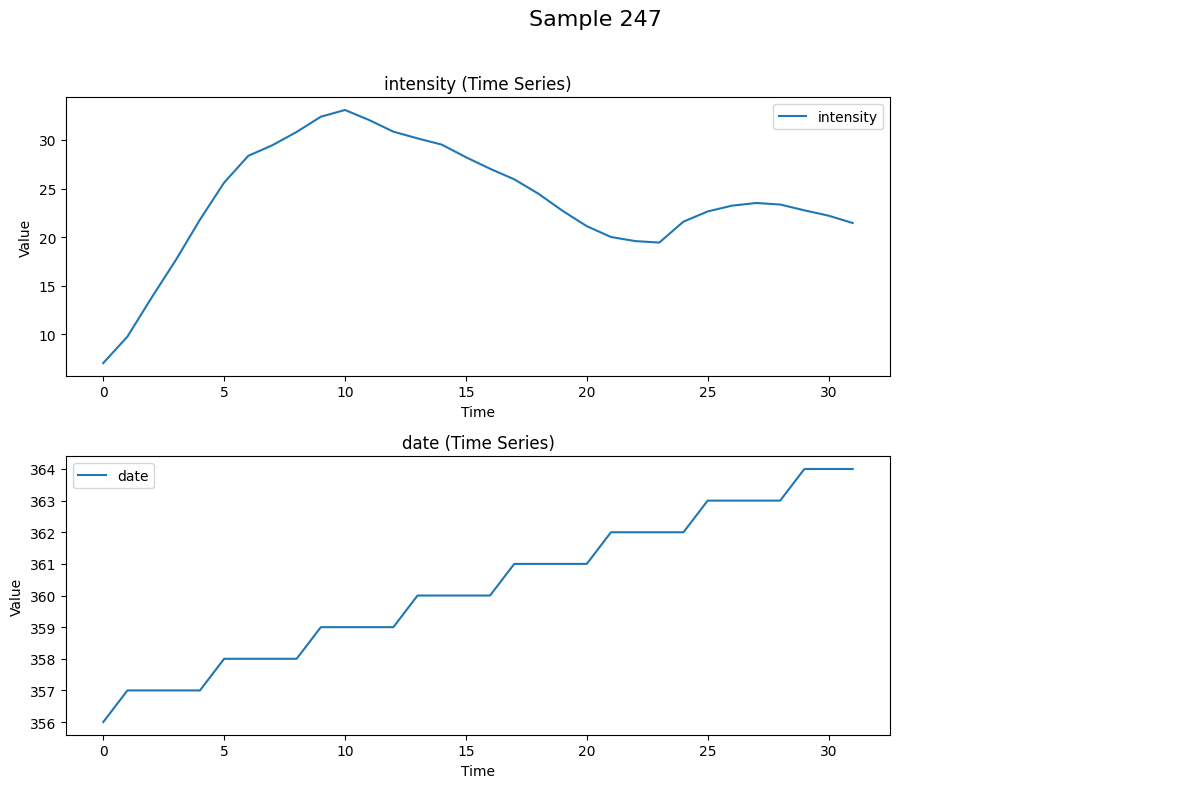


Dropped files statistics:
intensity: 0
date: 0
Year: 2005


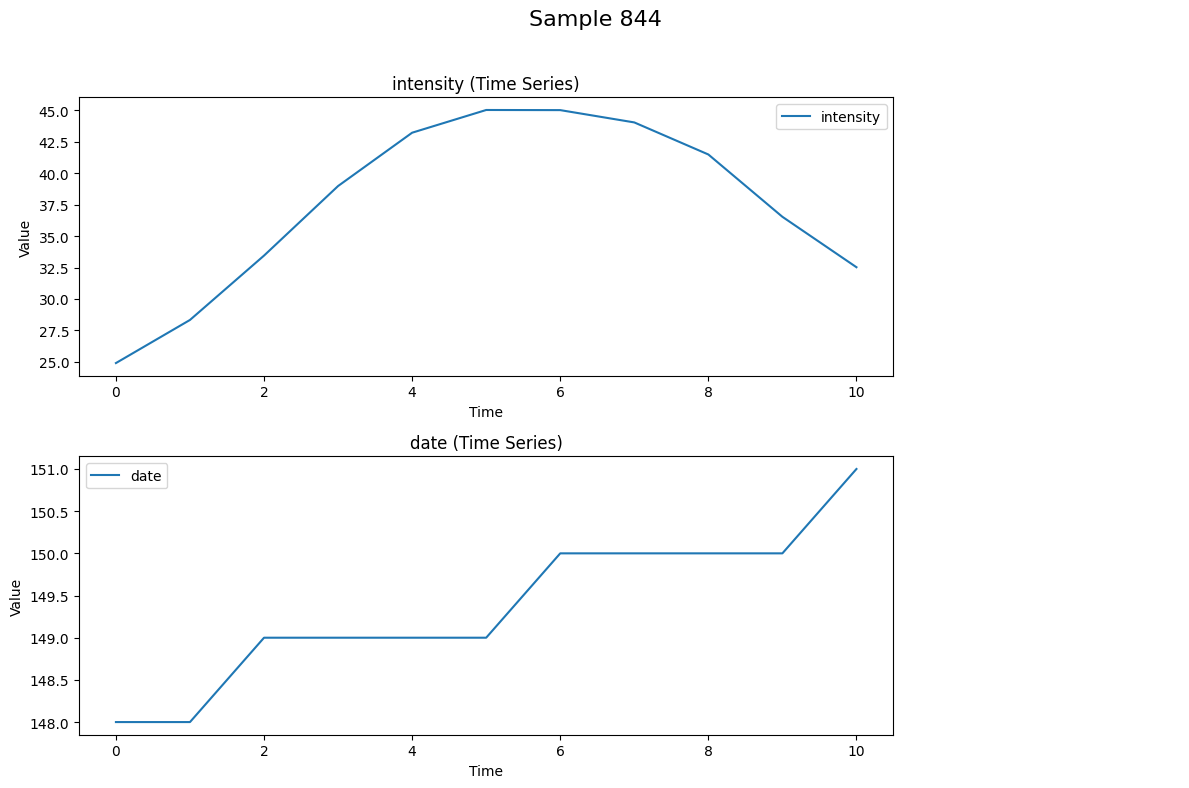


Dropped files statistics:
intensity: 0
date: 0
Year: 2006


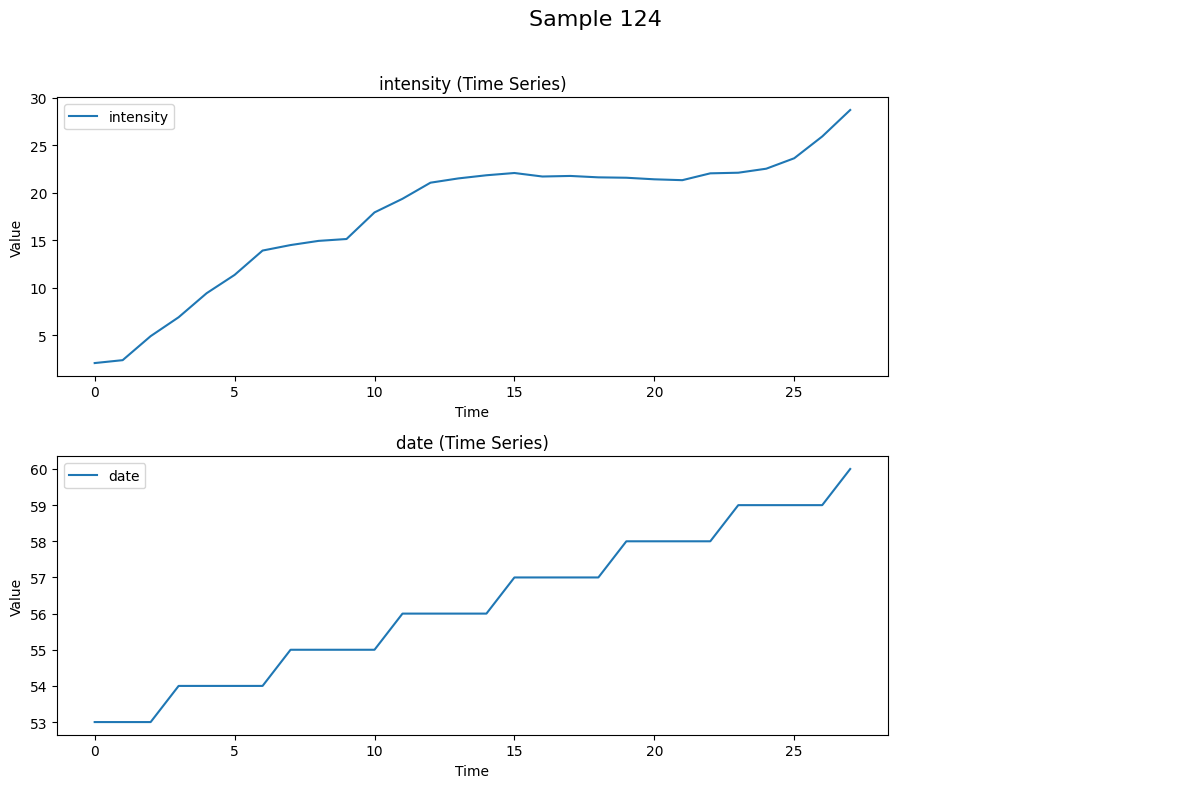


Dropped files statistics:
intensity: 0
date: 0
Year: 2007


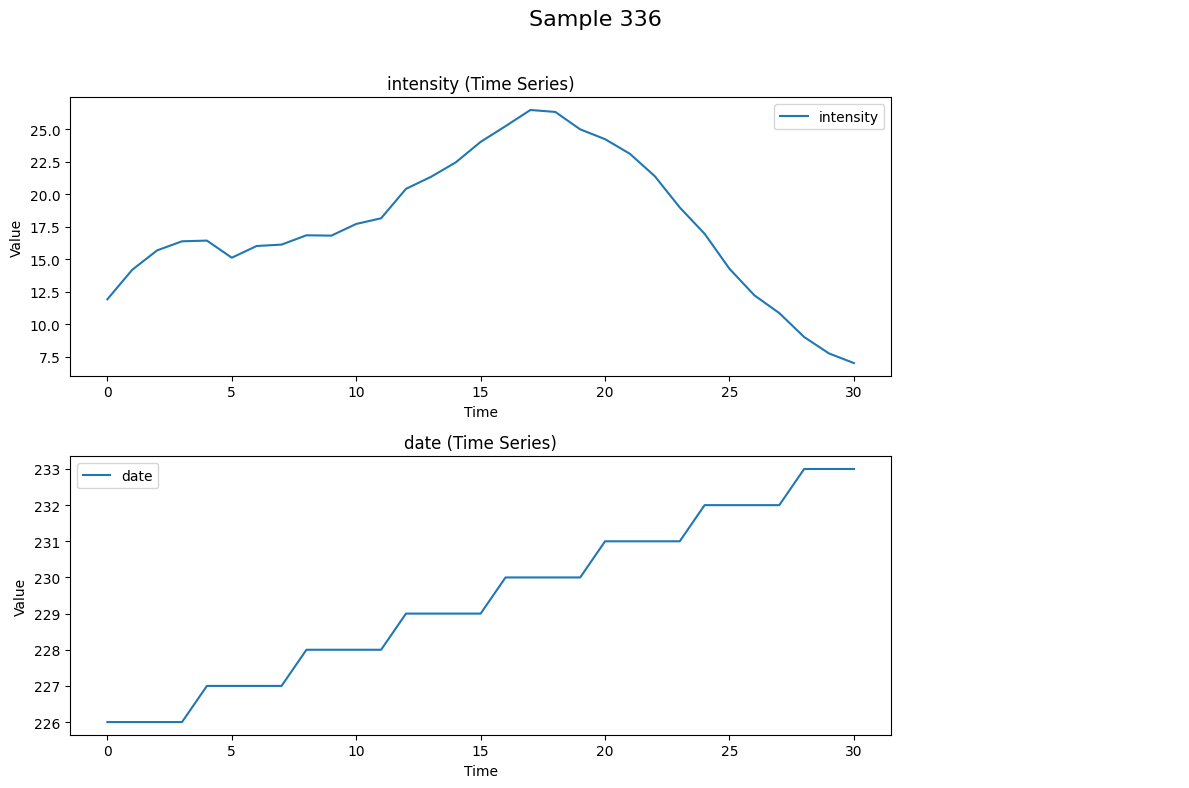


Dropped files statistics:
intensity: 0
date: 0
Year: 2008


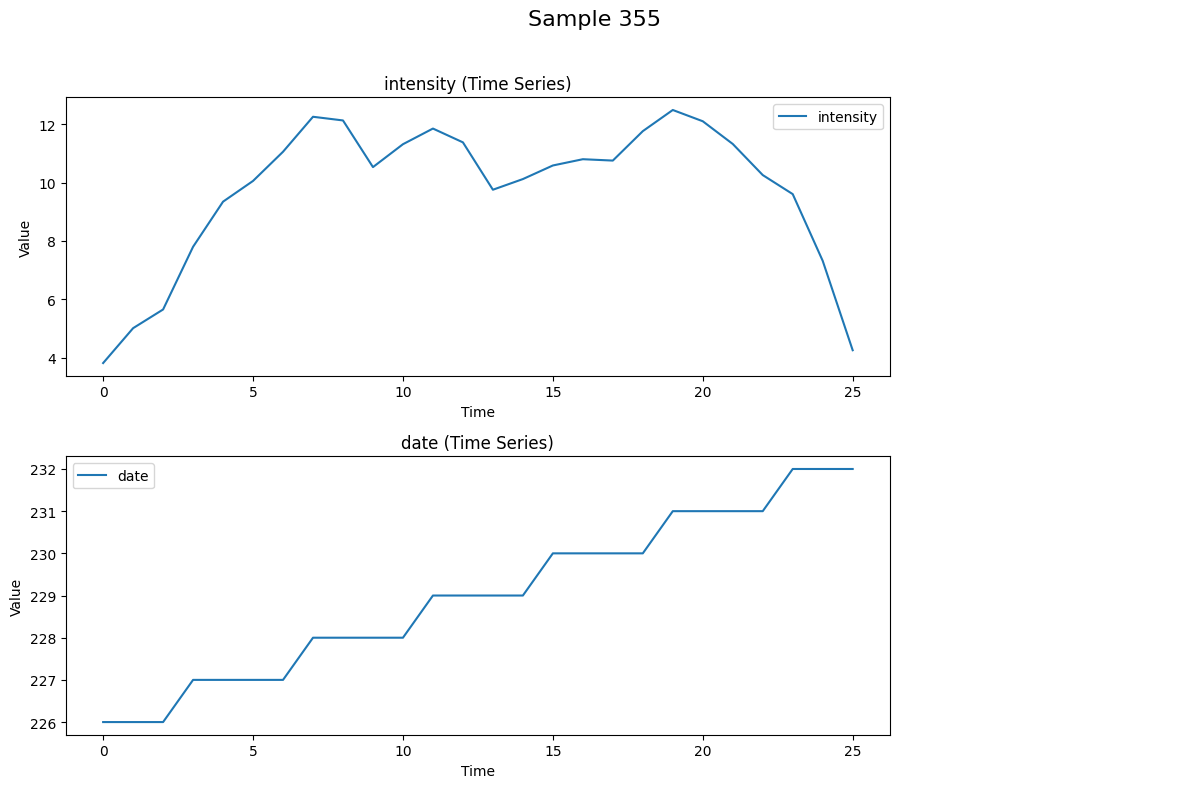


Dropped files statistics:
intensity: 0
date: 0
Year: 2009


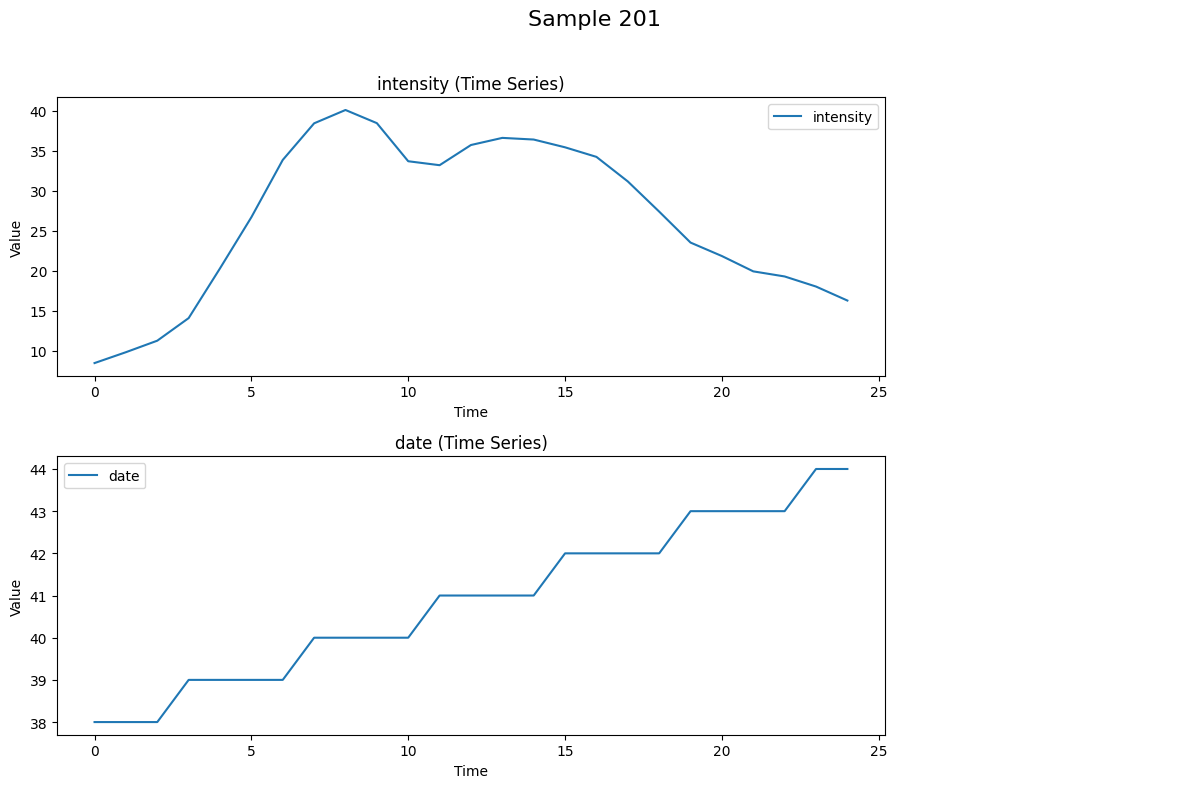


Dropped files statistics:
intensity: 0
date: 0
Year: 2010


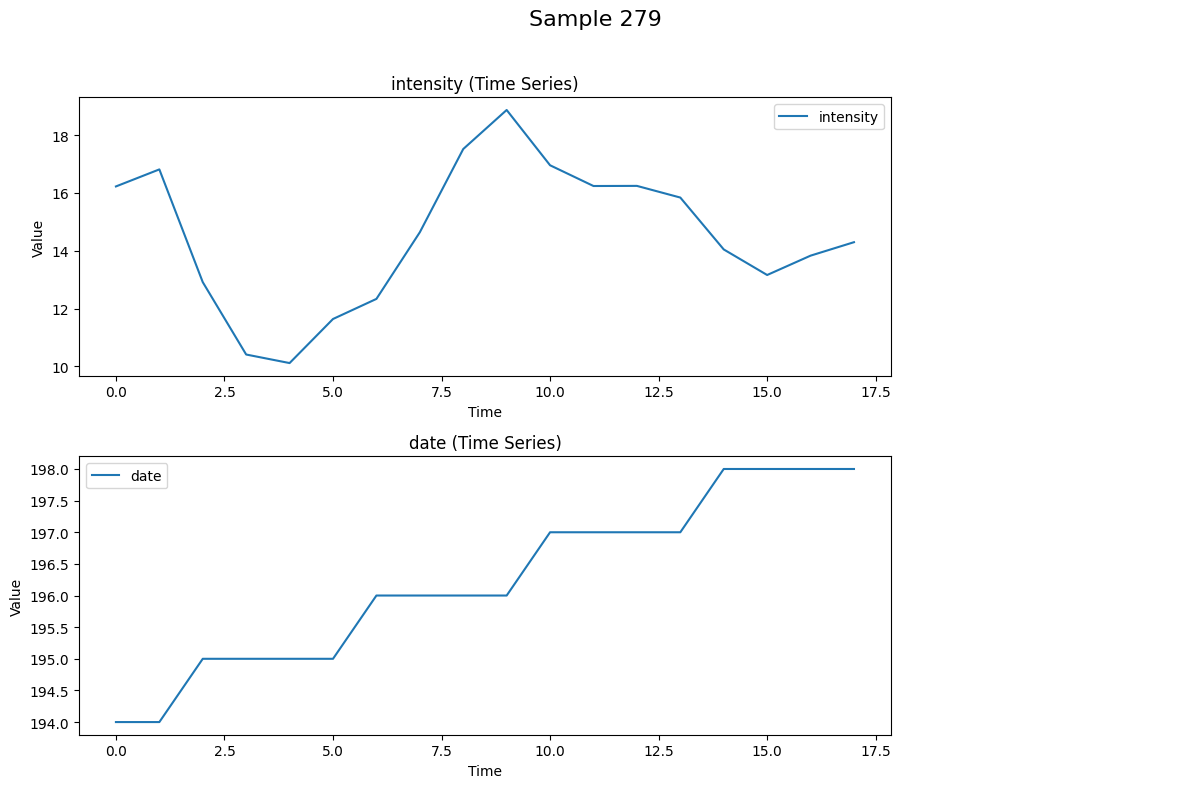


Dropped files statistics:
intensity: 0
date: 0
Year: 2011


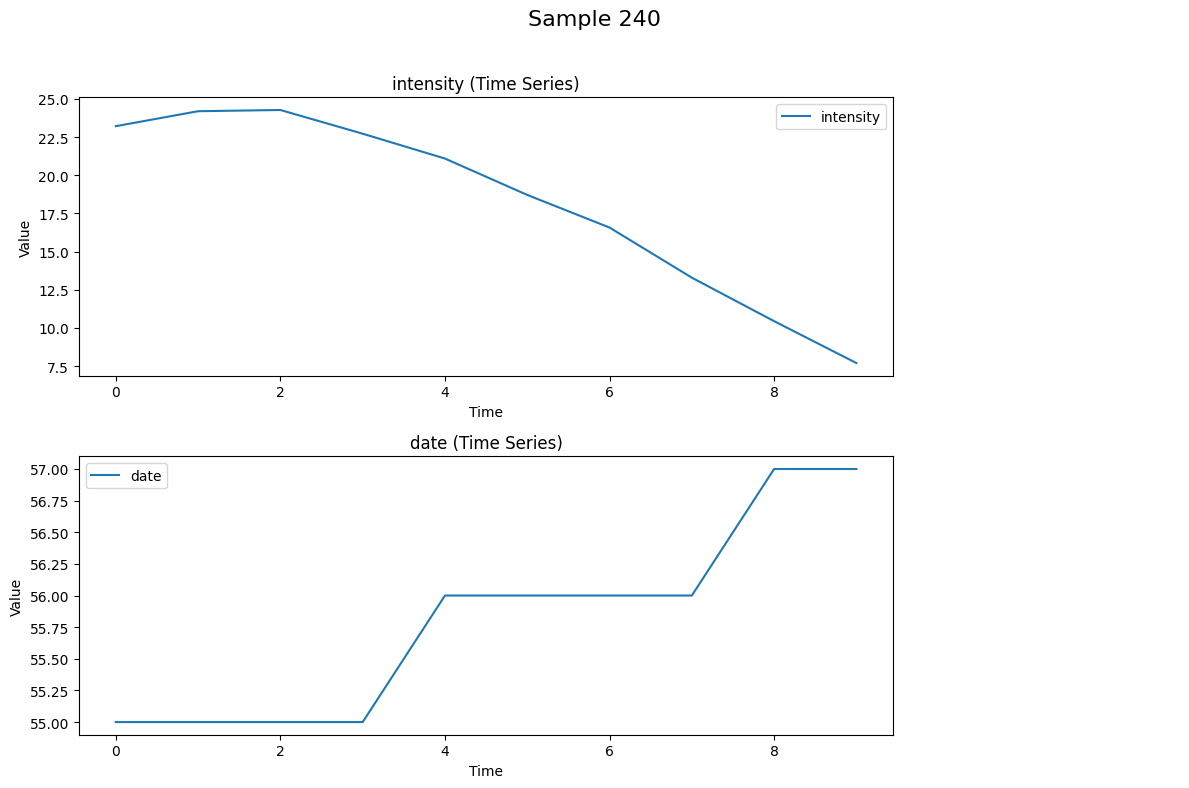


Dropped files statistics:
intensity: 0
date: 0
Year: 2012


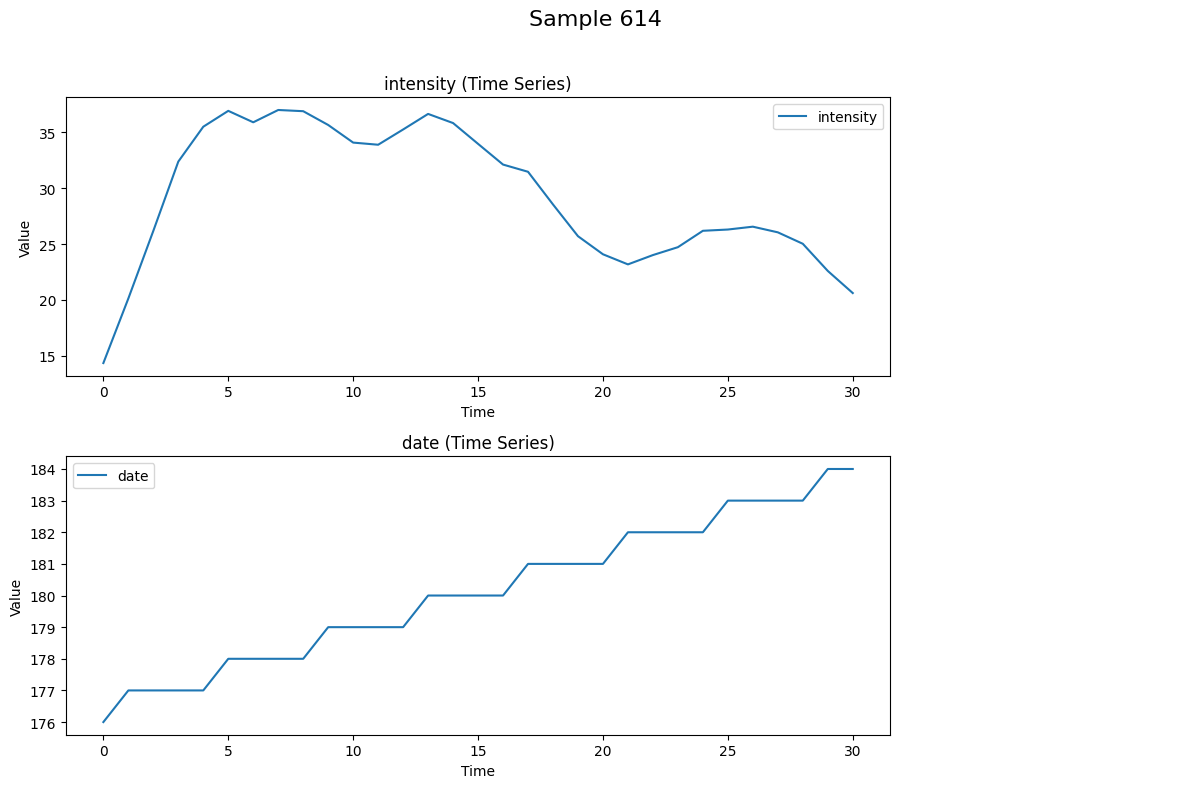


Dropped files statistics:
intensity: 0
date: 0
Year: 2013


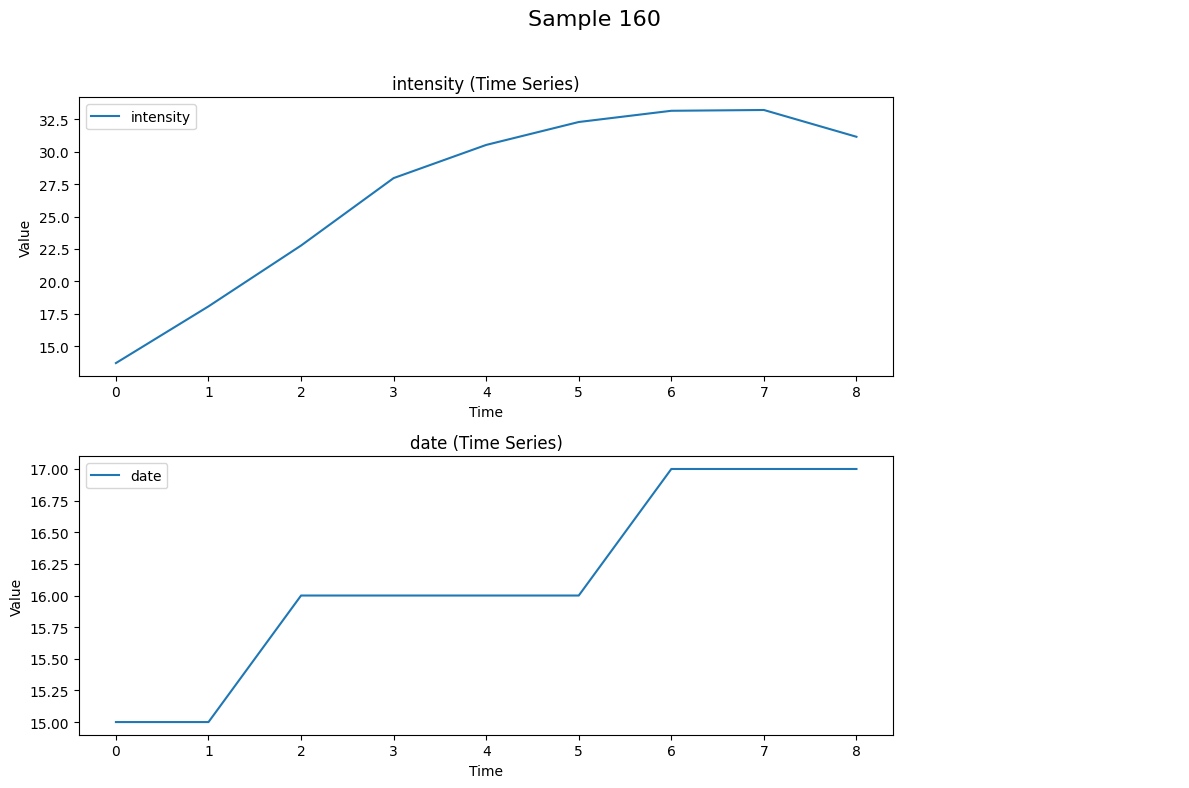


Dropped files statistics:
intensity: 0
date: 0
Year: 2014


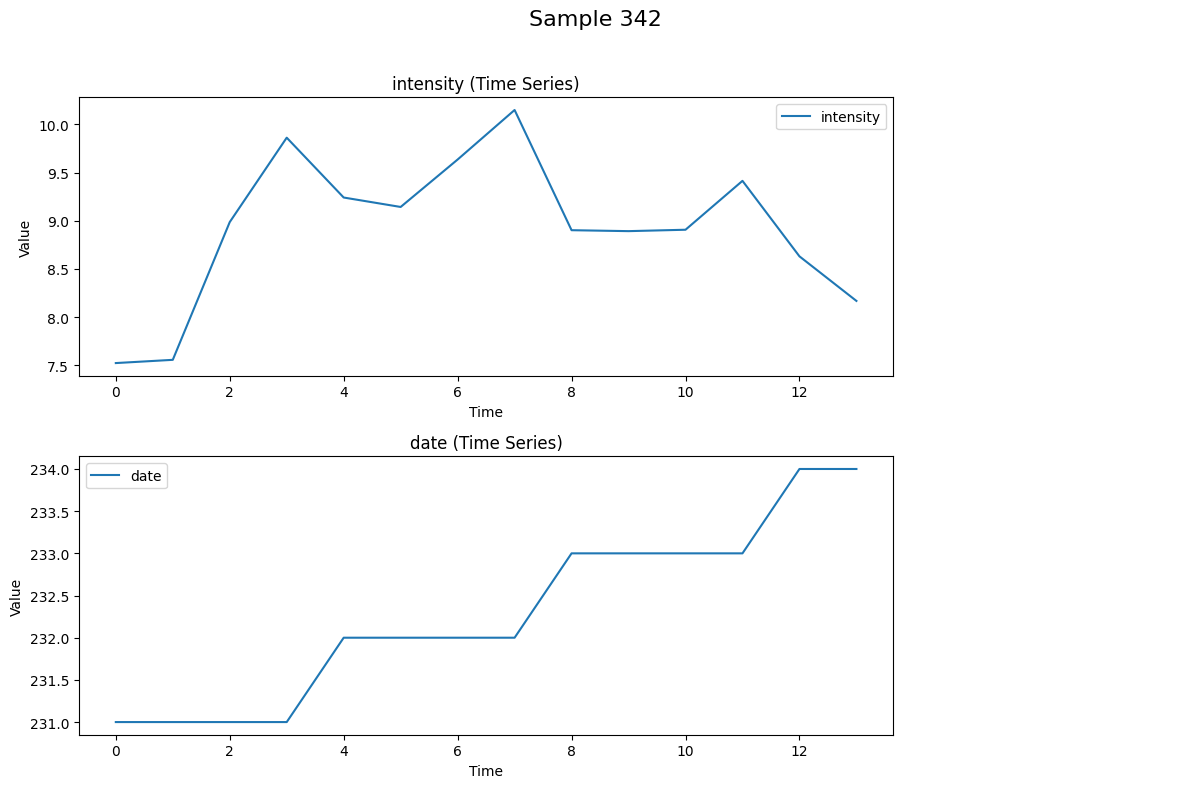


Dropped files statistics:
intensity: 0
date: 0
Year: 2015


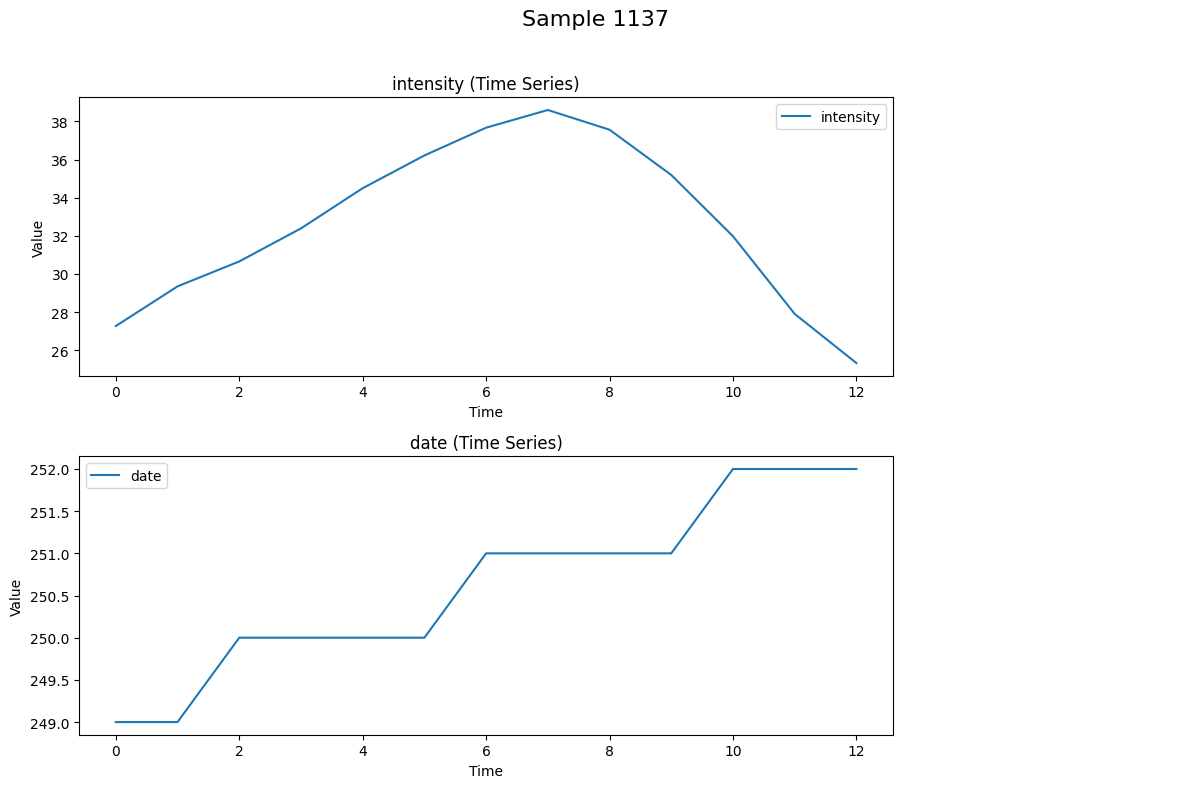


Dropped files statistics:
intensity: 0
date: 0
Year: 2016


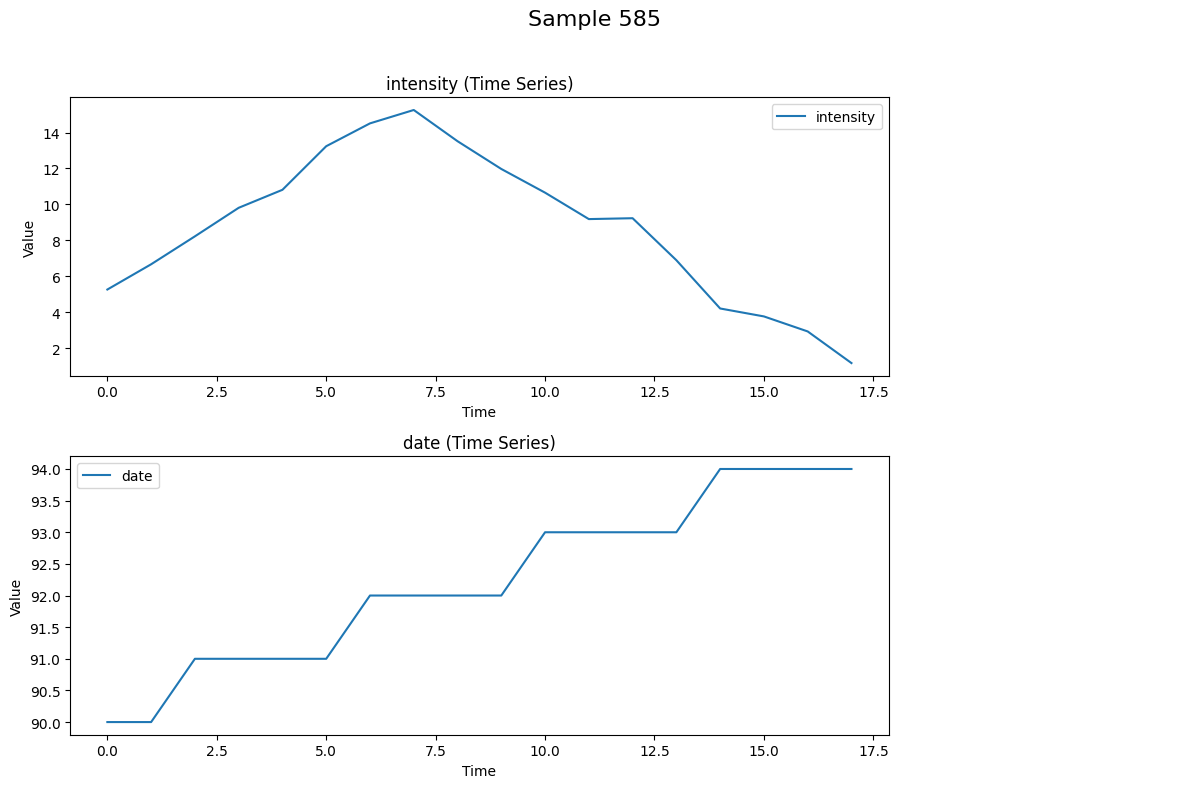


Dropped files statistics:
intensity: 0
date: 0
Year: 2017


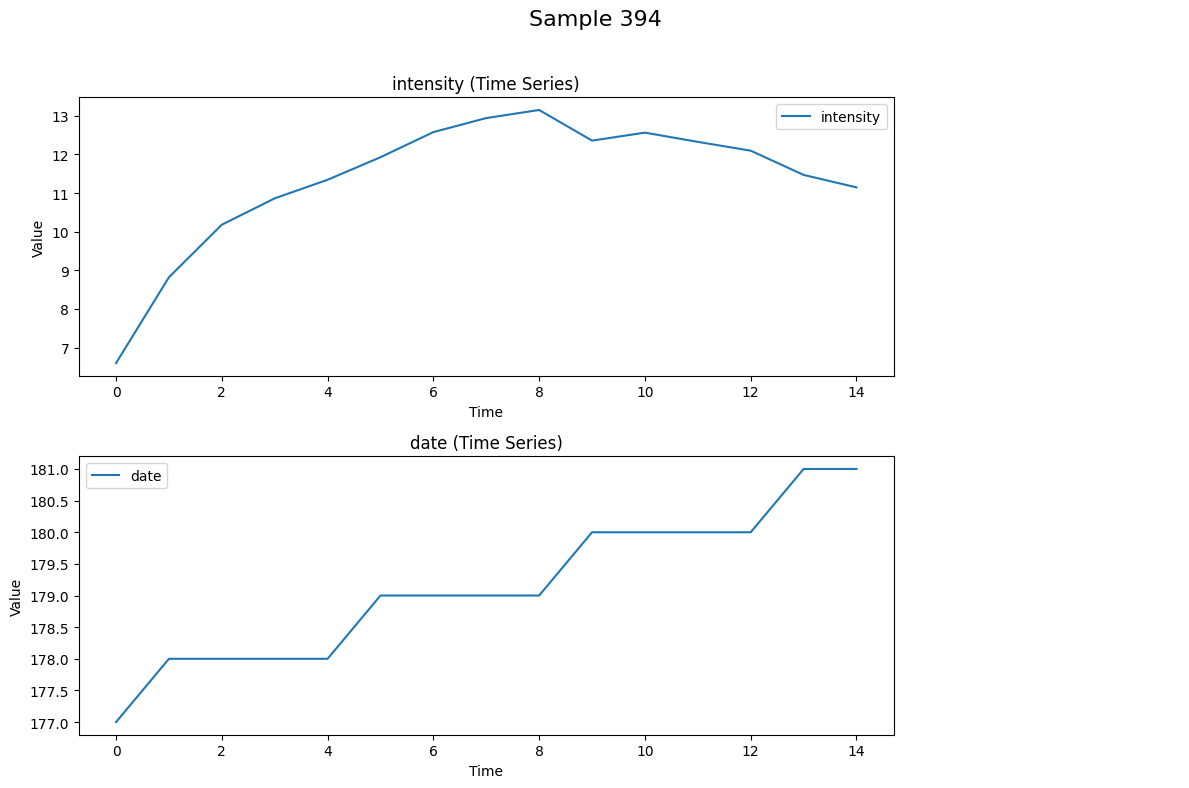


Dropped files statistics:
intensity: 0
date: 0
Year: 2018


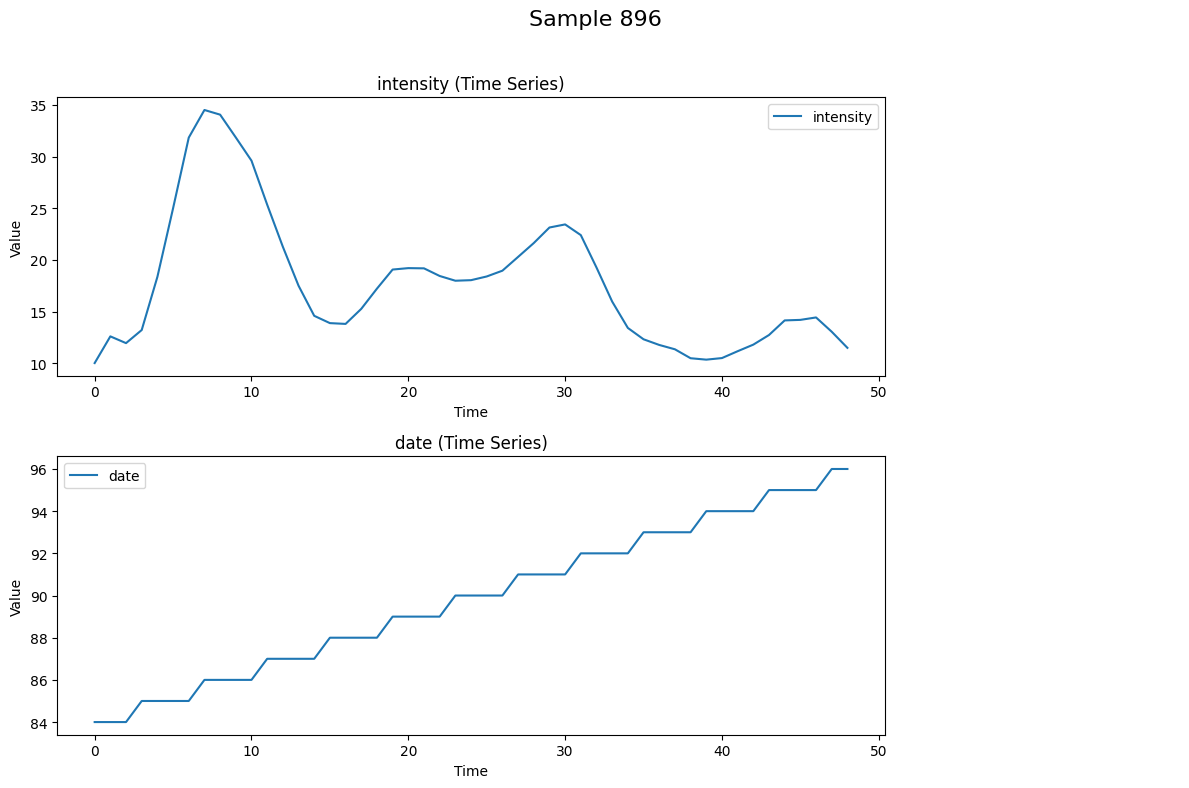


Dropped files statistics:
intensity: 0
date: 0
Year: 2019


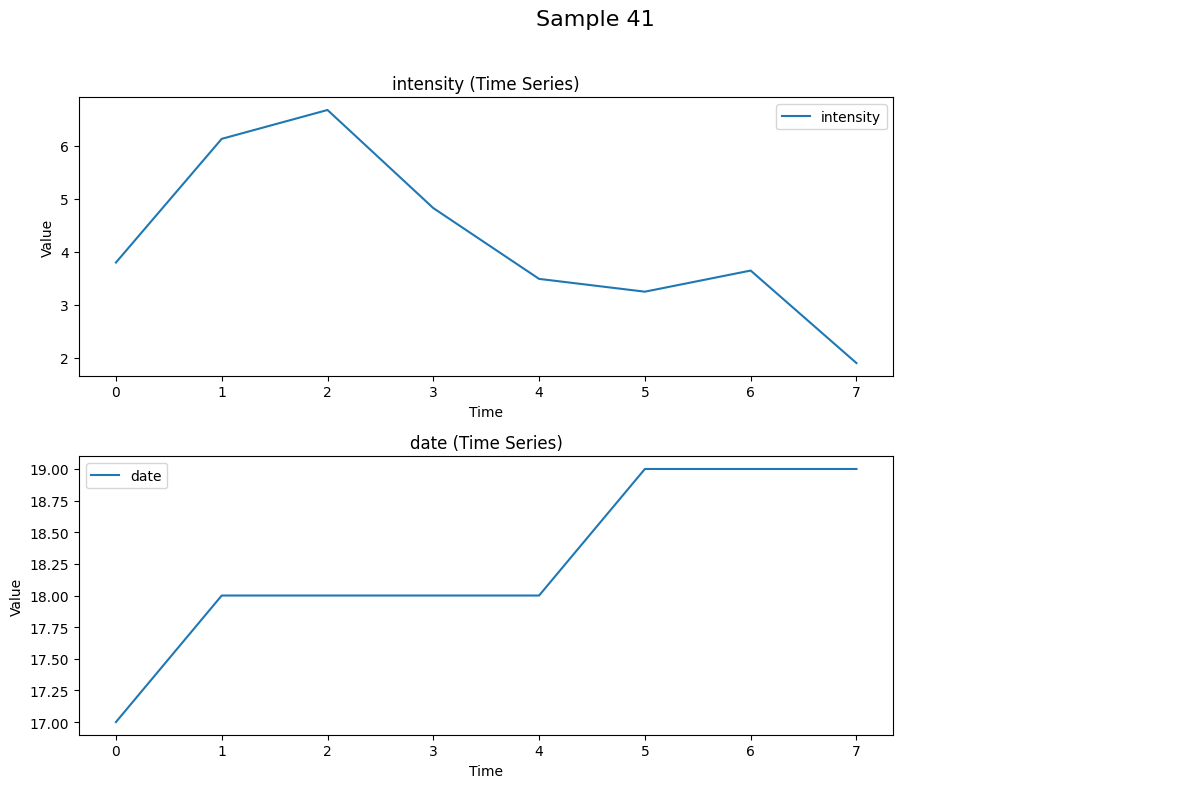


Dropped files statistics:
intensity: 0
date: 0
Year: 2020


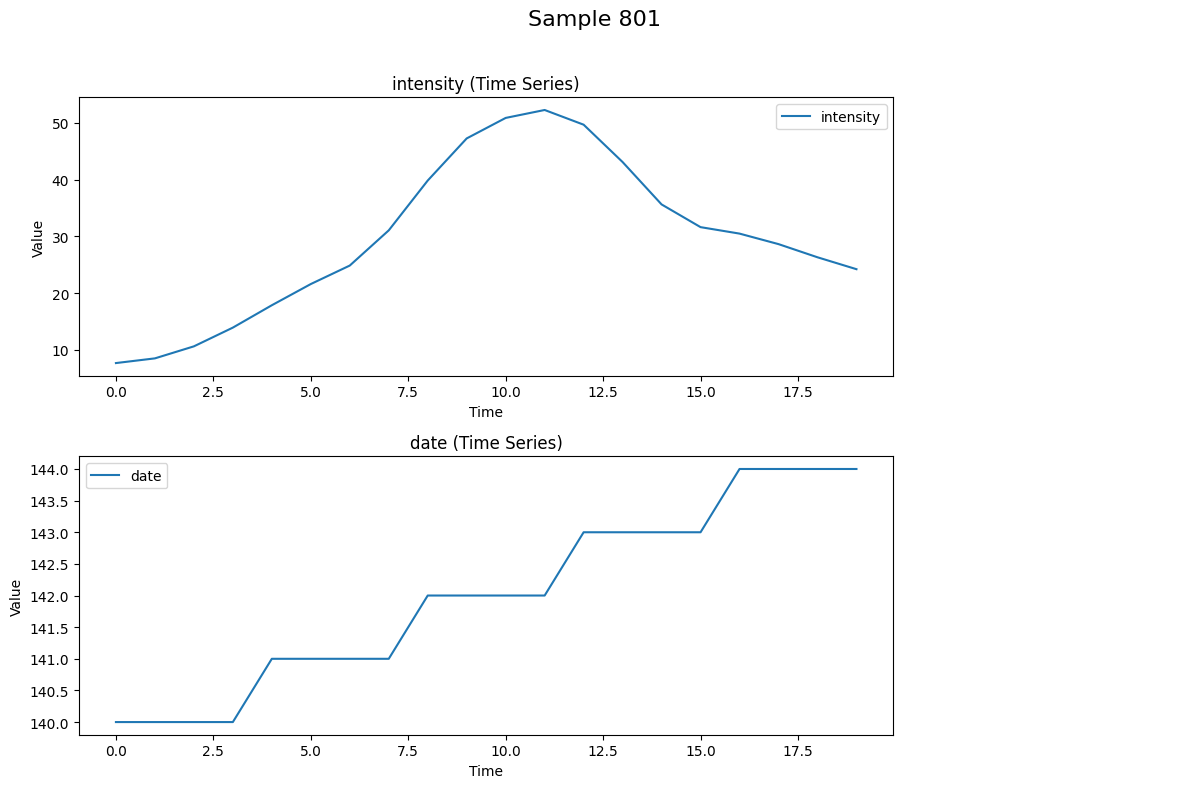


Dropped files statistics:
intensity: 0
date: 0
Year: 2021


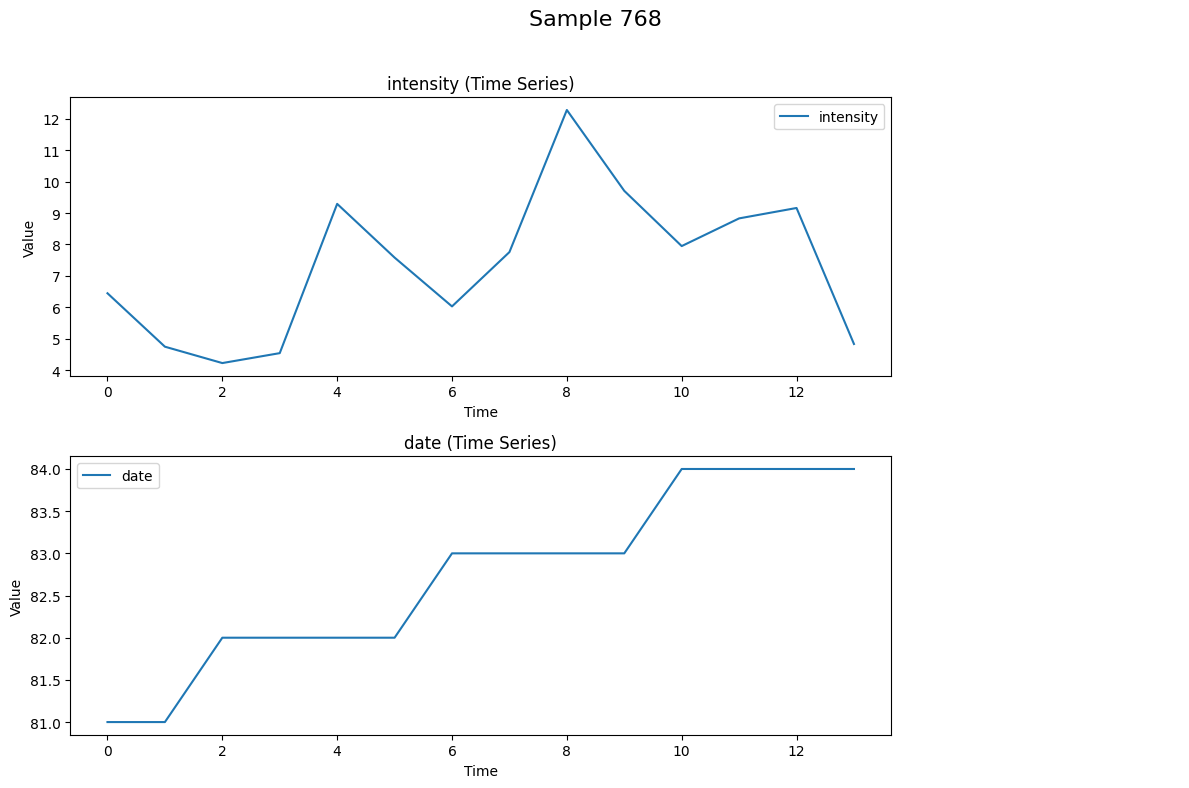


Dropped files statistics:
intensity: 0
date: 0
Year: 2022


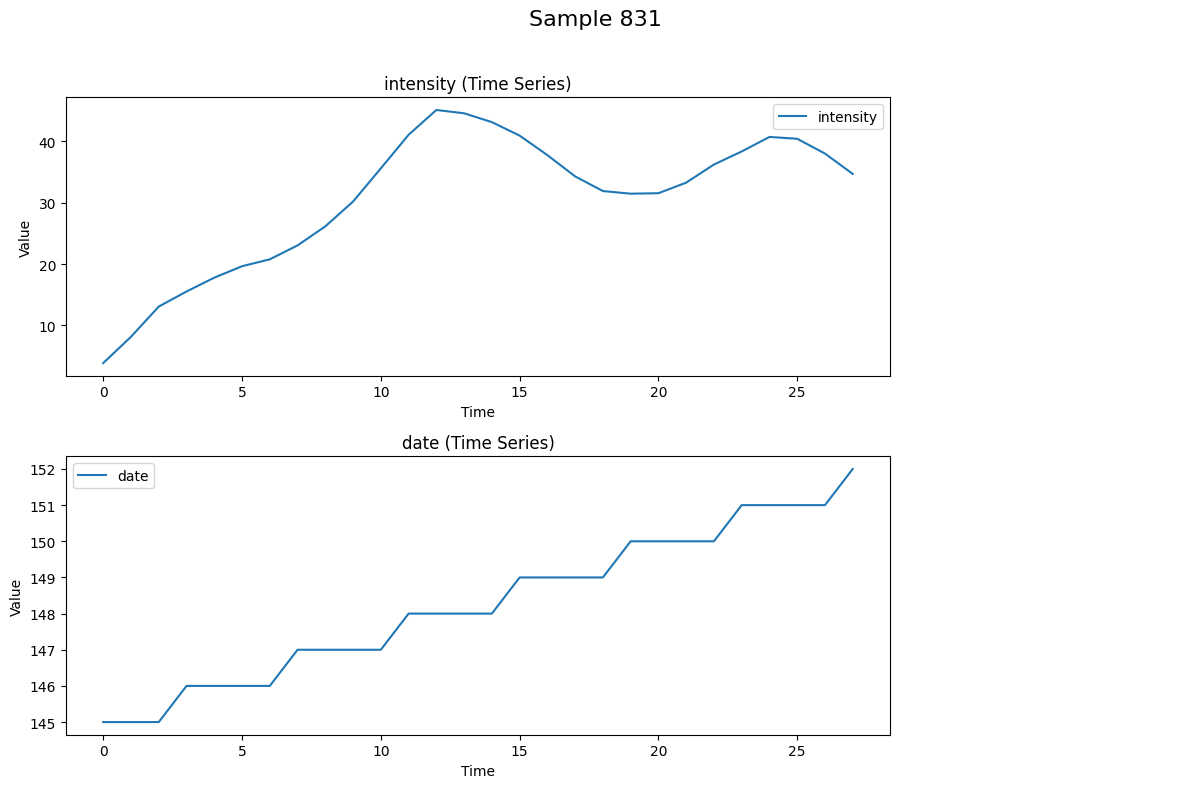


Dropped files statistics:
intensity: 0
date: 0
Year: 2023

Dropped files statistics:
intensity: 0
date: 0
Year: 2024



In [15]:
for year in years:
    config['DATA']['YEARS'] = f'{year},'
    service = ServiceDataAnalysis(config)
    data_dir = service.config['DATA']['PATH']
    cache_dir = service.config['DATA']['CACHE']
    dataset = NN_MeteorologicalCenterPointDataset(service, data_dir, [year], cache_dir, num_of_random_samples_repr=1)
    print(f"Year: {year}")
    dataset.__repr__()
    print()

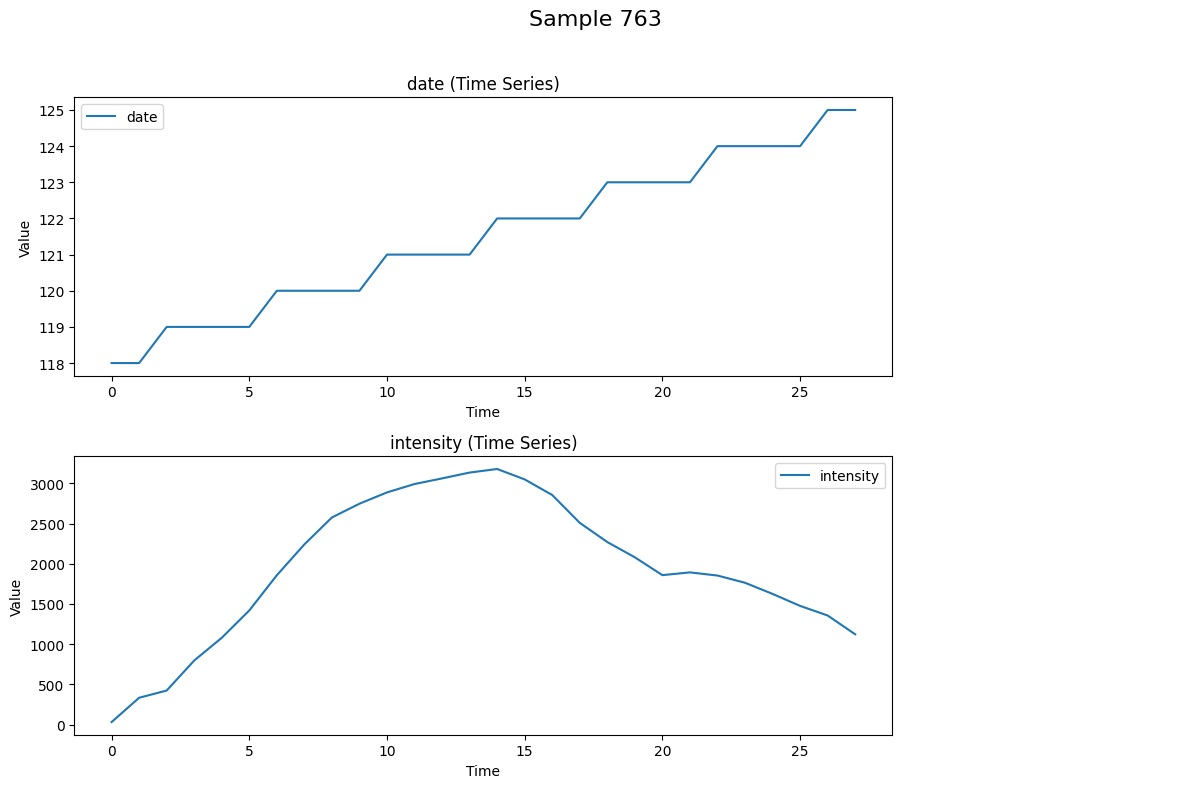

MeteorologicalDataset(data_dir=C:/projects/tensors2/OrTensors, parameters=['date', 'intensity'], years=['1949'], cache_dir=cache)
Number of samples: 1132

In [7]:
dataset